In [ ]:
##DTM단어별 빈도수 데이터프레임

In [1]:
import csv
import numpy as np
import pandas as pd
from konlpy.tag import Okt
data2018=pd.read_csv("DTM2018.csv")

In [2]:
df2018=pd.DataFrame(data2018)

In [3]:
df2018=df2018.drop([df2018.columns[0]],axis=1)

In [4]:
df2018.columns

Index(['가가', '가감', '가건물', '가게', '가격', '가격결정', '가격담합', '가격표', '가결', '가계',
       ...
       '힘안', '힘앞', '힘자랑', '힘줄', '힙내세', '힙니', '힙들어', '힙듭니', '힙병', '힙합'],
      dtype='object', length=39600)

In [5]:
##대한민국과 한국 하나의 단어로 합침

In [6]:
#2018
for i in range(0,1668):
    df2018['대한민국'][i]=df2018['대한민국'][i]+df2018['한국'][i]

In [7]:
#한국 제거
del df2018['한국']

In [8]:
df2018.columns

Index(['가가', '가감', '가건물', '가게', '가격', '가격결정', '가격담합', '가격표', '가결', '가계',
       ...
       '힘안', '힘앞', '힘자랑', '힘줄', '힙내세', '힙니', '힙들어', '힙듭니', '힙병', '힙합'],
      dtype='object', length=39599)

In [9]:
#불용어처리

In [10]:
##
stop="저는 대부분 때문 이후 최근 한번 정말 관련 다시 모두 우리 위해 보고 이번 하나 제대로 내용 당시 계속 해당 이제 현재 저희 지금 모든 문제 통해 이유 다른 대해 또한 정도 다음 그것 이제 누구 이상 부분 오히려 바로 이해 제발 누구 청원 개월 동안 자신 시기 기간 상태 본인 대한 직접 가지 사용 사실 사건 결과"
stop_list=stop.split(' ')
drop2018=df2018

def stopword(word_list):
    for w in word_list:
        if w in stop_list:
            del drop2018[w]
    return drop2018

In [11]:
new_df2018=stopword(df2018.columns)

In [12]:
new_df2018  #불용어 제거한 df

,가가,가감,가건물,가게,가격,가격결정,가격담합,가격표,가결,가계,...,힘안,힘앞,힘자랑,힘줄,힙내세,힙니,힙들어,힙듭니,힙병,힙합
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15719,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15720,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15721,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15722,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
#각 단어의 빈도수 합
sum_2018=new_df2018.sum()  

In [14]:
sum_2018

가가      119
가감       13
가건물       3
가게      403
가격     1020
       ... 
힙니        4
힙들어       1
힙듭니       3
힙병        1
힙합        2
Length: 39544, dtype: int64

In [15]:
df2018_sum=pd.DataFrame(sum_2018)

In [16]:
df2018_sum

,0
가가,119
가감,13
가건물,3
가게,403
가격,1020
...,...
힙니,4
힙들어,1
힙듭니,3
힙병,1


In [17]:
df2018_sum=df2018_sum.T
df2018_sum

,가가,가감,가건물,가게,가격,가격결정,가격담합,가격표,가결,가계,...,힘안,힘앞,힘자랑,힘줄,힙내세,힙니,힙들어,힙듭니,힙병,힙합
0,119,13,3,403,1020,5,7,4,29,72,...,1,3,2,6,1,4,1,3,1,2


In [18]:
col=df2018_sum.columns


In [19]:
col

Index(['가가', '가감', '가건물', '가게', '가격', '가격결정', '가격담합', '가격표', '가결', '가계',
       ...
       '힘안', '힘앞', '힘자랑', '힘줄', '힙내세', '힙니', '힙들어', '힙듭니', '힙병', '힙합'],
      dtype='object', length=39544)

In [20]:
df2018_sum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Columns: 39544 entries, 가가 to 힙합
dtypes: int64(39544)
memory usage: 309.1 KB


In [21]:
from math import log

In [23]:
#IDF구하기

In [22]:
from tqdm import tqdm

In [24]:
for doc_num in tqdm(range(15724), desc='문서 진행도'):
        print(doc_num)
        def idf(t):
            df=int(df2018_sum[t])
            return log(1668/(df+1))
       

문서 진행도:   8%|▊         | 1336/15724 [00:00<00:01, 7393.88it/s]

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

문서 진행도:  15%|█▍        | 2334/15724 [00:00<00:01, 6950.66it/s]

1834
1835
1836
1837
1838
1839
1840
1841
1842
1843
1844
1845
1846
1847
1848
1849
1850
1851
1852
1853
1854
1855
1856
1857
1858
1859
1860
1861
1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033


문서 진행도:  28%|██▊       | 4329/15724 [00:00<00:01, 7160.54it/s]


3332
3333
3334
3335
3336
3337
3338
3339
3340
3341
3342
3343
3344
3345
3346
3347
3348
3349
3350
3351
3352
3353
3354
3355
3356
3357
3358
3359
3360
3361
3362
3363
3364
3365
3366
3367
3368
3369
3370
3371
3372
3373
3374
3375
3376
3377
3378
3379
3380
3381
3382
3383
3384
3385
3386
3387
3388
3389
3390
3391
3392
3393
3394
3395
3396
3397
3398
3399
3400
3401
3402
3403
3404
3405
3406
3407
3408
3409
3410
3411
3412
3413
3414
3415
3416
3417
3418
3419
3420
3421
3422
3423
3424
3425
3426
3427
3428
3429
3430
3431
3432
3433
3434
3435
3436
3437
3438
3439
3440
3441
3442
3443
3444
3445
3446
3447
3448
3449
3450
3451
3452
3453
3454
3455
3456
3457
3458
3459
3460
3461
3462
3463
3464
3465
3466
3467
3468
3469
3470
3471
3472
3473
3474
3475
3476
3477
3478
3479
3480
3481
3482
3483
3484
3485
3486
3487
3488
3489
3490
3491
3492
3493
3494
3495
3496
3497
3498
3499
3500
3501
3502
3503
3504
3505
3506
3507
3508
3509
3510
3511
3512
3513
3514
3515
3516
3517
3518
3519
3520
3521
3522
3523
3524
3525
3526
3527
3528
3529
3530
3531

문서 진행도:  40%|████      | 6325/15724 [00:00<00:01, 7058.90it/s]

5327
5328
5329
5330
5331
5332
5333
5334
5335
5336
5337
5338
5339
5340
5341
5342
5343
5344
5345
5346
5347
5348
5349
5350
5351
5352
5353
5354
5355
5356
5357
5358
5359
5360
5361
5362
5363
5364
5365
5366
5367
5368
5369
5370
5371
5372
5373
5374
5375
5376
5377
5378
5379
5380
5381
5382
5383
5384
5385
5386
5387
5388
5389
5390
5391
5392
5393
5394
5395
5396
5397
5398
5399
5400
5401
5402
5403
5404
5405
5406
5407
5408
5409
5410
5411
5412
5413
5414
5415
5416
5417
5418
5419
5420
5421
5422
5423
5424
5425
5426
5427
5428
5429
5430
5431
5432
5433
5434
5435
5436
5437
5438
5439
5440
5441
5442
5443
5444
5445
5446
5447
5448
5449
5450
5451
5452
5453
5454
5455
5456
5457
5458
5459
5460
5461
5462
5463
5464
5465
5466
5467
5468
5469
5470
5471
5472
5473
5474
5475
5476
5477
5478
5479
5480
5481
5482
5483
5484
5485
5486
5487
5488
5489
5490
5491
5492
5493
5494
5495
5496
5497
5498
5499
5500
5501
5502
5503
5504
5505
5506
5507
5508
5509
5510
5511
5512
5513
5514
5515
5516
5517
5518
5519
5520
5521
5522
5523
5524
5525
5526


문서 진행도:  47%|████▋     | 7322/15724 [00:01<00:01, 6816.46it/s]


6823
6824
6825
6826
6827
6828
6829
6830
6831
6832
6833
6834
6835
6836
6837
6838
6839
6840
6841
6842
6843
6844
6845
6846
6847
6848
6849
6850
6851
6852
6853
6854
6855
6856
6857
6858
6859
6860
6861
6862
6863
6864
6865
6866
6867
6868
6869
6870
6871
6872
6873
6874
6875
6876
6877
6878
6879
6880
6881
6882
6883
6884
6885
6886
6887
6888
6889
6890
6891
6892
6893
6894
6895
6896
6897
6898
6899
6900
6901
6902
6903
6904
6905
6906
6907
6908
6909
6910
6911
6912
6913
6914
6915
6916
6917
6918
6919
6920
6921
6922
6923
6924
6925
6926
6927
6928
6929
6930
6931
6932
6933
6934
6935
6936
6937
6938
6939
6940
6941
6942
6943
6944
6945
6946
6947
6948
6949
6950
6951
6952
6953
6954
6955
6956
6957
6958
6959
6960
6961
6962
6963
6964
6965
6966
6967
6968
6969
6970
6971
6972
6973
6974
6975
6976
6977
6978
6979
6980
6981
6982
6983
6984
6985
6986
6987
6988
6989
6990
6991
6992
6993
6994
6995
6996
6997
6998
6999
7000
7001
7002
7003
7004
7005
7006
7007
7008
7009
7010
7011
7012
7013
7014
7015
7016
7017
7018
7019
7020
7021
7022

문서 진행도:  59%|█████▉    | 9318/15724 [00:01<00:00, 6553.91it/s]

8320
8321
8322
8323
8324
8325
8326
8327
8328
8329
8330
8331
8332
8333
8334
8335
8336
8337
8338
8339
8340
8341
8342
8343
8344
8345
8346
8347
8348
8349
8350
8351
8352
8353
8354
8355
8356
8357
8358
8359
8360
8361
8362
8363
8364
8365
8366
8367
8368
8369
8370
8371
8372
8373
8374
8375
8376
8377
8378
8379
8380
8381
8382
8383
8384
8385
8386
8387
8388
8389
8390
8391
8392
8393
8394
8395
8396
8397
8398
8399
8400
8401
8402
8403
8404
8405
8406
8407
8408
8409
8410
8411
8412
8413
8414
8415
8416
8417
8418
8419
8420
8421
8422
8423
8424
8425
8426
8427
8428
8429
8430
8431
8432
8433
8434
8435
8436
8437
8438
8439
8440
8441
8442
8443
8444
8445
8446
8447
8448
8449
8450
8451
8452
8453
8454
8455
8456
8457
8458
8459
8460
8461
8462
8463
8464
8465
8466
8467
8468
8469
8470
8471
8472
8473
8474
8475
8476
8477
8478
8479
8480
8481
8482
8483
8484
8485
8486
8487
8488
8489
8490
8491
8492
8493
8494
8495
8496
8497
8498
8499
8500
8501
8502
8503
8504
8505
8506
8507
8508
8509
8510
8511
8512
8513
8514
8515
8516
8517
8518
8519


문서 진행도:  66%|██████▌   | 10315/15724 [00:01<00:00, 6890.60it/s]


9816
9817
9818
9819
9820
9821
9822
9823
9824
9825
9826
9827
9828
9829
9830
9831
9832
9833
9834
9835
9836
9837
9838
9839
9840
9841
9842
9843
9844
9845
9846
9847
9848
9849
9850
9851
9852
9853
9854
9855
9856
9857
9858
9859
9860
9861
9862
9863
9864
9865
9866
9867
9868
9869
9870
9871
9872
9873
9874
9875
9876
9877
9878
9879
9880
9881
9882
9883
9884
9885
9886
9887
9888
9889
9890
9891
9892
9893
9894
9895
9896
9897
9898
9899
9900
9901
9902
9903
9904
9905
9906
9907
9908
9909
9910
9911
9912
9913
9914
9915
9916
9917
9918
9919
9920
9921
9922
9923
9924
9925
9926
9927
9928
9929
9930
9931
9932
9933
9934
9935
9936
9937
9938
9939
9940
9941
9942
9943
9944
9945
9946
9947
9948
9949
9950
9951
9952
9953
9954
9955
9956
9957
9958
9959
9960
9961
9962
9963
9964
9965
9966
9967
9968
9969
9970
9971
9972
9973
9974
9975
9976
9977
9978
9979
9980
9981
9982
9983
9984
9985
9986
9987
9988
9989
9990
9991
9992
9993
9994
9995
9996
9997
9998
9999
10000
10001
10002
10003
10004
10005
10006
10007
10008
10009
10010
10011
10012
1

문서 진행도:  78%|███████▊  | 12311/15724 [00:01<00:00, 7286.80it/s]

11313
11314
11315
11316
11317
11318
11319
11320
11321
11322
11323
11324
11325
11326
11327
11328
11329
11330
11331
11332
11333
11334
11335
11336
11337
11338
11339
11340
11341
11342
11343
11344
11345
11346
11347
11348
11349
11350
11351
11352
11353
11354
11355
11356
11357
11358
11359
11360
11361
11362
11363
11364
11365
11366
11367
11368
11369
11370
11371
11372
11373
11374
11375
11376
11377
11378
11379
11380
11381
11382
11383
11384
11385
11386
11387
11388
11389
11390
11391
11392
11393
11394
11395
11396
11397
11398
11399
11400
11401
11402
11403
11404
11405
11406
11407
11408
11409
11410
11411
11412
11413
11414
11415
11416
11417
11418
11419
11420
11421
11422
11423
11424
11425
11426
11427
11428
11429
11430
11431
11432
11433
11434
11435
11436
11437
11438
11439
11440
11441
11442
11443
11444
11445
11446
11447
11448
11449
11450
11451
11452
11453
11454
11455
11456
11457
11458
11459
11460
11461
11462
11463
11464
11465
11466
11467
11468
11469
11470
11471
11472
11473
11474
11475
11476
11477
11478
1147

문서 진행도:  91%|█████████ | 14306/15724 [00:02<00:00, 7369.10it/s]


13309
13310
13311
13312
13313
13314
13315
13316
13317
13318
13319
13320
13321
13322
13323
13324
13325
13326
13327
13328
13329
13330
13331
13332
13333
13334
13335
13336
13337
13338
13339
13340
13341
13342
13343
13344
13345
13346
13347
13348
13349
13350
13351
13352
13353
13354
13355
13356
13357
13358
13359
13360
13361
13362
13363
13364
13365
13366
13367
13368
13369
13370
13371
13372
13373
13374
13375
13376
13377
13378
13379
13380
13381
13382
13383
13384
13385
13386
13387
13388
13389
13390
13391
13392
13393
13394
13395
13396
13397
13398
13399
13400
13401
13402
13403
13404
13405
13406
13407
13408
13409
13410
13411
13412
13413
13414
13415
13416
13417
13418
13419
13420
13421
13422
13423
13424
13425
13426
13427
13428
13429
13430
13431
13432
13433
13434
13435
13436
13437
13438
13439
13440
13441
13442
13443
13444
13445
13446
13447
13448
13449
13450
13451
13452
13453
13454
13455
13456
13457
13458
13459
13460
13461
13462
13463
13464
13465
13466
13467
13468
13469
13470
13471
13472
13473
13474
134

문서 진행도: 100%|██████████| 15724/15724 [00:02<00:00, 7243.52it/s]


14805
14806
14807
14808
14809
14810
14811
14812
14813
14814
14815
14816
14817
14818
14819
14820
14821
14822
14823
14824
14825
14826
14827
14828
14829
14830
14831
14832
14833
14834
14835
14836
14837
14838
14839
14840
14841
14842
14843
14844
14845
14846
14847
14848
14849
14850
14851
14852
14853
14854
14855
14856
14857
14858
14859
14860
14861
14862
14863
14864
14865
14866
14867
14868
14869
14870
14871
14872
14873
14874
14875
14876
14877
14878
14879
14880
14881
14882
14883
14884
14885
14886
14887
14888
14889
14890
14891
14892
14893
14894
14895
14896
14897
14898
14899
14900
14901
14902
14903
14904
14905
14906
14907
14908
14909
14910
14911
14912
14913
14914
14915
14916
14917
14918
14919
14920
14921
14922
14923
14924
14925
14926
14927
14928
14929
14930
14931
14932
14933
14934
14935
14936
14937
14938
14939
14940
14941
14942
14943
14944
14945
14946
14947
14948
14949
14950
14951
14952
14953
14954
14955
14956
14957
14958
14959
14960
14961
14962
14963
14964
14965
14966
14967
14968
14969
14970
149

In [25]:
idf_list=[]

In [26]:
for t in col:
    idf_list.append(idf(t)) 

In [27]:
df_idf=pd.DataFrame()

In [28]:
df_idf['idf']=idf_list

In [29]:
df_idf.index=col

In [30]:
df_idf=df_idf.T
df_idf

,가가,가감,가건물,가게,가격,가격결정,가격담합,가격표,가결,가계,...,힘안,힘앞,힘자랑,힘줄,힙내세,힙니,힙들어,힙듭니,힙병,힙합
idf,2.631889,4.780323,6.033086,1.417966,0.490843,5.627621,5.339939,5.809943,4.018183,3.128921,...,6.726233,6.033086,6.320768,5.47347,6.726233,5.809943,6.726233,6.033086,6.726233,6.320768


In [32]:
#2018
def tfidf(t,d):
    return df2018.loc[d,t]*idf(t)

In [33]:
df_tfidf=pd.DataFrame()

In [35]:
for t in tqdm(range(1668), desc='문서 진행도'):
        print(t)
        for d in col:
            df_tfidf.loc[d,t]=tfidf(d,t)

문서 진행도:   0%|          | 0/1668 [00:00<?, ?it/s]

0


문서 진행도:   0%|          | 1/1668 [02:07<58:55:04, 127.24s/it]

1


문서 진행도:   0%|          | 2/1668 [02:10<41:44:13, 90.19s/it] 

2


문서 진행도:   0%|          | 3/1668 [02:14<29:43:02, 64.25s/it]

3


문서 진행도:   0%|          | 4/1668 [02:18<21:18:27, 46.10s/it]

4


문서 진행도:   0%|          | 5/1668 [02:22<15:25:22, 33.39s/it]

5


문서 진행도:   0%|          | 6/1668 [02:25<11:18:17, 24.49s/it]

6


문서 진행도:   0%|          | 7/1668 [02:29<8:25:21, 18.25s/it] 

7


문서 진행도:   0%|          | 8/1668 [02:33<6:24:28, 13.90s/it]

8


문서 진행도:   1%|          | 9/1668 [02:37<4:59:41, 10.84s/it]

9


문서 진행도:   1%|          | 10/1668 [02:40<4:02:16,  8.77s/it]

10


문서 진행도:   1%|          | 11/1668 [02:44<3:20:32,  7.26s/it]

11


문서 진행도:   1%|          | 12/1668 [02:48<2:51:24,  6.21s/it]

12


문서 진행도:   1%|          | 13/1668 [02:52<2:30:54,  5.47s/it]

13


문서 진행도:   1%|          | 14/1668 [02:55<2:16:20,  4.95s/it]

14


문서 진행도:   1%|          | 15/1668 [02:59<2:06:08,  4.58s/it]

15


문서 진행도:   1%|          | 16/1668 [03:03<1:59:01,  4.32s/it]

16


문서 진행도:   1%|          | 17/1668 [03:07<1:53:52,  4.14s/it]

17


문서 진행도:   1%|          | 18/1668 [03:10<1:50:25,  4.02s/it]

18


문서 진행도:   1%|          | 19/1668 [03:14<1:48:03,  3.93s/it]

19


문서 진행도:   1%|          | 20/1668 [03:18<1:46:05,  3.86s/it]

20


문서 진행도:   1%|▏         | 21/1668 [03:21<1:44:52,  3.82s/it]

21


문서 진행도:   1%|▏         | 22/1668 [03:25<1:43:53,  3.79s/it]

22


문서 진행도:   1%|▏         | 23/1668 [03:29<1:43:05,  3.76s/it]

23


문서 진행도:   1%|▏         | 24/1668 [03:33<1:42:57,  3.76s/it]

24


문서 진행도:   1%|▏         | 25/1668 [03:36<1:42:34,  3.75s/it]

25


문서 진행도:   2%|▏         | 26/1668 [03:40<1:42:09,  3.73s/it]

26


문서 진행도:   2%|▏         | 27/1668 [03:44<1:42:18,  3.74s/it]

27


문서 진행도:   2%|▏         | 28/1668 [03:48<1:41:54,  3.73s/it]

28


문서 진행도:   2%|▏         | 29/1668 [03:51<1:42:18,  3.75s/it]

29


문서 진행도:   2%|▏         | 30/1668 [03:55<1:45:24,  3.86s/it]

30


문서 진행도:   2%|▏         | 31/1668 [03:59<1:46:49,  3.92s/it]

31


문서 진행도:   2%|▏         | 32/1668 [04:03<1:45:38,  3.87s/it]

32


문서 진행도:   2%|▏         | 33/1668 [04:07<1:44:16,  3.83s/it]

33


문서 진행도:   2%|▏         | 34/1668 [04:11<1:43:18,  3.79s/it]

34


문서 진행도:   2%|▏         | 35/1668 [04:14<1:43:06,  3.79s/it]

35


문서 진행도:   2%|▏         | 36/1668 [04:18<1:42:27,  3.77s/it]

36


문서 진행도:   2%|▏         | 37/1668 [04:22<1:42:10,  3.76s/it]

37


문서 진행도:   2%|▏         | 38/1668 [04:26<1:41:49,  3.75s/it]

38


문서 진행도:   2%|▏         | 39/1668 [04:29<1:41:46,  3.75s/it]

39


문서 진행도:   2%|▏         | 40/1668 [04:33<1:42:23,  3.77s/it]

40


문서 진행도:   2%|▏         | 41/1668 [04:37<1:41:49,  3.76s/it]

41


문서 진행도:   3%|▎         | 42/1668 [04:41<1:42:40,  3.79s/it]

42


문서 진행도:   3%|▎         | 43/1668 [04:45<1:44:00,  3.84s/it]

43


문서 진행도:   3%|▎         | 44/1668 [04:49<1:45:04,  3.88s/it]

44


문서 진행도:   3%|▎         | 45/1668 [04:53<1:45:52,  3.91s/it]

45


문서 진행도:   3%|▎         | 46/1668 [04:57<1:44:34,  3.87s/it]

46


문서 진행도:   3%|▎         | 47/1668 [05:00<1:43:45,  3.84s/it]

47


문서 진행도:   3%|▎         | 48/1668 [05:05<1:48:18,  4.01s/it]

48


문서 진행도:   3%|▎         | 49/1668 [05:09<1:49:30,  4.06s/it]

49


문서 진행도:   3%|▎         | 50/1668 [05:13<1:51:38,  4.14s/it]

50


문서 진행도:   3%|▎         | 51/1668 [05:17<1:52:42,  4.18s/it]

51


문서 진행도:   3%|▎         | 52/1668 [05:21<1:49:26,  4.06s/it]

52


문서 진행도:   3%|▎         | 53/1668 [05:25<1:47:48,  4.01s/it]

53


문서 진행도:   3%|▎         | 54/1668 [05:29<1:45:47,  3.93s/it]

54


문서 진행도:   3%|▎         | 55/1668 [05:33<1:44:13,  3.88s/it]

55


문서 진행도:   3%|▎         | 56/1668 [05:36<1:43:05,  3.84s/it]

56


문서 진행도:   3%|▎         | 57/1668 [05:40<1:42:12,  3.81s/it]

57


문서 진행도:   3%|▎         | 58/1668 [05:44<1:41:41,  3.79s/it]

58


문서 진행도:   4%|▎         | 59/1668 [05:48<1:41:11,  3.77s/it]

59


문서 진행도:   4%|▎         | 60/1668 [05:51<1:40:47,  3.76s/it]

60


문서 진행도:   4%|▎         | 61/1668 [05:55<1:41:43,  3.80s/it]

61


문서 진행도:   4%|▎         | 62/1668 [05:59<1:44:19,  3.90s/it]

62


문서 진행도:   4%|▍         | 63/1668 [06:03<1:43:36,  3.87s/it]

63


문서 진행도:   4%|▍         | 64/1668 [06:07<1:42:22,  3.83s/it]

64


문서 진행도:   4%|▍         | 65/1668 [06:11<1:41:47,  3.81s/it]

65


문서 진행도:   4%|▍         | 66/1668 [06:14<1:41:19,  3.79s/it]

66


문서 진행도:   4%|▍         | 67/1668 [06:18<1:40:41,  3.77s/it]

67


문서 진행도:   4%|▍         | 68/1668 [06:22<1:40:29,  3.77s/it]

68


문서 진행도:   4%|▍         | 69/1668 [06:26<1:40:17,  3.76s/it]

69


문서 진행도:   4%|▍         | 70/1668 [06:29<1:39:57,  3.75s/it]

70


문서 진행도:   4%|▍         | 71/1668 [06:33<1:39:47,  3.75s/it]

71


문서 진행도:   4%|▍         | 72/1668 [06:37<1:39:32,  3.74s/it]

72


문서 진행도:   4%|▍         | 73/1668 [06:41<1:42:11,  3.84s/it]

73


문서 진행도:   4%|▍         | 74/1668 [06:45<1:42:20,  3.85s/it]

74


문서 진행도:   4%|▍         | 75/1668 [06:49<1:41:22,  3.82s/it]

75


문서 진행도:   5%|▍         | 76/1668 [06:52<1:40:39,  3.79s/it]

76


문서 진행도:   5%|▍         | 77/1668 [06:56<1:40:17,  3.78s/it]

77


문서 진행도:   5%|▍         | 78/1668 [07:00<1:39:48,  3.77s/it]

78


문서 진행도:   5%|▍         | 79/1668 [07:04<1:39:37,  3.76s/it]

79


문서 진행도:   5%|▍         | 80/1668 [07:07<1:39:17,  3.75s/it]

80


문서 진행도:   5%|▍         | 81/1668 [07:11<1:39:24,  3.76s/it]

81


문서 진행도:   5%|▍         | 82/1668 [07:15<1:39:18,  3.76s/it]

82


문서 진행도:   5%|▍         | 83/1668 [07:18<1:39:02,  3.75s/it]

83


문서 진행도:   5%|▌         | 84/1668 [07:22<1:38:55,  3.75s/it]

84


문서 진행도:   5%|▌         | 85/1668 [07:26<1:39:50,  3.78s/it]

85


문서 진행도:   5%|▌         | 86/1668 [07:30<1:39:28,  3.77s/it]

86


문서 진행도:   5%|▌         | 87/1668 [07:34<1:39:13,  3.77s/it]

87


문서 진행도:   5%|▌         | 88/1668 [07:37<1:38:58,  3.76s/it]

88


문서 진행도:   5%|▌         | 89/1668 [07:41<1:38:49,  3.76s/it]

89


문서 진행도:   5%|▌         | 90/1668 [07:45<1:38:41,  3.75s/it]

90


문서 진행도:   5%|▌         | 91/1668 [07:49<1:38:25,  3.74s/it]

91


문서 진행도:   6%|▌         | 92/1668 [07:52<1:38:20,  3.74s/it]

92


문서 진행도:   6%|▌         | 93/1668 [07:56<1:38:14,  3.74s/it]

93


문서 진행도:   6%|▌         | 94/1668 [08:00<1:38:06,  3.74s/it]

94


문서 진행도:   6%|▌         | 95/1668 [08:04<1:38:18,  3.75s/it]

95


문서 진행도:   6%|▌         | 96/1668 [08:07<1:38:03,  3.74s/it]

96


문서 진행도:   6%|▌         | 97/1668 [08:11<1:37:54,  3.74s/it]

97


문서 진행도:   6%|▌         | 98/1668 [08:15<1:38:00,  3.75s/it]

98


문서 진행도:   6%|▌         | 99/1668 [08:18<1:37:45,  3.74s/it]

99


문서 진행도:   6%|▌         | 100/1668 [08:22<1:37:56,  3.75s/it]

100


문서 진행도:   6%|▌         | 101/1668 [08:26<1:37:56,  3.75s/it]

101


문서 진행도:   6%|▌         | 102/1668 [08:30<1:38:53,  3.79s/it]

102


문서 진행도:   6%|▌         | 103/1668 [08:34<1:41:41,  3.90s/it]

103


문서 진행도:   6%|▌         | 104/1668 [08:38<1:42:48,  3.94s/it]

104


문서 진행도:   6%|▋         | 105/1668 [08:42<1:41:22,  3.89s/it]

105


문서 진행도:   6%|▋         | 106/1668 [08:46<1:40:35,  3.86s/it]

106


문서 진행도:   6%|▋         | 107/1668 [08:49<1:39:45,  3.83s/it]

107


문서 진행도:   6%|▋         | 108/1668 [08:53<1:39:21,  3.82s/it]

108


문서 진행도:   7%|▋         | 109/1668 [08:57<1:38:44,  3.80s/it]

109


문서 진행도:   7%|▋         | 110/1668 [09:01<1:38:17,  3.79s/it]

110


문서 진행도:   7%|▋         | 111/1668 [09:04<1:38:02,  3.78s/it]

111


문서 진행도:   7%|▋         | 112/1668 [09:08<1:37:55,  3.78s/it]

112


문서 진행도:   7%|▋         | 113/1668 [09:12<1:37:58,  3.78s/it]

113


문서 진행도:   7%|▋         | 114/1668 [09:16<1:37:42,  3.77s/it]

114


문서 진행도:   7%|▋         | 115/1668 [09:20<1:37:21,  3.76s/it]

115


문서 진행도:   7%|▋         | 116/1668 [09:23<1:37:20,  3.76s/it]

116


문서 진행도:   7%|▋         | 117/1668 [09:27<1:37:13,  3.76s/it]

117


문서 진행도:   7%|▋         | 118/1668 [09:31<1:37:18,  3.77s/it]

118


문서 진행도:   7%|▋         | 119/1668 [09:35<1:37:16,  3.77s/it]

119


문서 진행도:   7%|▋         | 120/1668 [09:38<1:37:01,  3.76s/it]

120


문서 진행도:   7%|▋         | 121/1668 [09:42<1:37:06,  3.77s/it]

121


문서 진행도:   7%|▋         | 122/1668 [09:46<1:36:58,  3.76s/it]

122


문서 진행도:   7%|▋         | 123/1668 [09:50<1:36:51,  3.76s/it]

123


문서 진행도:   7%|▋         | 124/1668 [09:53<1:37:05,  3.77s/it]

124


문서 진행도:   7%|▋         | 125/1668 [09:57<1:36:58,  3.77s/it]

125


문서 진행도:   8%|▊         | 126/1668 [10:01<1:36:46,  3.77s/it]

126


문서 진행도:   8%|▊         | 127/1668 [10:05<1:36:47,  3.77s/it]

127


문서 진행도:   8%|▊         | 128/1668 [10:09<1:36:52,  3.77s/it]

128


문서 진행도:   8%|▊         | 129/1668 [10:12<1:36:42,  3.77s/it]

129


문서 진행도:   8%|▊         | 130/1668 [10:16<1:36:33,  3.77s/it]

130


문서 진행도:   8%|▊         | 131/1668 [10:20<1:36:24,  3.76s/it]

131


문서 진행도:   8%|▊         | 132/1668 [10:24<1:36:20,  3.76s/it]

132


문서 진행도:   8%|▊         | 133/1668 [10:27<1:36:25,  3.77s/it]

133


문서 진행도:   8%|▊         | 134/1668 [10:31<1:36:08,  3.76s/it]

134


문서 진행도:   8%|▊         | 135/1668 [10:35<1:36:07,  3.76s/it]

135


문서 진행도:   8%|▊         | 136/1668 [10:39<1:36:06,  3.76s/it]

136


문서 진행도:   8%|▊         | 137/1668 [10:42<1:36:15,  3.77s/it]

137


문서 진행도:   8%|▊         | 138/1668 [10:46<1:36:20,  3.78s/it]

138


문서 진행도:   8%|▊         | 139/1668 [10:50<1:36:05,  3.77s/it]

139


문서 진행도:   8%|▊         | 140/1668 [10:54<1:36:13,  3.78s/it]

140


문서 진행도:   8%|▊         | 141/1668 [10:58<1:36:00,  3.77s/it]

141


문서 진행도:   9%|▊         | 142/1668 [11:01<1:35:46,  3.77s/it]

142


문서 진행도:   9%|▊         | 143/1668 [11:05<1:35:48,  3.77s/it]

143


문서 진행도:   9%|▊         | 144/1668 [11:09<1:35:35,  3.76s/it]

144


문서 진행도:   9%|▊         | 145/1668 [11:13<1:35:43,  3.77s/it]

145


문서 진행도:   9%|▉         | 146/1668 [11:16<1:35:36,  3.77s/it]

146


문서 진행도:   9%|▉         | 147/1668 [11:20<1:35:23,  3.76s/it]

147


문서 진행도:   9%|▉         | 148/1668 [11:24<1:36:48,  3.82s/it]

148


문서 진행도:   9%|▉         | 149/1668 [11:28<1:39:17,  3.92s/it]

149


문서 진행도:   9%|▉         | 150/1668 [11:32<1:38:10,  3.88s/it]

150


문서 진행도:   9%|▉         | 151/1668 [11:36<1:37:13,  3.85s/it]

151


문서 진행도:   9%|▉         | 152/1668 [11:40<1:36:28,  3.82s/it]

152


문서 진행도:   9%|▉         | 153/1668 [11:43<1:36:09,  3.81s/it]

153


문서 진행도:   9%|▉         | 154/1668 [11:47<1:35:37,  3.79s/it]

154


문서 진행도:   9%|▉         | 155/1668 [11:51<1:35:21,  3.78s/it]

155


문서 진행도:   9%|▉         | 156/1668 [11:55<1:35:17,  3.78s/it]

156


문서 진행도:   9%|▉         | 157/1668 [11:58<1:35:09,  3.78s/it]

157


문서 진행도:   9%|▉         | 158/1668 [12:02<1:35:10,  3.78s/it]

158


문서 진행도:  10%|▉         | 159/1668 [12:06<1:34:57,  3.78s/it]

159


문서 진행도:  10%|▉         | 160/1668 [12:10<1:34:48,  3.77s/it]

160


문서 진행도:  10%|▉         | 161/1668 [12:13<1:34:58,  3.78s/it]

161


문서 진행도:  10%|▉         | 162/1668 [12:17<1:34:44,  3.77s/it]

162


문서 진행도:  10%|▉         | 163/1668 [12:21<1:34:39,  3.77s/it]

163


문서 진행도:  10%|▉         | 164/1668 [12:25<1:34:41,  3.78s/it]

164


문서 진행도:  10%|▉         | 165/1668 [12:29<1:34:32,  3.77s/it]

165


문서 진행도:  10%|▉         | 166/1668 [12:32<1:34:33,  3.78s/it]

166


문서 진행도:  10%|█         | 167/1668 [12:36<1:34:54,  3.79s/it]

167


문서 진행도:  10%|█         | 168/1668 [12:40<1:35:02,  3.80s/it]

168


문서 진행도:  10%|█         | 169/1668 [12:44<1:35:06,  3.81s/it]

169


문서 진행도:  10%|█         | 170/1668 [12:48<1:35:11,  3.81s/it]

170


문서 진행도:  10%|█         | 171/1668 [12:51<1:34:49,  3.80s/it]

171


문서 진행도:  10%|█         | 172/1668 [12:55<1:34:38,  3.80s/it]

172


문서 진행도:  10%|█         | 173/1668 [12:59<1:34:21,  3.79s/it]

173


문서 진행도:  10%|█         | 174/1668 [13:03<1:34:11,  3.78s/it]

174


문서 진행도:  10%|█         | 175/1668 [13:07<1:34:28,  3.80s/it]

175


문서 진행도:  11%|█         | 176/1668 [13:10<1:34:13,  3.79s/it]

176


문서 진행도:  11%|█         | 177/1668 [13:14<1:34:14,  3.79s/it]

177


문서 진행도:  11%|█         | 178/1668 [13:18<1:34:01,  3.79s/it]

178


문서 진행도:  11%|█         | 179/1668 [13:22<1:33:57,  3.79s/it]

179


문서 진행도:  11%|█         | 180/1668 [13:25<1:33:55,  3.79s/it]

180


문서 진행도:  11%|█         | 181/1668 [13:29<1:33:45,  3.78s/it]

181


문서 진행도:  11%|█         | 182/1668 [13:33<1:33:46,  3.79s/it]

182


문서 진행도:  11%|█         | 183/1668 [13:37<1:33:45,  3.79s/it]

183


문서 진행도:  11%|█         | 184/1668 [13:41<1:33:37,  3.79s/it]

184


문서 진행도:  11%|█         | 185/1668 [13:45<1:34:13,  3.81s/it]

185


문서 진행도:  11%|█         | 186/1668 [13:48<1:34:24,  3.82s/it]

186


문서 진행도:  11%|█         | 187/1668 [13:52<1:34:31,  3.83s/it]

187


문서 진행도:  11%|█▏        | 188/1668 [13:56<1:37:43,  3.96s/it]

188


문서 진행도:  11%|█▏        | 189/1668 [14:00<1:36:03,  3.90s/it]

189


문서 진행도:  11%|█▏        | 190/1668 [14:04<1:35:00,  3.86s/it]

190


문서 진행도:  11%|█▏        | 191/1668 [14:08<1:34:05,  3.82s/it]

191


문서 진행도:  12%|█▏        | 192/1668 [14:11<1:33:35,  3.80s/it]

192


문서 진행도:  12%|█▏        | 193/1668 [14:15<1:32:50,  3.78s/it]

193


문서 진행도:  12%|█▏        | 194/1668 [14:19<1:32:28,  3.76s/it]

194


문서 진행도:  12%|█▏        | 195/1668 [14:23<1:32:25,  3.77s/it]

195


문서 진행도:  12%|█▏        | 196/1668 [14:26<1:32:08,  3.76s/it]

196


문서 진행도:  12%|█▏        | 197/1668 [14:30<1:32:20,  3.77s/it]

197


문서 진행도:  12%|█▏        | 198/1668 [14:34<1:32:23,  3.77s/it]

198


문서 진행도:  12%|█▏        | 199/1668 [14:38<1:32:06,  3.76s/it]

199


문서 진행도:  12%|█▏        | 200/1668 [14:42<1:32:10,  3.77s/it]

200


문서 진행도:  12%|█▏        | 201/1668 [14:45<1:32:08,  3.77s/it]

201


문서 진행도:  12%|█▏        | 202/1668 [14:49<1:32:01,  3.77s/it]

202


문서 진행도:  12%|█▏        | 203/1668 [14:53<1:31:55,  3.76s/it]

203


문서 진행도:  12%|█▏        | 204/1668 [14:57<1:31:44,  3.76s/it]

204


문서 진행도:  12%|█▏        | 205/1668 [15:00<1:31:40,  3.76s/it]

205


문서 진행도:  12%|█▏        | 206/1668 [15:04<1:31:35,  3.76s/it]

206


문서 진행도:  12%|█▏        | 207/1668 [15:08<1:31:19,  3.75s/it]

207


문서 진행도:  12%|█▏        | 208/1668 [15:12<1:31:41,  3.77s/it]

208


문서 진행도:  13%|█▎        | 209/1668 [15:15<1:31:29,  3.76s/it]

209


문서 진행도:  13%|█▎        | 210/1668 [15:19<1:31:25,  3.76s/it]

210


문서 진행도:  13%|█▎        | 211/1668 [15:23<1:31:19,  3.76s/it]

211


문서 진행도:  13%|█▎        | 212/1668 [15:27<1:31:18,  3.76s/it]

212


문서 진행도:  13%|█▎        | 213/1668 [15:30<1:31:13,  3.76s/it]

213


문서 진행도:  13%|█▎        | 214/1668 [15:34<1:31:12,  3.76s/it]

214


문서 진행도:  13%|█▎        | 215/1668 [15:38<1:30:56,  3.76s/it]

215


문서 진행도:  13%|█▎        | 216/1668 [15:42<1:30:51,  3.75s/it]

216


문서 진행도:  13%|█▎        | 217/1668 [15:45<1:30:42,  3.75s/it]

217


문서 진행도:  13%|█▎        | 218/1668 [15:49<1:30:30,  3.75s/it]

218


문서 진행도:  13%|█▎        | 219/1668 [15:53<1:30:37,  3.75s/it]

219


문서 진행도:  13%|█▎        | 220/1668 [15:57<1:30:23,  3.75s/it]

220


문서 진행도:  13%|█▎        | 221/1668 [16:00<1:30:23,  3.75s/it]

221


문서 진행도:  13%|█▎        | 222/1668 [16:04<1:30:29,  3.76s/it]

222


문서 진행도:  13%|█▎        | 223/1668 [16:08<1:30:18,  3.75s/it]

223


문서 진행도:  13%|█▎        | 224/1668 [16:12<1:30:30,  3.76s/it]

224


문서 진행도:  13%|█▎        | 225/1668 [16:15<1:30:26,  3.76s/it]

225


문서 진행도:  14%|█▎        | 226/1668 [16:19<1:30:06,  3.75s/it]

226


문서 진행도:  14%|█▎        | 227/1668 [16:23<1:32:02,  3.83s/it]

227


문서 진행도:  14%|█▎        | 228/1668 [16:27<1:31:21,  3.81s/it]

228


문서 진행도:  14%|█▎        | 229/1668 [16:31<1:33:10,  3.88s/it]

229


문서 진행도:  14%|█▍        | 230/1668 [16:35<1:34:37,  3.95s/it]

230


문서 진행도:  14%|█▍        | 231/1668 [16:39<1:36:01,  4.01s/it]

231


문서 진행도:  14%|█▍        | 232/1668 [16:43<1:34:43,  3.96s/it]

232


문서 진행도:  14%|█▍        | 233/1668 [16:47<1:36:03,  4.02s/it]

233


문서 진행도:  14%|█▍        | 234/1668 [16:51<1:33:57,  3.93s/it]

234


문서 진행도:  14%|█▍        | 235/1668 [16:55<1:32:59,  3.89s/it]

235


문서 진행도:  14%|█▍        | 236/1668 [16:59<1:32:03,  3.86s/it]

236


문서 진행도:  14%|█▍        | 237/1668 [17:02<1:31:21,  3.83s/it]

237


문서 진행도:  14%|█▍        | 238/1668 [17:06<1:30:51,  3.81s/it]

238


문서 진행도:  14%|█▍        | 239/1668 [17:10<1:30:21,  3.79s/it]

239


문서 진행도:  14%|█▍        | 240/1668 [17:14<1:30:11,  3.79s/it]

240


문서 진행도:  14%|█▍        | 241/1668 [17:17<1:29:55,  3.78s/it]

241


문서 진행도:  15%|█▍        | 242/1668 [17:21<1:29:34,  3.77s/it]

242


문서 진행도:  15%|█▍        | 243/1668 [17:25<1:30:25,  3.81s/it]

243


문서 진행도:  15%|█▍        | 244/1668 [17:29<1:31:15,  3.85s/it]

244


문서 진행도:  15%|█▍        | 245/1668 [17:33<1:32:30,  3.90s/it]

245


문서 진행도:  15%|█▍        | 246/1668 [17:37<1:34:22,  3.98s/it]

246


문서 진행도:  15%|█▍        | 247/1668 [17:41<1:32:59,  3.93s/it]

247


문서 진행도:  15%|█▍        | 248/1668 [17:45<1:31:53,  3.88s/it]

248


문서 진행도:  15%|█▍        | 249/1668 [17:49<1:30:57,  3.85s/it]

249


문서 진행도:  15%|█▍        | 250/1668 [17:52<1:30:34,  3.83s/it]

250


문서 진행도:  15%|█▌        | 251/1668 [17:56<1:29:54,  3.81s/it]

251


문서 진행도:  15%|█▌        | 252/1668 [18:00<1:29:24,  3.79s/it]

252


문서 진행도:  15%|█▌        | 253/1668 [18:04<1:29:16,  3.79s/it]

253


문서 진행도:  15%|█▌        | 254/1668 [18:07<1:29:05,  3.78s/it]

254


문서 진행도:  15%|█▌        | 255/1668 [18:11<1:28:57,  3.78s/it]

255


문서 진행도:  15%|█▌        | 256/1668 [18:15<1:28:55,  3.78s/it]

256


문서 진행도:  15%|█▌        | 257/1668 [18:19<1:28:44,  3.77s/it]

257


문서 진행도:  15%|█▌        | 258/1668 [18:22<1:28:39,  3.77s/it]

258


문서 진행도:  16%|█▌        | 259/1668 [18:26<1:28:30,  3.77s/it]

259


문서 진행도:  16%|█▌        | 260/1668 [18:30<1:28:22,  3.77s/it]

260


문서 진행도:  16%|█▌        | 261/1668 [18:34<1:28:35,  3.78s/it]

261


문서 진행도:  16%|█▌        | 262/1668 [18:38<1:28:15,  3.77s/it]

262


문서 진행도:  16%|█▌        | 263/1668 [18:41<1:28:19,  3.77s/it]

263


문서 진행도:  16%|█▌        | 264/1668 [18:45<1:28:29,  3.78s/it]

264


문서 진행도:  16%|█▌        | 265/1668 [18:49<1:28:29,  3.78s/it]

265


문서 진행도:  16%|█▌        | 266/1668 [18:53<1:28:25,  3.78s/it]

266


문서 진행도:  16%|█▌        | 267/1668 [18:56<1:28:22,  3.78s/it]

267


문서 진행도:  16%|█▌        | 268/1668 [19:00<1:28:17,  3.78s/it]

268


문서 진행도:  16%|█▌        | 269/1668 [19:04<1:28:28,  3.79s/it]

269


문서 진행도:  16%|█▌        | 270/1668 [19:08<1:28:15,  3.79s/it]

270


문서 진행도:  16%|█▌        | 271/1668 [19:12<1:28:15,  3.79s/it]

271


문서 진행도:  16%|█▋        | 272/1668 [19:15<1:28:17,  3.79s/it]

272


문서 진행도:  16%|█▋        | 273/1668 [19:20<1:30:50,  3.91s/it]

273


문서 진행도:  16%|█▋        | 274/1668 [19:24<1:30:47,  3.91s/it]

274


문서 진행도:  16%|█▋        | 275/1668 [19:27<1:29:39,  3.86s/it]

275


문서 진행도:  17%|█▋        | 276/1668 [19:31<1:29:24,  3.85s/it]

276


문서 진행도:  17%|█▋        | 277/1668 [19:35<1:29:04,  3.84s/it]

277


문서 진행도:  17%|█▋        | 278/1668 [19:39<1:28:23,  3.82s/it]

278


문서 진행도:  17%|█▋        | 279/1668 [19:42<1:28:14,  3.81s/it]

279


문서 진행도:  17%|█▋        | 280/1668 [19:46<1:27:44,  3.79s/it]

280


문서 진행도:  17%|█▋        | 281/1668 [19:50<1:27:26,  3.78s/it]

281


문서 진행도:  17%|█▋        | 282/1668 [19:54<1:27:26,  3.79s/it]

282


문서 진행도:  17%|█▋        | 283/1668 [19:58<1:27:09,  3.78s/it]

283


문서 진행도:  17%|█▋        | 284/1668 [20:01<1:26:58,  3.77s/it]

284


문서 진행도:  17%|█▋        | 285/1668 [20:05<1:27:00,  3.77s/it]

285


문서 진행도:  17%|█▋        | 286/1668 [20:09<1:26:54,  3.77s/it]

286


문서 진행도:  17%|█▋        | 287/1668 [20:13<1:26:51,  3.77s/it]

287


문서 진행도:  17%|█▋        | 288/1668 [20:16<1:26:41,  3.77s/it]

288


문서 진행도:  17%|█▋        | 289/1668 [20:20<1:26:39,  3.77s/it]

289


문서 진행도:  17%|█▋        | 290/1668 [20:24<1:26:44,  3.78s/it]

290


문서 진행도:  17%|█▋        | 291/1668 [20:28<1:26:37,  3.77s/it]

291


문서 진행도:  18%|█▊        | 292/1668 [20:31<1:26:37,  3.78s/it]

292


문서 진행도:  18%|█▊        | 293/1668 [20:35<1:26:37,  3.78s/it]

293


문서 진행도:  18%|█▊        | 294/1668 [20:39<1:26:31,  3.78s/it]

294


문서 진행도:  18%|█▊        | 295/1668 [20:43<1:26:31,  3.78s/it]

295


문서 진행도:  18%|█▊        | 296/1668 [20:47<1:26:44,  3.79s/it]

296


문서 진행도:  18%|█▊        | 297/1668 [20:50<1:26:26,  3.78s/it]

297


문서 진행도:  18%|█▊        | 298/1668 [20:54<1:26:31,  3.79s/it]

298


문서 진행도:  18%|█▊        | 299/1668 [20:58<1:26:19,  3.78s/it]

299


문서 진행도:  18%|█▊        | 300/1668 [21:02<1:26:18,  3.79s/it]

300


문서 진행도:  18%|█▊        | 301/1668 [21:06<1:26:06,  3.78s/it]

301


문서 진행도:  18%|█▊        | 302/1668 [21:09<1:26:06,  3.78s/it]

302


문서 진행도:  18%|█▊        | 303/1668 [21:13<1:26:00,  3.78s/it]

303


문서 진행도:  18%|█▊        | 304/1668 [21:17<1:25:49,  3.78s/it]

304


문서 진행도:  18%|█▊        | 305/1668 [21:21<1:25:45,  3.78s/it]

305


문서 진행도:  18%|█▊        | 306/1668 [21:24<1:26:03,  3.79s/it]

306


문서 진행도:  18%|█▊        | 307/1668 [21:28<1:25:50,  3.78s/it]

307


문서 진행도:  18%|█▊        | 308/1668 [21:32<1:25:52,  3.79s/it]

308


문서 진행도:  19%|█▊        | 309/1668 [21:36<1:25:54,  3.79s/it]

309


문서 진행도:  19%|█▊        | 310/1668 [21:40<1:25:35,  3.78s/it]

310


문서 진행도:  19%|█▊        | 311/1668 [21:43<1:25:50,  3.80s/it]

311


문서 진행도:  19%|█▊        | 312/1668 [21:47<1:25:35,  3.79s/it]

312


문서 진행도:  19%|█▉        | 313/1668 [21:51<1:25:22,  3.78s/it]

313


문서 진행도:  19%|█▉        | 314/1668 [21:55<1:25:35,  3.79s/it]

314


문서 진행도:  19%|█▉        | 315/1668 [21:59<1:25:17,  3.78s/it]

315


문서 진행도:  19%|█▉        | 316/1668 [22:02<1:25:17,  3.79s/it]

316


문서 진행도:  19%|█▉        | 317/1668 [22:06<1:25:06,  3.78s/it]

317


문서 진행도:  19%|█▉        | 318/1668 [22:10<1:25:01,  3.78s/it]

318


문서 진행도:  19%|█▉        | 319/1668 [22:14<1:24:56,  3.78s/it]

319


문서 진행도:  19%|█▉        | 320/1668 [22:17<1:25:04,  3.79s/it]

320


문서 진행도:  19%|█▉        | 321/1668 [22:21<1:24:50,  3.78s/it]

321


문서 진행도:  19%|█▉        | 322/1668 [22:25<1:26:39,  3.86s/it]

322


문서 진행도:  19%|█▉        | 323/1668 [22:29<1:27:20,  3.90s/it]

323


문서 진행도:  19%|█▉        | 324/1668 [22:33<1:28:58,  3.97s/it]

324


문서 진행도:  19%|█▉        | 325/1668 [22:38<1:30:44,  4.05s/it]

325


문서 진행도:  20%|█▉        | 326/1668 [22:42<1:31:42,  4.10s/it]

326


문서 진행도:  20%|█▉        | 327/1668 [22:46<1:30:15,  4.04s/it]

327


문서 진행도:  20%|█▉        | 328/1668 [22:50<1:28:37,  3.97s/it]

328


문서 진행도:  20%|█▉        | 329/1668 [22:53<1:27:41,  3.93s/it]

329


문서 진행도:  20%|█▉        | 330/1668 [22:57<1:27:07,  3.91s/it]

330


문서 진행도:  20%|█▉        | 331/1668 [23:01<1:26:09,  3.87s/it]

331


문서 진행도:  20%|█▉        | 332/1668 [23:05<1:25:44,  3.85s/it]

332


문서 진행도:  20%|█▉        | 333/1668 [23:09<1:25:23,  3.84s/it]

333


문서 진행도:  20%|██        | 334/1668 [23:12<1:25:14,  3.83s/it]

334


문서 진행도:  20%|██        | 335/1668 [23:16<1:25:09,  3.83s/it]

335


문서 진행도:  20%|██        | 336/1668 [23:20<1:24:51,  3.82s/it]

336


문서 진행도:  20%|██        | 337/1668 [23:24<1:24:42,  3.82s/it]

337


문서 진행도:  20%|██        | 338/1668 [23:28<1:24:42,  3.82s/it]

338


문서 진행도:  20%|██        | 339/1668 [23:32<1:24:37,  3.82s/it]

339


문서 진행도:  20%|██        | 340/1668 [23:35<1:24:27,  3.82s/it]

340


문서 진행도:  20%|██        | 341/1668 [23:39<1:24:23,  3.82s/it]

341


문서 진행도:  21%|██        | 342/1668 [23:43<1:24:19,  3.82s/it]

342


문서 진행도:  21%|██        | 343/1668 [23:47<1:24:23,  3.82s/it]

343


문서 진행도:  21%|██        | 344/1668 [23:51<1:24:16,  3.82s/it]

344


문서 진행도:  21%|██        | 345/1668 [23:54<1:24:10,  3.82s/it]

345


문서 진행도:  21%|██        | 346/1668 [23:58<1:24:14,  3.82s/it]

346


문서 진행도:  21%|██        | 347/1668 [24:02<1:24:06,  3.82s/it]

347


문서 진행도:  21%|██        | 348/1668 [24:06<1:24:26,  3.84s/it]

348


문서 진행도:  21%|██        | 349/1668 [24:10<1:26:01,  3.91s/it]

349


문서 진행도:  21%|██        | 350/1668 [24:14<1:26:50,  3.95s/it]

350


문서 진행도:  21%|██        | 351/1668 [24:18<1:28:48,  4.05s/it]

351


문서 진행도:  21%|██        | 352/1668 [24:22<1:28:35,  4.04s/it]

352


문서 진행도:  21%|██        | 353/1668 [24:26<1:28:21,  4.03s/it]

353


문서 진행도:  21%|██        | 354/1668 [24:31<1:30:55,  4.15s/it]

354


문서 진행도:  21%|██▏       | 355/1668 [24:35<1:30:18,  4.13s/it]

355


문서 진행도:  21%|██▏       | 356/1668 [24:39<1:28:00,  4.03s/it]

356


문서 진행도:  21%|██▏       | 357/1668 [24:43<1:26:47,  3.97s/it]

357


문서 진행도:  21%|██▏       | 358/1668 [24:46<1:26:02,  3.94s/it]

358


문서 진행도:  22%|██▏       | 359/1668 [24:50<1:25:25,  3.92s/it]

359


문서 진행도:  22%|██▏       | 360/1668 [24:54<1:24:54,  3.89s/it]

360


문서 진행도:  22%|██▏       | 361/1668 [24:58<1:24:19,  3.87s/it]

361


문서 진행도:  22%|██▏       | 362/1668 [25:02<1:24:13,  3.87s/it]

362


문서 진행도:  22%|██▏       | 363/1668 [25:06<1:23:55,  3.86s/it]

363


문서 진행도:  22%|██▏       | 364/1668 [25:09<1:23:44,  3.85s/it]

364


문서 진행도:  22%|██▏       | 365/1668 [25:13<1:23:29,  3.84s/it]

365


문서 진행도:  22%|██▏       | 366/1668 [25:17<1:23:17,  3.84s/it]

366


문서 진행도:  22%|██▏       | 367/1668 [25:21<1:23:12,  3.84s/it]

367


문서 진행도:  22%|██▏       | 368/1668 [25:25<1:23:08,  3.84s/it]

368


문서 진행도:  22%|██▏       | 369/1668 [25:29<1:22:47,  3.82s/it]

369


문서 진행도:  22%|██▏       | 370/1668 [25:32<1:22:46,  3.83s/it]

370


문서 진행도:  22%|██▏       | 371/1668 [25:36<1:22:33,  3.82s/it]

371


문서 진행도:  22%|██▏       | 372/1668 [25:40<1:22:39,  3.83s/it]

372


문서 진행도:  22%|██▏       | 373/1668 [25:44<1:22:34,  3.83s/it]

373


문서 진행도:  22%|██▏       | 374/1668 [25:48<1:22:21,  3.82s/it]

374


문서 진행도:  22%|██▏       | 375/1668 [25:52<1:22:39,  3.84s/it]

375


문서 진행도:  23%|██▎       | 376/1668 [25:55<1:22:26,  3.83s/it]

376


문서 진행도:  23%|██▎       | 377/1668 [25:59<1:22:19,  3.83s/it]

377


문서 진행도:  23%|██▎       | 378/1668 [26:03<1:22:19,  3.83s/it]

378


문서 진행도:  23%|██▎       | 379/1668 [26:07<1:22:08,  3.82s/it]

379


문서 진행도:  23%|██▎       | 380/1668 [26:11<1:22:23,  3.84s/it]

380


문서 진행도:  23%|██▎       | 381/1668 [26:15<1:22:23,  3.84s/it]

381


문서 진행도:  23%|██▎       | 382/1668 [26:19<1:23:15,  3.88s/it]

382


문서 진행도:  23%|██▎       | 383/1668 [26:23<1:25:56,  4.01s/it]

383


문서 진행도:  23%|██▎       | 384/1668 [26:27<1:26:15,  4.03s/it]

384


문서 진행도:  23%|██▎       | 385/1668 [26:31<1:25:13,  3.99s/it]

385


문서 진행도:  23%|██▎       | 386/1668 [26:35<1:24:29,  3.95s/it]

386


문서 진행도:  23%|██▎       | 387/1668 [26:39<1:23:34,  3.91s/it]

387


문서 진행도:  23%|██▎       | 388/1668 [26:42<1:23:13,  3.90s/it]

388


문서 진행도:  23%|██▎       | 389/1668 [26:46<1:23:16,  3.91s/it]

389


문서 진행도:  23%|██▎       | 390/1668 [26:50<1:22:50,  3.89s/it]

390


문서 진행도:  23%|██▎       | 391/1668 [26:54<1:22:33,  3.88s/it]

391


문서 진행도:  24%|██▎       | 392/1668 [26:58<1:22:22,  3.87s/it]

392


문서 진행도:  24%|██▎       | 393/1668 [27:02<1:22:18,  3.87s/it]

393


문서 진행도:  24%|██▎       | 394/1668 [27:06<1:21:58,  3.86s/it]

394


문서 진행도:  24%|██▎       | 395/1668 [27:09<1:21:42,  3.85s/it]

395


문서 진행도:  24%|██▎       | 396/1668 [27:13<1:21:41,  3.85s/it]

396


문서 진행도:  24%|██▍       | 397/1668 [27:17<1:21:52,  3.87s/it]

397


문서 진행도:  24%|██▍       | 398/1668 [27:21<1:21:35,  3.85s/it]

398


문서 진행도:  24%|██▍       | 399/1668 [27:25<1:21:34,  3.86s/it]

399


문서 진행도:  24%|██▍       | 400/1668 [27:29<1:21:46,  3.87s/it]

400


문서 진행도:  24%|██▍       | 401/1668 [27:33<1:21:37,  3.87s/it]

401


문서 진행도:  24%|██▍       | 402/1668 [27:36<1:21:25,  3.86s/it]

402


문서 진행도:  24%|██▍       | 403/1668 [27:40<1:21:17,  3.86s/it]

403


문서 진행도:  24%|██▍       | 404/1668 [27:44<1:21:18,  3.86s/it]

404


문서 진행도:  24%|██▍       | 405/1668 [27:48<1:21:23,  3.87s/it]

405


문서 진행도:  24%|██▍       | 406/1668 [27:52<1:21:18,  3.87s/it]

406


문서 진행도:  24%|██▍       | 407/1668 [27:56<1:21:08,  3.86s/it]

407


문서 진행도:  24%|██▍       | 408/1668 [28:00<1:21:13,  3.87s/it]

408


문서 진행도:  25%|██▍       | 409/1668 [28:04<1:21:14,  3.87s/it]

409


문서 진행도:  25%|██▍       | 410/1668 [28:07<1:21:02,  3.86s/it]

410


문서 진행도:  25%|██▍       | 411/1668 [28:11<1:20:51,  3.86s/it]

411


문서 진행도:  25%|██▍       | 412/1668 [28:15<1:20:57,  3.87s/it]

412


문서 진행도:  25%|██▍       | 413/1668 [28:19<1:20:59,  3.87s/it]

413


문서 진행도:  25%|██▍       | 414/1668 [28:23<1:20:54,  3.87s/it]

414


문서 진행도:  25%|██▍       | 415/1668 [28:27<1:22:21,  3.94s/it]

415


문서 진행도:  25%|██▍       | 416/1668 [28:31<1:21:49,  3.92s/it]

416


문서 진행도:  25%|██▌       | 417/1668 [28:35<1:21:25,  3.91s/it]

417


문서 진행도:  25%|██▌       | 418/1668 [28:39<1:21:25,  3.91s/it]

418


문서 진행도:  25%|██▌       | 419/1668 [28:43<1:21:09,  3.90s/it]

419


문서 진행도:  25%|██▌       | 420/1668 [28:46<1:21:03,  3.90s/it]

420


문서 진행도:  25%|██▌       | 421/1668 [28:50<1:21:03,  3.90s/it]

421


문서 진행도:  25%|██▌       | 422/1668 [28:54<1:20:45,  3.89s/it]

422


문서 진행도:  25%|██▌       | 423/1668 [28:58<1:20:41,  3.89s/it]

423


문서 진행도:  25%|██▌       | 424/1668 [29:02<1:20:38,  3.89s/it]

424


문서 진행도:  25%|██▌       | 425/1668 [29:06<1:20:20,  3.88s/it]

425


문서 진행도:  26%|██▌       | 426/1668 [29:10<1:20:15,  3.88s/it]

426


문서 진행도:  26%|██▌       | 427/1668 [29:14<1:20:13,  3.88s/it]

427


문서 진행도:  26%|██▌       | 428/1668 [29:17<1:19:44,  3.86s/it]

428


문서 진행도:  26%|██▌       | 429/1668 [29:21<1:19:41,  3.86s/it]

429


문서 진행도:  26%|██▌       | 430/1668 [29:25<1:19:34,  3.86s/it]

430


문서 진행도:  26%|██▌       | 431/1668 [29:29<1:19:11,  3.84s/it]

431


문서 진행도:  26%|██▌       | 432/1668 [29:33<1:19:24,  3.85s/it]

432


문서 진행도:  26%|██▌       | 433/1668 [29:37<1:19:12,  3.85s/it]

433


문서 진행도:  26%|██▌       | 434/1668 [29:40<1:19:21,  3.86s/it]

434


문서 진행도:  26%|██▌       | 435/1668 [29:44<1:19:09,  3.85s/it]

435


문서 진행도:  26%|██▌       | 436/1668 [29:48<1:19:11,  3.86s/it]

436


문서 진행도:  26%|██▌       | 437/1668 [29:52<1:19:08,  3.86s/it]

437


문서 진행도:  26%|██▋       | 438/1668 [29:56<1:18:58,  3.85s/it]

438


문서 진행도:  26%|██▋       | 439/1668 [30:00<1:18:30,  3.83s/it]

439


문서 진행도:  26%|██▋       | 440/1668 [30:04<1:19:42,  3.89s/it]

440


문서 진행도:  26%|██▋       | 441/1668 [30:08<1:21:30,  3.99s/it]

441


문서 진행도:  26%|██▋       | 442/1668 [30:12<1:21:24,  3.98s/it]

442


문서 진행도:  27%|██▋       | 443/1668 [30:16<1:22:48,  4.06s/it]

443


문서 진행도:  27%|██▋       | 444/1668 [30:20<1:23:14,  4.08s/it]

444


문서 진행도:  27%|██▋       | 445/1668 [30:24<1:21:37,  4.00s/it]

445


문서 진행도:  27%|██▋       | 446/1668 [30:28<1:20:33,  3.96s/it]

446


문서 진행도:  27%|██▋       | 447/1668 [30:32<1:19:58,  3.93s/it]

447


문서 진행도:  27%|██▋       | 448/1668 [30:36<1:19:04,  3.89s/it]

448


문서 진행도:  27%|██▋       | 449/1668 [30:39<1:18:35,  3.87s/it]

449


문서 진행도:  27%|██▋       | 450/1668 [30:43<1:18:28,  3.87s/it]

450


문서 진행도:  27%|██▋       | 451/1668 [30:47<1:18:41,  3.88s/it]

451


문서 진행도:  27%|██▋       | 452/1668 [30:51<1:18:09,  3.86s/it]

452


문서 진행도:  27%|██▋       | 453/1668 [30:55<1:18:06,  3.86s/it]

453


문서 진행도:  27%|██▋       | 454/1668 [30:59<1:17:41,  3.84s/it]

454


문서 진행도:  27%|██▋       | 455/1668 [31:02<1:17:36,  3.84s/it]

455


문서 진행도:  27%|██▋       | 456/1668 [31:06<1:17:22,  3.83s/it]

456


문서 진행도:  27%|██▋       | 457/1668 [31:10<1:17:26,  3.84s/it]

457


문서 진행도:  27%|██▋       | 458/1668 [31:14<1:17:19,  3.83s/it]

458


문서 진행도:  28%|██▊       | 459/1668 [31:18<1:17:09,  3.83s/it]

459


문서 진행도:  28%|██▊       | 460/1668 [31:22<1:17:09,  3.83s/it]

460


문서 진행도:  28%|██▊       | 461/1668 [31:25<1:16:56,  3.82s/it]

461


문서 진행도:  28%|██▊       | 462/1668 [31:29<1:16:49,  3.82s/it]

462


문서 진행도:  28%|██▊       | 463/1668 [31:33<1:16:51,  3.83s/it]

463


문서 진행도:  28%|██▊       | 464/1668 [31:37<1:16:40,  3.82s/it]

464


문서 진행도:  28%|██▊       | 465/1668 [31:41<1:16:36,  3.82s/it]

465


문서 진행도:  28%|██▊       | 466/1668 [31:45<1:16:37,  3.82s/it]

466


문서 진행도:  28%|██▊       | 467/1668 [31:48<1:16:32,  3.82s/it]

467


문서 진행도:  28%|██▊       | 468/1668 [31:52<1:16:35,  3.83s/it]

468


문서 진행도:  28%|██▊       | 469/1668 [31:56<1:16:24,  3.82s/it]

469


문서 진행도:  28%|██▊       | 470/1668 [32:00<1:16:15,  3.82s/it]

470


문서 진행도:  28%|██▊       | 471/1668 [32:04<1:16:22,  3.83s/it]

471


문서 진행도:  28%|██▊       | 472/1668 [32:08<1:16:19,  3.83s/it]

472


문서 진행도:  28%|██▊       | 473/1668 [32:11<1:16:19,  3.83s/it]

473


문서 진행도:  28%|██▊       | 474/1668 [32:15<1:16:15,  3.83s/it]

474


문서 진행도:  28%|██▊       | 475/1668 [32:19<1:16:02,  3.82s/it]

475


문서 진행도:  29%|██▊       | 476/1668 [32:23<1:16:12,  3.84s/it]

476


문서 진행도:  29%|██▊       | 477/1668 [32:27<1:16:09,  3.84s/it]

477


문서 진행도:  29%|██▊       | 478/1668 [32:31<1:16:04,  3.84s/it]

478


문서 진행도:  29%|██▊       | 479/1668 [32:34<1:16:02,  3.84s/it]

479


문서 진행도:  29%|██▉       | 480/1668 [32:38<1:15:51,  3.83s/it]

480


문서 진행도:  29%|██▉       | 481/1668 [32:42<1:15:55,  3.84s/it]

481


문서 진행도:  29%|██▉       | 482/1668 [32:46<1:16:10,  3.85s/it]

482


문서 진행도:  29%|██▉       | 483/1668 [32:50<1:16:03,  3.85s/it]

483


문서 진행도:  29%|██▉       | 484/1668 [32:54<1:15:59,  3.85s/it]

484


문서 진행도:  29%|██▉       | 485/1668 [32:57<1:15:45,  3.84s/it]

485


문서 진행도:  29%|██▉       | 486/1668 [33:01<1:15:38,  3.84s/it]

486


문서 진행도:  29%|██▉       | 487/1668 [33:05<1:15:29,  3.84s/it]

487


문서 진행도:  29%|██▉       | 488/1668 [33:09<1:15:15,  3.83s/it]

488


문서 진행도:  29%|██▉       | 489/1668 [33:13<1:15:18,  3.83s/it]

489


문서 진행도:  29%|██▉       | 490/1668 [33:17<1:15:08,  3.83s/it]

490


문서 진행도:  29%|██▉       | 491/1668 [33:20<1:15:02,  3.83s/it]

491


문서 진행도:  29%|██▉       | 492/1668 [33:24<1:15:07,  3.83s/it]

492


문서 진행도:  30%|██▉       | 493/1668 [33:28<1:14:55,  3.83s/it]

493


문서 진행도:  30%|██▉       | 494/1668 [33:32<1:15:03,  3.84s/it]

494


문서 진행도:  30%|██▉       | 495/1668 [33:36<1:14:54,  3.83s/it]

495


문서 진행도:  30%|██▉       | 496/1668 [33:40<1:14:43,  3.83s/it]

496


문서 진행도:  30%|██▉       | 497/1668 [33:43<1:15:02,  3.84s/it]

497


문서 진행도:  30%|██▉       | 498/1668 [33:47<1:15:00,  3.85s/it]

498


문서 진행도:  30%|██▉       | 499/1668 [33:51<1:14:56,  3.85s/it]

499


문서 진행도:  30%|██▉       | 500/1668 [33:55<1:14:56,  3.85s/it]

500


문서 진행도:  30%|███       | 501/1668 [33:59<1:14:52,  3.85s/it]

501


문서 진행도:  30%|███       | 502/1668 [34:03<1:14:50,  3.85s/it]

502


문서 진행도:  30%|███       | 503/1668 [34:07<1:14:39,  3.84s/it]

503


문서 진행도:  30%|███       | 504/1668 [34:10<1:14:38,  3.85s/it]

504


문서 진행도:  30%|███       | 505/1668 [34:14<1:14:45,  3.86s/it]

505


문서 진행도:  30%|███       | 506/1668 [34:18<1:14:31,  3.85s/it]

506


문서 진행도:  30%|███       | 507/1668 [34:22<1:14:29,  3.85s/it]

507


문서 진행도:  30%|███       | 508/1668 [34:26<1:14:20,  3.85s/it]

508


문서 진행도:  31%|███       | 509/1668 [34:30<1:14:28,  3.86s/it]

509


문서 진행도:  31%|███       | 510/1668 [34:34<1:14:44,  3.87s/it]

510


문서 진행도:  31%|███       | 511/1668 [34:37<1:14:26,  3.86s/it]

511


문서 진행도:  31%|███       | 512/1668 [34:41<1:14:19,  3.86s/it]

512


문서 진행도:  31%|███       | 513/1668 [34:45<1:14:31,  3.87s/it]

513


문서 진행도:  31%|███       | 514/1668 [34:49<1:14:19,  3.86s/it]

514


문서 진행도:  31%|███       | 515/1668 [34:53<1:14:05,  3.86s/it]

515


문서 진행도:  31%|███       | 516/1668 [34:57<1:14:03,  3.86s/it]

516


문서 진행도:  31%|███       | 517/1668 [35:01<1:14:14,  3.87s/it]

517


문서 진행도:  31%|███       | 518/1668 [35:04<1:14:17,  3.88s/it]

518


문서 진행도:  31%|███       | 519/1668 [35:08<1:14:03,  3.87s/it]

519


문서 진행도:  31%|███       | 520/1668 [35:12<1:14:04,  3.87s/it]

520


문서 진행도:  31%|███       | 521/1668 [35:16<1:16:16,  3.99s/it]

521


문서 진행도:  31%|███▏      | 522/1668 [35:20<1:15:18,  3.94s/it]

522


문서 진행도:  31%|███▏      | 523/1668 [35:24<1:14:55,  3.93s/it]

523


문서 진행도:  31%|███▏      | 524/1668 [35:28<1:14:23,  3.90s/it]

524


문서 진행도:  31%|███▏      | 525/1668 [35:32<1:14:15,  3.90s/it]

525


문서 진행도:  32%|███▏      | 526/1668 [35:36<1:13:49,  3.88s/it]

526


문서 진행도:  32%|███▏      | 527/1668 [35:40<1:13:30,  3.87s/it]

527


문서 진행도:  32%|███▏      | 528/1668 [35:43<1:13:21,  3.86s/it]

528


문서 진행도:  32%|███▏      | 529/1668 [35:47<1:13:19,  3.86s/it]

529


문서 진행도:  32%|███▏      | 530/1668 [35:51<1:13:09,  3.86s/it]

530


문서 진행도:  32%|███▏      | 531/1668 [35:55<1:12:51,  3.85s/it]

531


문서 진행도:  32%|███▏      | 532/1668 [35:59<1:12:40,  3.84s/it]

532


문서 진행도:  32%|███▏      | 533/1668 [36:03<1:12:45,  3.85s/it]

533


문서 진행도:  32%|███▏      | 534/1668 [36:07<1:12:43,  3.85s/it]

534


문서 진행도:  32%|███▏      | 535/1668 [36:10<1:12:36,  3.85s/it]

535


문서 진행도:  32%|███▏      | 536/1668 [36:14<1:13:18,  3.89s/it]

536


문서 진행도:  32%|███▏      | 537/1668 [36:18<1:13:12,  3.88s/it]

537


문서 진행도:  32%|███▏      | 538/1668 [36:22<1:14:26,  3.95s/it]

538


문서 진행도:  32%|███▏      | 539/1668 [36:26<1:14:46,  3.97s/it]

539


문서 진행도:  32%|███▏      | 540/1668 [36:30<1:13:59,  3.94s/it]

540


문서 진행도:  32%|███▏      | 541/1668 [36:34<1:13:37,  3.92s/it]

541


문서 진행도:  32%|███▏      | 542/1668 [36:38<1:13:12,  3.90s/it]

542


문서 진행도:  33%|███▎      | 543/1668 [36:42<1:12:57,  3.89s/it]

543


문서 진행도:  33%|███▎      | 544/1668 [36:46<1:12:51,  3.89s/it]

544


문서 진행도:  33%|███▎      | 545/1668 [36:50<1:12:34,  3.88s/it]

545


문서 진행도:  33%|███▎      | 546/1668 [36:53<1:12:27,  3.87s/it]

546


문서 진행도:  33%|███▎      | 547/1668 [36:57<1:12:07,  3.86s/it]

547


문서 진행도:  33%|███▎      | 548/1668 [37:01<1:11:55,  3.85s/it]

548


문서 진행도:  33%|███▎      | 549/1668 [37:05<1:11:54,  3.86s/it]

549


문서 진행도:  33%|███▎      | 550/1668 [37:09<1:11:45,  3.85s/it]

550


문서 진행도:  33%|███▎      | 551/1668 [37:13<1:11:48,  3.86s/it]

551


문서 진행도:  33%|███▎      | 552/1668 [37:17<1:11:45,  3.86s/it]

552


문서 진행도:  33%|███▎      | 553/1668 [37:20<1:11:34,  3.85s/it]

553


문서 진행도:  33%|███▎      | 554/1668 [37:24<1:11:39,  3.86s/it]

554


문서 진행도:  33%|███▎      | 555/1668 [37:28<1:11:32,  3.86s/it]

555


문서 진행도:  33%|███▎      | 556/1668 [37:32<1:11:29,  3.86s/it]

556


문서 진행도:  33%|███▎      | 557/1668 [37:36<1:11:24,  3.86s/it]

557


문서 진행도:  33%|███▎      | 558/1668 [37:40<1:11:17,  3.85s/it]

558


문서 진행도:  34%|███▎      | 559/1668 [37:44<1:11:24,  3.86s/it]

559


문서 진행도:  34%|███▎      | 560/1668 [37:47<1:11:09,  3.85s/it]

560


문서 진행도:  34%|███▎      | 561/1668 [37:51<1:11:03,  3.85s/it]

561


문서 진행도:  34%|███▎      | 562/1668 [37:55<1:10:56,  3.85s/it]

562


문서 진행도:  34%|███▍      | 563/1668 [37:59<1:10:53,  3.85s/it]

563


문서 진행도:  34%|███▍      | 564/1668 [38:03<1:10:54,  3.85s/it]

564


문서 진행도:  34%|███▍      | 565/1668 [38:07<1:10:47,  3.85s/it]

565


문서 진행도:  34%|███▍      | 566/1668 [38:10<1:10:33,  3.84s/it]

566


문서 진행도:  34%|███▍      | 567/1668 [38:14<1:10:38,  3.85s/it]

567


문서 진행도:  34%|███▍      | 568/1668 [38:18<1:10:30,  3.85s/it]

568


문서 진행도:  34%|███▍      | 569/1668 [38:22<1:10:33,  3.85s/it]

569


문서 진행도:  34%|███▍      | 570/1668 [38:26<1:10:25,  3.85s/it]

570


문서 진행도:  34%|███▍      | 571/1668 [38:30<1:10:24,  3.85s/it]

571


문서 진행도:  34%|███▍      | 572/1668 [38:34<1:10:44,  3.87s/it]

572


문서 진행도:  34%|███▍      | 573/1668 [38:37<1:10:40,  3.87s/it]

573


문서 진행도:  34%|███▍      | 574/1668 [38:42<1:12:11,  3.96s/it]

574


문서 진행도:  34%|███▍      | 575/1668 [38:46<1:13:15,  4.02s/it]

575


문서 진행도:  35%|███▍      | 576/1668 [38:50<1:14:15,  4.08s/it]

576


문서 진행도:  35%|███▍      | 577/1668 [38:54<1:13:19,  4.03s/it]

577


문서 진행도:  35%|███▍      | 578/1668 [38:58<1:13:46,  4.06s/it]

578


문서 진행도:  35%|███▍      | 579/1668 [39:02<1:12:54,  4.02s/it]

579


문서 진행도:  35%|███▍      | 580/1668 [39:06<1:11:57,  3.97s/it]

580


문서 진행도:  35%|███▍      | 581/1668 [39:10<1:11:16,  3.93s/it]

581


문서 진행도:  35%|███▍      | 582/1668 [39:14<1:11:02,  3.92s/it]

582


문서 진행도:  35%|███▍      | 583/1668 [39:17<1:10:30,  3.90s/it]

583


문서 진행도:  35%|███▌      | 584/1668 [39:21<1:10:16,  3.89s/it]

584


문서 진행도:  35%|███▌      | 585/1668 [39:25<1:10:03,  3.88s/it]

585


문서 진행도:  35%|███▌      | 586/1668 [39:29<1:09:50,  3.87s/it]

586


문서 진행도:  35%|███▌      | 587/1668 [39:33<1:09:48,  3.87s/it]

587


문서 진행도:  35%|███▌      | 588/1668 [39:37<1:09:33,  3.86s/it]

588


문서 진행도:  35%|███▌      | 589/1668 [39:41<1:09:25,  3.86s/it]

589


문서 진행도:  35%|███▌      | 590/1668 [39:45<1:09:38,  3.88s/it]

590


문서 진행도:  35%|███▌      | 591/1668 [39:48<1:09:30,  3.87s/it]

591


문서 진행도:  35%|███▌      | 592/1668 [39:52<1:09:25,  3.87s/it]

592


문서 진행도:  36%|███▌      | 593/1668 [39:56<1:09:15,  3.87s/it]

593


문서 진행도:  36%|███▌      | 594/1668 [40:00<1:09:14,  3.87s/it]

594


문서 진행도:  36%|███▌      | 595/1668 [40:04<1:09:14,  3.87s/it]

595


문서 진행도:  36%|███▌      | 596/1668 [40:08<1:09:04,  3.87s/it]

596


문서 진행도:  36%|███▌      | 597/1668 [40:12<1:09:06,  3.87s/it]

597


문서 진행도:  36%|███▌      | 598/1668 [40:15<1:09:02,  3.87s/it]

598


문서 진행도:  36%|███▌      | 599/1668 [40:19<1:08:51,  3.87s/it]

599


문서 진행도:  36%|███▌      | 600/1668 [40:23<1:08:56,  3.87s/it]

600


문서 진행도:  36%|███▌      | 601/1668 [40:27<1:08:51,  3.87s/it]

601


문서 진행도:  36%|███▌      | 602/1668 [40:31<1:09:20,  3.90s/it]

602


문서 진행도:  36%|███▌      | 603/1668 [40:35<1:09:20,  3.91s/it]

603


문서 진행도:  36%|███▌      | 604/1668 [40:39<1:09:02,  3.89s/it]

604


문서 진행도:  36%|███▋      | 605/1668 [40:43<1:08:55,  3.89s/it]

605


문서 진행도:  36%|███▋      | 606/1668 [40:47<1:09:55,  3.95s/it]

606


문서 진행도:  36%|███▋      | 607/1668 [40:51<1:11:02,  4.02s/it]

607


문서 진행도:  36%|███▋      | 608/1668 [40:55<1:12:05,  4.08s/it]

608


문서 진행도:  37%|███▋      | 609/1668 [40:59<1:11:59,  4.08s/it]

609


문서 진행도:  37%|███▋      | 610/1668 [41:03<1:11:05,  4.03s/it]

610


문서 진행도:  37%|███▋      | 611/1668 [41:07<1:10:19,  3.99s/it]

611


문서 진행도:  37%|███▋      | 612/1668 [41:11<1:09:45,  3.96s/it]

612


문서 진행도:  37%|███▋      | 613/1668 [41:15<1:09:14,  3.94s/it]

613


문서 진행도:  37%|███▋      | 614/1668 [41:19<1:08:49,  3.92s/it]

614


문서 진행도:  37%|███▋      | 615/1668 [41:23<1:08:42,  3.91s/it]

615


문서 진행도:  37%|███▋      | 616/1668 [41:27<1:08:27,  3.90s/it]

616


문서 진행도:  37%|███▋      | 617/1668 [41:30<1:08:08,  3.89s/it]

617


문서 진행도:  37%|███▋      | 618/1668 [41:34<1:08:01,  3.89s/it]

618


문서 진행도:  37%|███▋      | 619/1668 [41:38<1:07:47,  3.88s/it]

619


문서 진행도:  37%|███▋      | 620/1668 [41:42<1:07:48,  3.88s/it]

620


문서 진행도:  37%|███▋      | 621/1668 [41:46<1:07:42,  3.88s/it]

621


문서 진행도:  37%|███▋      | 622/1668 [41:50<1:07:27,  3.87s/it]

622


문서 진행도:  37%|███▋      | 623/1668 [41:54<1:07:33,  3.88s/it]

623


문서 진행도:  37%|███▋      | 624/1668 [41:57<1:07:23,  3.87s/it]

624


문서 진행도:  37%|███▋      | 625/1668 [42:01<1:07:17,  3.87s/it]

625


문서 진행도:  38%|███▊      | 626/1668 [42:05<1:07:16,  3.87s/it]

626


문서 진행도:  38%|███▊      | 627/1668 [42:09<1:07:19,  3.88s/it]

627


문서 진행도:  38%|███▊      | 628/1668 [42:13<1:07:28,  3.89s/it]

628


문서 진행도:  38%|███▊      | 629/1668 [42:17<1:07:20,  3.89s/it]

629


문서 진행도:  38%|███▊      | 630/1668 [42:21<1:07:10,  3.88s/it]

630


문서 진행도:  38%|███▊      | 631/1668 [42:25<1:07:12,  3.89s/it]

631


문서 진행도:  38%|███▊      | 632/1668 [42:29<1:07:01,  3.88s/it]

632


문서 진행도:  38%|███▊      | 633/1668 [42:32<1:06:59,  3.88s/it]

633


문서 진행도:  38%|███▊      | 634/1668 [42:36<1:06:53,  3.88s/it]

634


문서 진행도:  38%|███▊      | 635/1668 [42:40<1:06:37,  3.87s/it]

635


문서 진행도:  38%|███▊      | 636/1668 [42:44<1:06:44,  3.88s/it]

636


문서 진행도:  38%|███▊      | 637/1668 [42:48<1:06:53,  3.89s/it]

637


문서 진행도:  38%|███▊      | 638/1668 [42:52<1:06:45,  3.89s/it]

638


문서 진행도:  38%|███▊      | 639/1668 [42:56<1:06:34,  3.88s/it]

639


문서 진행도:  38%|███▊      | 640/1668 [43:00<1:06:30,  3.88s/it]

640


문서 진행도:  38%|███▊      | 641/1668 [43:04<1:06:37,  3.89s/it]

641


문서 진행도:  38%|███▊      | 642/1668 [43:07<1:06:26,  3.89s/it]

642


문서 진행도:  39%|███▊      | 643/1668 [43:11<1:06:20,  3.88s/it]

643


문서 진행도:  39%|███▊      | 644/1668 [43:15<1:06:21,  3.89s/it]

644


문서 진행도:  39%|███▊      | 645/1668 [43:19<1:06:13,  3.88s/it]

645


문서 진행도:  39%|███▊      | 646/1668 [43:23<1:06:11,  3.89s/it]

646


문서 진행도:  39%|███▉      | 647/1668 [43:27<1:06:05,  3.88s/it]

647


문서 진행도:  39%|███▉      | 648/1668 [43:31<1:05:56,  3.88s/it]

648


문서 진행도:  39%|███▉      | 649/1668 [43:35<1:06:45,  3.93s/it]

649


문서 진행도:  39%|███▉      | 650/1668 [43:39<1:07:17,  3.97s/it]

650


문서 진행도:  39%|███▉      | 651/1668 [43:43<1:07:26,  3.98s/it]

651


문서 진행도:  39%|███▉      | 652/1668 [43:47<1:06:59,  3.96s/it]

652


문서 진행도:  39%|███▉      | 653/1668 [43:51<1:06:42,  3.94s/it]

653


문서 진행도:  39%|███▉      | 654/1668 [43:55<1:06:29,  3.93s/it]

654


문서 진행도:  39%|███▉      | 655/1668 [43:58<1:06:20,  3.93s/it]

655


문서 진행도:  39%|███▉      | 656/1668 [44:02<1:06:11,  3.92s/it]

656


문서 진행도:  39%|███▉      | 657/1668 [44:06<1:05:59,  3.92s/it]

657


문서 진행도:  39%|███▉      | 658/1668 [44:10<1:05:49,  3.91s/it]

658


문서 진행도:  40%|███▉      | 659/1668 [44:14<1:05:49,  3.91s/it]

659


문서 진행도:  40%|███▉      | 660/1668 [44:18<1:05:37,  3.91s/it]

660


문서 진행도:  40%|███▉      | 661/1668 [44:22<1:05:45,  3.92s/it]

661


문서 진행도:  40%|███▉      | 662/1668 [44:26<1:08:38,  4.09s/it]

662


문서 진행도:  40%|███▉      | 663/1668 [44:31<1:09:56,  4.18s/it]

663


문서 진행도:  40%|███▉      | 664/1668 [44:35<1:10:43,  4.23s/it]

664


문서 진행도:  40%|███▉      | 665/1668 [44:39<1:11:14,  4.26s/it]

665


문서 진행도:  40%|███▉      | 666/1668 [44:44<1:11:21,  4.27s/it]

666


문서 진행도:  40%|███▉      | 667/1668 [44:48<1:10:04,  4.20s/it]

667


문서 진행도:  40%|████      | 668/1668 [44:52<1:10:39,  4.24s/it]

668


문서 진행도:  40%|████      | 669/1668 [44:57<1:11:14,  4.28s/it]

669


문서 진행도:  40%|████      | 670/1668 [45:01<1:11:12,  4.28s/it]

670


문서 진행도:  40%|████      | 671/1668 [45:05<1:11:45,  4.32s/it]

671


문서 진행도:  40%|████      | 672/1668 [45:10<1:11:40,  4.32s/it]

672


문서 진행도:  40%|████      | 673/1668 [45:14<1:11:22,  4.30s/it]

673


문서 진행도:  40%|████      | 674/1668 [45:18<1:09:59,  4.22s/it]

674


문서 진행도:  40%|████      | 675/1668 [45:22<1:09:12,  4.18s/it]

675


문서 진행도:  41%|████      | 676/1668 [45:26<1:09:27,  4.20s/it]

676


문서 진행도:  41%|████      | 677/1668 [45:30<1:09:44,  4.22s/it]

677


문서 진행도:  41%|████      | 678/1668 [45:35<1:09:42,  4.22s/it]

678


문서 진행도:  41%|████      | 679/1668 [45:39<1:08:11,  4.14s/it]

679


문서 진행도:  41%|████      | 680/1668 [45:43<1:08:36,  4.17s/it]

680


문서 진행도:  41%|████      | 681/1668 [45:47<1:08:49,  4.18s/it]

681


문서 진행도:  41%|████      | 682/1668 [45:51<1:09:19,  4.22s/it]

682


문서 진행도:  41%|████      | 683/1668 [45:55<1:08:41,  4.18s/it]

683


문서 진행도:  41%|████      | 684/1668 [46:00<1:08:09,  4.16s/it]

684


문서 진행도:  41%|████      | 685/1668 [46:04<1:07:06,  4.10s/it]

685


문서 진행도:  41%|████      | 686/1668 [46:07<1:06:06,  4.04s/it]

686


문서 진행도:  41%|████      | 687/1668 [46:11<1:05:29,  4.01s/it]

687


문서 진행도:  41%|████      | 688/1668 [46:15<1:05:21,  4.00s/it]

688


문서 진행도:  41%|████▏     | 689/1668 [46:20<1:06:42,  4.09s/it]

689


문서 진행도:  41%|████▏     | 690/1668 [46:24<1:05:48,  4.04s/it]

690


문서 진행도:  41%|████▏     | 691/1668 [46:27<1:05:09,  4.00s/it]

691


문서 진행도:  41%|████▏     | 692/1668 [46:31<1:04:38,  3.97s/it]

692


문서 진행도:  42%|████▏     | 693/1668 [46:35<1:04:17,  3.96s/it]

693


문서 진행도:  42%|████▏     | 694/1668 [46:39<1:03:51,  3.93s/it]

694


문서 진행도:  42%|████▏     | 695/1668 [46:43<1:03:47,  3.93s/it]

695


문서 진행도:  42%|████▏     | 696/1668 [46:47<1:04:03,  3.95s/it]

696


문서 진행도:  42%|████▏     | 697/1668 [46:51<1:03:41,  3.94s/it]

697


문서 진행도:  42%|████▏     | 698/1668 [46:55<1:03:30,  3.93s/it]

698


문서 진행도:  42%|████▏     | 699/1668 [46:59<1:03:23,  3.92s/it]

699


문서 진행도:  42%|████▏     | 700/1668 [47:03<1:03:17,  3.92s/it]

700


문서 진행도:  42%|████▏     | 701/1668 [47:07<1:03:04,  3.91s/it]

701


문서 진행도:  42%|████▏     | 702/1668 [47:11<1:02:57,  3.91s/it]

702


문서 진행도:  42%|████▏     | 703/1668 [47:14<1:02:56,  3.91s/it]

703


문서 진행도:  42%|████▏     | 704/1668 [47:18<1:02:55,  3.92s/it]

704


문서 진행도:  42%|████▏     | 705/1668 [47:22<1:02:49,  3.91s/it]

705


문서 진행도:  42%|████▏     | 706/1668 [47:26<1:02:38,  3.91s/it]

706


문서 진행도:  42%|████▏     | 707/1668 [47:30<1:02:48,  3.92s/it]

707


문서 진행도:  42%|████▏     | 708/1668 [47:34<1:04:43,  4.05s/it]

708


문서 진행도:  43%|████▎     | 709/1668 [47:39<1:05:53,  4.12s/it]

709


문서 진행도:  43%|████▎     | 710/1668 [47:43<1:04:47,  4.06s/it]

710


문서 진행도:  43%|████▎     | 711/1668 [47:47<1:04:07,  4.02s/it]

711


문서 진행도:  43%|████▎     | 712/1668 [47:51<1:03:34,  3.99s/it]

712


문서 진행도:  43%|████▎     | 713/1668 [47:54<1:03:07,  3.97s/it]

713


문서 진행도:  43%|████▎     | 714/1668 [47:58<1:02:46,  3.95s/it]

714


문서 진행도:  43%|████▎     | 715/1668 [48:02<1:02:34,  3.94s/it]

715


문서 진행도:  43%|████▎     | 716/1668 [48:06<1:02:20,  3.93s/it]

716


문서 진행도:  43%|████▎     | 717/1668 [48:10<1:02:10,  3.92s/it]

717


문서 진행도:  43%|████▎     | 718/1668 [48:14<1:02:00,  3.92s/it]

718


문서 진행도:  43%|████▎     | 719/1668 [48:18<1:01:49,  3.91s/it]

719


문서 진행도:  43%|████▎     | 720/1668 [48:22<1:01:46,  3.91s/it]

720


문서 진행도:  43%|████▎     | 721/1668 [48:26<1:01:37,  3.90s/it]

721


문서 진행도:  43%|████▎     | 722/1668 [48:30<1:01:28,  3.90s/it]

722


문서 진행도:  43%|████▎     | 723/1668 [48:33<1:01:30,  3.91s/it]

723


문서 진행도:  43%|████▎     | 724/1668 [48:37<1:01:28,  3.91s/it]

724


문서 진행도:  43%|████▎     | 725/1668 [48:41<1:01:36,  3.92s/it]

725


문서 진행도:  44%|████▎     | 726/1668 [48:45<1:01:38,  3.93s/it]

726


문서 진행도:  44%|████▎     | 727/1668 [48:49<1:01:39,  3.93s/it]

727


문서 진행도:  44%|████▎     | 728/1668 [48:53<1:01:29,  3.92s/it]

728


문서 진행도:  44%|████▎     | 729/1668 [48:57<1:01:27,  3.93s/it]

729


문서 진행도:  44%|████▍     | 730/1668 [49:01<1:01:24,  3.93s/it]

730


문서 진행도:  44%|████▍     | 731/1668 [49:05<1:01:17,  3.92s/it]

731


문서 진행도:  44%|████▍     | 732/1668 [49:09<1:01:06,  3.92s/it]

732


문서 진행도:  44%|████▍     | 733/1668 [49:13<1:01:10,  3.93s/it]

733


문서 진행도:  44%|████▍     | 734/1668 [49:17<1:01:02,  3.92s/it]

734


문서 진행도:  44%|████▍     | 735/1668 [49:21<1:00:54,  3.92s/it]

735


문서 진행도:  44%|████▍     | 736/1668 [49:25<1:00:54,  3.92s/it]

736


문서 진행도:  44%|████▍     | 737/1668 [49:28<1:00:46,  3.92s/it]

737


문서 진행도:  44%|████▍     | 738/1668 [49:32<1:01:02,  3.94s/it]

738


문서 진행도:  44%|████▍     | 739/1668 [49:36<1:00:46,  3.93s/it]

739


문서 진행도:  44%|████▍     | 740/1668 [49:40<1:00:42,  3.93s/it]

740


문서 진행도:  44%|████▍     | 741/1668 [49:44<1:00:41,  3.93s/it]

741


문서 진행도:  44%|████▍     | 742/1668 [49:48<1:00:29,  3.92s/it]

742


문서 진행도:  45%|████▍     | 743/1668 [49:52<1:00:34,  3.93s/it]

743


문서 진행도:  45%|████▍     | 744/1668 [49:56<1:00:22,  3.92s/it]

744


문서 진행도:  45%|████▍     | 745/1668 [50:00<1:00:19,  3.92s/it]

745


문서 진행도:  45%|████▍     | 746/1668 [50:04<1:00:20,  3.93s/it]

746


문서 진행도:  45%|████▍     | 747/1668 [50:08<1:00:09,  3.92s/it]

747


문서 진행도:  45%|████▍     | 748/1668 [50:12<1:00:06,  3.92s/it]

748


문서 진행도:  45%|████▍     | 749/1668 [50:16<59:57,  3.91s/it]  

749


문서 진행도:  45%|████▍     | 750/1668 [50:19<59:48,  3.91s/it]

750


문서 진행도:  45%|████▌     | 751/1668 [50:23<59:47,  3.91s/it]

751


문서 진행도:  45%|████▌     | 752/1668 [50:27<59:41,  3.91s/it]

752


문서 진행도:  45%|████▌     | 753/1668 [50:31<59:40,  3.91s/it]

753


문서 진행도:  45%|████▌     | 754/1668 [50:35<59:39,  3.92s/it]

754


문서 진행도:  45%|████▌     | 755/1668 [50:39<59:34,  3.91s/it]

755


문서 진행도:  45%|████▌     | 756/1668 [50:43<1:01:34,  4.05s/it]

756


문서 진행도:  45%|████▌     | 757/1668 [50:48<1:02:33,  4.12s/it]

757


문서 진행도:  45%|████▌     | 758/1668 [50:52<1:03:12,  4.17s/it]

758


문서 진행도:  46%|████▌     | 759/1668 [50:56<1:02:47,  4.15s/it]

759


문서 진행도:  46%|████▌     | 760/1668 [51:00<1:03:46,  4.21s/it]

760


문서 진행도:  46%|████▌     | 761/1668 [51:04<1:03:09,  4.18s/it]

761


문서 진행도:  46%|████▌     | 762/1668 [51:08<1:01:58,  4.10s/it]

762


문서 진행도:  46%|████▌     | 763/1668 [51:12<1:01:11,  4.06s/it]

763


문서 진행도:  46%|████▌     | 764/1668 [51:16<1:00:33,  4.02s/it]

764


문서 진행도:  46%|████▌     | 765/1668 [51:20<1:00:04,  3.99s/it]

765


문서 진행도:  46%|████▌     | 766/1668 [51:24<59:51,  3.98s/it]  

766


문서 진행도:  46%|████▌     | 767/1668 [51:28<59:36,  3.97s/it]

767


문서 진행도:  46%|████▌     | 768/1668 [51:32<59:27,  3.96s/it]

768


문서 진행도:  46%|████▌     | 769/1668 [51:36<59:16,  3.96s/it]

769


문서 진행도:  46%|████▌     | 770/1668 [51:40<58:57,  3.94s/it]

770


문서 진행도:  46%|████▌     | 771/1668 [51:44<58:49,  3.93s/it]

771


문서 진행도:  46%|████▋     | 772/1668 [51:48<58:43,  3.93s/it]

772


문서 진행도:  46%|████▋     | 773/1668 [51:52<58:40,  3.93s/it]

773


문서 진행도:  46%|████▋     | 774/1668 [51:56<58:32,  3.93s/it]

774


문서 진행도:  46%|████▋     | 775/1668 [52:00<58:21,  3.92s/it]

775


문서 진행도:  47%|████▋     | 776/1668 [52:03<58:22,  3.93s/it]

776


문서 진행도:  47%|████▋     | 777/1668 [52:08<59:49,  4.03s/it]

777


문서 진행도:  47%|████▋     | 778/1668 [52:12<1:01:29,  4.15s/it]

778


문서 진행도:  47%|████▋     | 779/1668 [52:16<1:02:05,  4.19s/it]

779


문서 진행도:  47%|████▋     | 780/1668 [52:21<1:01:58,  4.19s/it]

780


문서 진행도:  47%|████▋     | 781/1668 [52:25<1:00:47,  4.11s/it]

781


문서 진행도:  47%|████▋     | 782/1668 [52:28<59:53,  4.06s/it]  

782


문서 진행도:  47%|████▋     | 783/1668 [52:32<59:21,  4.02s/it]

783


문서 진행도:  47%|████▋     | 784/1668 [52:36<58:48,  3.99s/it]

784


문서 진행도:  47%|████▋     | 785/1668 [52:40<58:27,  3.97s/it]

785


문서 진행도:  47%|████▋     | 786/1668 [52:44<58:16,  3.96s/it]

786


문서 진행도:  47%|████▋     | 787/1668 [52:48<58:21,  3.97s/it]

787


문서 진행도:  47%|████▋     | 788/1668 [52:52<58:13,  3.97s/it]

788


문서 진행도:  47%|████▋     | 789/1668 [52:56<57:54,  3.95s/it]

789


문서 진행도:  47%|████▋     | 790/1668 [53:00<57:40,  3.94s/it]

790


문서 진행도:  47%|████▋     | 791/1668 [53:04<57:39,  3.94s/it]

791


문서 진행도:  47%|████▋     | 792/1668 [53:08<57:29,  3.94s/it]

792


문서 진행도:  48%|████▊     | 793/1668 [53:12<57:30,  3.94s/it]

793


문서 진행도:  48%|████▊     | 794/1668 [53:16<57:22,  3.94s/it]

794


문서 진행도:  48%|████▊     | 795/1668 [53:20<57:17,  3.94s/it]

795


문서 진행도:  48%|████▊     | 796/1668 [53:24<57:15,  3.94s/it]

796


문서 진행도:  48%|████▊     | 797/1668 [53:28<57:06,  3.93s/it]

797


문서 진행도:  48%|████▊     | 798/1668 [53:32<57:07,  3.94s/it]

798


문서 진행도:  48%|████▊     | 799/1668 [53:35<57:06,  3.94s/it]

799


문서 진행도:  48%|████▊     | 800/1668 [53:39<56:59,  3.94s/it]

800


문서 진행도:  48%|████▊     | 801/1668 [53:44<57:57,  4.01s/it]

801


문서 진행도:  48%|████▊     | 802/1668 [53:48<57:43,  4.00s/it]

802


문서 진행도:  48%|████▊     | 803/1668 [53:52<57:35,  3.99s/it]

803


문서 진행도:  48%|████▊     | 804/1668 [53:55<57:15,  3.98s/it]

804


문서 진행도:  48%|████▊     | 805/1668 [53:59<57:09,  3.97s/it]

805


문서 진행도:  48%|████▊     | 806/1668 [54:03<57:09,  3.98s/it]

806


문서 진행도:  48%|████▊     | 807/1668 [54:07<56:53,  3.96s/it]

807


문서 진행도:  48%|████▊     | 808/1668 [54:11<56:48,  3.96s/it]

808


문서 진행도:  49%|████▊     | 809/1668 [54:15<56:36,  3.95s/it]

809


문서 진행도:  49%|████▊     | 810/1668 [54:19<56:23,  3.94s/it]

810


문서 진행도:  49%|████▊     | 811/1668 [54:23<56:16,  3.94s/it]

811


문서 진행도:  49%|████▊     | 812/1668 [54:27<56:12,  3.94s/it]

812


문서 진행도:  49%|████▊     | 813/1668 [54:31<56:34,  3.97s/it]

813


문서 진행도:  49%|████▉     | 814/1668 [54:35<56:28,  3.97s/it]

814


문서 진행도:  49%|████▉     | 815/1668 [54:39<56:16,  3.96s/it]

815


문서 진행도:  49%|████▉     | 816/1668 [54:43<56:15,  3.96s/it]

816


문서 진행도:  49%|████▉     | 817/1668 [54:47<56:20,  3.97s/it]

817


문서 진행도:  49%|████▉     | 818/1668 [54:51<56:08,  3.96s/it]

818


문서 진행도:  49%|████▉     | 819/1668 [54:55<56:03,  3.96s/it]

819


문서 진행도:  49%|████▉     | 820/1668 [54:59<55:57,  3.96s/it]

820


문서 진행도:  49%|████▉     | 821/1668 [55:03<56:01,  3.97s/it]

821


문서 진행도:  49%|████▉     | 822/1668 [55:07<55:54,  3.96s/it]

822


문서 진행도:  49%|████▉     | 823/1668 [55:11<55:46,  3.96s/it]

823


문서 진행도:  49%|████▉     | 824/1668 [55:15<55:48,  3.97s/it]

824


문서 진행도:  49%|████▉     | 825/1668 [55:19<56:53,  4.05s/it]

825


문서 진행도:  50%|████▉     | 826/1668 [55:23<57:31,  4.10s/it]

826


문서 진행도:  50%|████▉     | 827/1668 [55:27<57:28,  4.10s/it]

827


문서 진행도:  50%|████▉     | 828/1668 [55:31<57:37,  4.12s/it]

828


문서 진행도:  50%|████▉     | 829/1668 [55:35<56:53,  4.07s/it]

829


문서 진행도:  50%|████▉     | 830/1668 [55:39<56:15,  4.03s/it]

830


문서 진행도:  50%|████▉     | 831/1668 [55:43<55:54,  4.01s/it]

831


문서 진행도:  50%|████▉     | 832/1668 [55:47<55:32,  3.99s/it]

832


문서 진행도:  50%|████▉     | 833/1668 [55:51<55:12,  3.97s/it]

833


문서 진행도:  50%|█████     | 834/1668 [55:55<55:05,  3.96s/it]

834


문서 진행도:  50%|█████     | 835/1668 [55:59<54:54,  3.95s/it]

835


문서 진행도:  50%|█████     | 836/1668 [56:03<54:49,  3.95s/it]

836


문서 진행도:  50%|█████     | 837/1668 [56:07<54:45,  3.95s/it]

837


문서 진행도:  50%|█████     | 838/1668 [56:11<54:38,  3.95s/it]

838


문서 진행도:  50%|█████     | 839/1668 [56:15<54:36,  3.95s/it]

839


문서 진행도:  50%|█████     | 840/1668 [56:19<54:33,  3.95s/it]

840


문서 진행도:  50%|█████     | 841/1668 [56:23<54:32,  3.96s/it]

841


문서 진행도:  50%|█████     | 842/1668 [56:27<54:24,  3.95s/it]

842


문서 진행도:  51%|█████     | 843/1668 [56:31<54:18,  3.95s/it]

843


문서 진행도:  51%|█████     | 844/1668 [56:35<54:20,  3.96s/it]

844


문서 진행도:  51%|█████     | 845/1668 [56:39<54:18,  3.96s/it]

845


문서 진행도:  51%|█████     | 846/1668 [56:42<54:09,  3.95s/it]

846


문서 진행도:  51%|█████     | 847/1668 [56:46<54:19,  3.97s/it]

847


문서 진행도:  51%|█████     | 848/1668 [56:50<54:10,  3.96s/it]

848


문서 진행도:  51%|█████     | 849/1668 [56:54<54:04,  3.96s/it]

849


문서 진행도:  51%|█████     | 850/1668 [56:58<53:58,  3.96s/it]

850


문서 진행도:  51%|█████     | 851/1668 [57:02<53:56,  3.96s/it]

851


문서 진행도:  51%|█████     | 852/1668 [57:06<53:50,  3.96s/it]

852


문서 진행도:  51%|█████     | 853/1668 [57:10<53:46,  3.96s/it]

853


문서 진행도:  51%|█████     | 854/1668 [57:14<53:54,  3.97s/it]

854


문서 진행도:  51%|█████▏    | 855/1668 [57:18<53:45,  3.97s/it]

855


문서 진행도:  51%|█████▏    | 856/1668 [57:22<53:42,  3.97s/it]

856


문서 진행도:  51%|█████▏    | 857/1668 [57:26<53:33,  3.96s/it]

857


문서 진행도:  51%|█████▏    | 858/1668 [57:30<53:23,  3.95s/it]

858


문서 진행도:  51%|█████▏    | 859/1668 [57:34<53:27,  3.97s/it]

859


문서 진행도:  52%|█████▏    | 860/1668 [57:38<53:22,  3.96s/it]

860


문서 진행도:  52%|█████▏    | 861/1668 [57:42<53:21,  3.97s/it]

861


문서 진행도:  52%|█████▏    | 862/1668 [57:46<53:14,  3.96s/it]

862


문서 진행도:  52%|█████▏    | 863/1668 [57:50<53:14,  3.97s/it]

863


문서 진행도:  52%|█████▏    | 864/1668 [57:54<53:10,  3.97s/it]

864


문서 진행도:  52%|█████▏    | 865/1668 [57:58<53:06,  3.97s/it]

865


문서 진행도:  52%|█████▏    | 866/1668 [58:02<54:50,  4.10s/it]

866


문서 진행도:  52%|█████▏    | 867/1668 [58:06<55:13,  4.14s/it]

867


문서 진행도:  52%|█████▏    | 868/1668 [58:10<54:37,  4.10s/it]

868


문서 진행도:  52%|█████▏    | 869/1668 [58:14<54:11,  4.07s/it]

869


문서 진행도:  52%|█████▏    | 870/1668 [58:18<53:46,  4.04s/it]

870


문서 진행도:  52%|█████▏    | 871/1668 [58:22<53:26,  4.02s/it]

871


문서 진행도:  52%|█████▏    | 872/1668 [58:26<53:09,  4.01s/it]

872


문서 진행도:  52%|█████▏    | 873/1668 [58:30<52:50,  3.99s/it]

873


문서 진행도:  52%|█████▏    | 874/1668 [58:34<52:45,  3.99s/it]

874


문서 진행도:  52%|█████▏    | 875/1668 [58:38<52:34,  3.98s/it]

875


문서 진행도:  53%|█████▎    | 876/1668 [58:42<52:36,  3.98s/it]

876


문서 진행도:  53%|█████▎    | 877/1668 [58:46<52:50,  4.01s/it]

877


문서 진행도:  53%|█████▎    | 878/1668 [58:50<52:33,  3.99s/it]

878


문서 진행도:  53%|█████▎    | 879/1668 [58:54<52:27,  3.99s/it]

879


문서 진행도:  53%|█████▎    | 880/1668 [58:58<52:14,  3.98s/it]

880


문서 진행도:  53%|█████▎    | 881/1668 [59:02<52:20,  3.99s/it]

881


문서 진행도:  53%|█████▎    | 882/1668 [59:06<52:11,  3.98s/it]

882


문서 진행도:  53%|█████▎    | 883/1668 [59:10<52:00,  3.98s/it]

883


문서 진행도:  53%|█████▎    | 884/1668 [59:14<52:12,  4.00s/it]

884


문서 진행도:  53%|█████▎    | 885/1668 [59:18<52:00,  3.99s/it]

885


문서 진행도:  53%|█████▎    | 886/1668 [59:22<52:02,  3.99s/it]

886


문서 진행도:  53%|█████▎    | 887/1668 [59:26<51:51,  3.98s/it]

887


문서 진행도:  53%|█████▎    | 888/1668 [59:30<51:58,  4.00s/it]

888


문서 진행도:  53%|█████▎    | 889/1668 [59:34<52:08,  4.02s/it]

889


문서 진행도:  53%|█████▎    | 890/1668 [59:38<52:09,  4.02s/it]

890


문서 진행도:  53%|█████▎    | 891/1668 [59:42<52:46,  4.08s/it]

891


문서 진행도:  53%|█████▎    | 892/1668 [59:47<52:30,  4.06s/it]

892


문서 진행도:  54%|█████▎    | 893/1668 [59:50<52:11,  4.04s/it]

893


문서 진행도:  54%|█████▎    | 894/1668 [59:55<52:49,  4.10s/it]

894


문서 진행도:  54%|█████▎    | 895/1668 [59:59<54:22,  4.22s/it]

895


문서 진행도:  54%|█████▎    | 896/1668 [1:00:03<53:31,  4.16s/it]

896


문서 진행도:  54%|█████▍    | 897/1668 [1:00:07<52:50,  4.11s/it]

897


문서 진행도:  54%|█████▍    | 898/1668 [1:00:11<52:18,  4.08s/it]

898


문서 진행도:  54%|█████▍    | 899/1668 [1:00:15<51:56,  4.05s/it]

899


문서 진행도:  54%|█████▍    | 900/1668 [1:00:19<51:39,  4.04s/it]

900


문서 진행도:  54%|█████▍    | 901/1668 [1:00:23<51:23,  4.02s/it]

901


문서 진행도:  54%|█████▍    | 902/1668 [1:00:27<51:10,  4.01s/it]

902


문서 진행도:  54%|█████▍    | 903/1668 [1:00:31<51:06,  4.01s/it]

903


문서 진행도:  54%|█████▍    | 904/1668 [1:00:35<51:00,  4.01s/it]

904


문서 진행도:  54%|█████▍    | 905/1668 [1:00:39<50:58,  4.01s/it]

905


문서 진행도:  54%|█████▍    | 906/1668 [1:00:43<50:52,  4.01s/it]

906


문서 진행도:  54%|█████▍    | 907/1668 [1:00:47<51:02,  4.02s/it]

907


문서 진행도:  54%|█████▍    | 908/1668 [1:00:51<51:00,  4.03s/it]

908


문서 진행도:  54%|█████▍    | 909/1668 [1:00:55<50:51,  4.02s/it]

909


문서 진행도:  55%|█████▍    | 910/1668 [1:00:59<50:47,  4.02s/it]

910


문서 진행도:  55%|█████▍    | 911/1668 [1:01:03<50:38,  4.01s/it]

911


문서 진행도:  55%|█████▍    | 912/1668 [1:01:07<50:27,  4.01s/it]

912


문서 진행도:  55%|█████▍    | 913/1668 [1:01:11<50:25,  4.01s/it]

913


문서 진행도:  55%|█████▍    | 914/1668 [1:01:15<50:18,  4.00s/it]

914


문서 진행도:  55%|█████▍    | 915/1668 [1:01:19<50:07,  3.99s/it]

915


문서 진행도:  55%|█████▍    | 916/1668 [1:01:23<50:03,  3.99s/it]

916


문서 진행도:  55%|█████▍    | 917/1668 [1:01:27<49:58,  3.99s/it]

917


문서 진행도:  55%|█████▌    | 918/1668 [1:01:31<49:57,  4.00s/it]

918


문서 진행도:  55%|█████▌    | 919/1668 [1:01:36<51:04,  4.09s/it]

919


문서 진행도:  55%|█████▌    | 920/1668 [1:01:40<51:57,  4.17s/it]

920


문서 진행도:  55%|█████▌    | 921/1668 [1:01:44<52:34,  4.22s/it]

921


문서 진행도:  55%|█████▌    | 922/1668 [1:01:48<51:32,  4.15s/it]

922


문서 진행도:  55%|█████▌    | 923/1668 [1:01:52<50:58,  4.11s/it]

923


문서 진행도:  55%|█████▌    | 924/1668 [1:01:56<50:31,  4.07s/it]

924


문서 진행도:  55%|█████▌    | 925/1668 [1:02:00<50:02,  4.04s/it]

925


문서 진행도:  56%|█████▌    | 926/1668 [1:02:04<49:51,  4.03s/it]

926


문서 진행도:  56%|█████▌    | 927/1668 [1:02:08<49:31,  4.01s/it]

927


문서 진행도:  56%|█████▌    | 928/1668 [1:02:12<49:25,  4.01s/it]

928


문서 진행도:  56%|█████▌    | 929/1668 [1:02:16<49:17,  4.00s/it]

929


문서 진행도:  56%|█████▌    | 930/1668 [1:02:20<49:05,  3.99s/it]

930


문서 진행도:  56%|█████▌    | 931/1668 [1:02:24<49:04,  3.99s/it]

931


문서 진행도:  56%|█████▌    | 932/1668 [1:02:28<48:52,  3.98s/it]

932


문서 진행도:  56%|█████▌    | 933/1668 [1:02:32<48:50,  3.99s/it]

933


문서 진행도:  56%|█████▌    | 934/1668 [1:02:36<48:42,  3.98s/it]

934


문서 진행도:  56%|█████▌    | 935/1668 [1:02:40<48:33,  3.97s/it]

935


문서 진행도:  56%|█████▌    | 936/1668 [1:02:44<48:30,  3.98s/it]

936


문서 진행도:  56%|█████▌    | 937/1668 [1:02:48<48:45,  4.00s/it]

937


문서 진행도:  56%|█████▌    | 938/1668 [1:02:52<48:43,  4.01s/it]

938


문서 진행도:  56%|█████▋    | 939/1668 [1:02:56<48:39,  4.01s/it]

939


문서 진행도:  56%|█████▋    | 940/1668 [1:03:00<48:31,  4.00s/it]

940


문서 진행도:  56%|█████▋    | 941/1668 [1:03:04<48:30,  4.00s/it]

941


문서 진행도:  56%|█████▋    | 942/1668 [1:03:08<48:19,  3.99s/it]

942


문서 진행도:  57%|█████▋    | 943/1668 [1:03:12<48:15,  3.99s/it]

943


문서 진행도:  57%|█████▋    | 944/1668 [1:03:16<48:14,  4.00s/it]

944


문서 진행도:  57%|█████▋    | 945/1668 [1:03:20<48:06,  3.99s/it]

945


문서 진행도:  57%|█████▋    | 946/1668 [1:03:24<48:01,  3.99s/it]

946


문서 진행도:  57%|█████▋    | 947/1668 [1:03:28<47:55,  3.99s/it]

947


문서 진행도:  57%|█████▋    | 948/1668 [1:03:32<47:52,  3.99s/it]

948


문서 진행도:  57%|█████▋    | 949/1668 [1:03:36<47:47,  3.99s/it]

949


문서 진행도:  57%|█████▋    | 950/1668 [1:03:40<47:41,  3.99s/it]

950


문서 진행도:  57%|█████▋    | 951/1668 [1:03:44<47:41,  3.99s/it]

951


문서 진행도:  57%|█████▋    | 952/1668 [1:03:48<47:41,  4.00s/it]

952


문서 진행도:  57%|█████▋    | 953/1668 [1:03:52<47:41,  4.00s/it]

953


문서 진행도:  57%|█████▋    | 954/1668 [1:03:56<47:29,  3.99s/it]

954


문서 진행도:  57%|█████▋    | 955/1668 [1:04:00<47:32,  4.00s/it]

955


문서 진행도:  57%|█████▋    | 956/1668 [1:04:04<47:30,  4.00s/it]

956


문서 진행도:  57%|█████▋    | 957/1668 [1:04:08<47:31,  4.01s/it]

957


문서 진행도:  57%|█████▋    | 958/1668 [1:04:12<47:29,  4.01s/it]

958


문서 진행도:  57%|█████▋    | 959/1668 [1:04:16<47:24,  4.01s/it]

959


문서 진행도:  58%|█████▊    | 960/1668 [1:04:20<47:10,  4.00s/it]

960


문서 진행도:  58%|█████▊    | 961/1668 [1:04:24<47:07,  4.00s/it]

961


문서 진행도:  58%|█████▊    | 962/1668 [1:04:28<47:00,  4.00s/it]

962


문서 진행도:  58%|█████▊    | 963/1668 [1:04:32<47:08,  4.01s/it]

963


문서 진행도:  58%|█████▊    | 964/1668 [1:04:36<46:59,  4.01s/it]

964


문서 진행도:  58%|█████▊    | 965/1668 [1:04:40<46:56,  4.01s/it]

965


문서 진행도:  58%|█████▊    | 966/1668 [1:04:44<46:50,  4.00s/it]

966


문서 진행도:  58%|█████▊    | 967/1668 [1:04:48<46:58,  4.02s/it]

967


문서 진행도:  58%|█████▊    | 968/1668 [1:04:52<46:51,  4.02s/it]

968


문서 진행도:  58%|█████▊    | 969/1668 [1:04:56<46:48,  4.02s/it]

969


문서 진행도:  58%|█████▊    | 970/1668 [1:05:00<46:35,  4.00s/it]

970


문서 진행도:  58%|█████▊    | 971/1668 [1:05:04<47:11,  4.06s/it]

971


문서 진행도:  58%|█████▊    | 972/1668 [1:05:09<47:29,  4.09s/it]

972


문서 진행도:  58%|█████▊    | 973/1668 [1:05:13<47:09,  4.07s/it]

973


문서 진행도:  58%|█████▊    | 974/1668 [1:05:17<46:49,  4.05s/it]

974


문서 진행도:  58%|█████▊    | 975/1668 [1:05:21<46:35,  4.03s/it]

975


문서 진행도:  59%|█████▊    | 976/1668 [1:05:25<46:24,  4.02s/it]

976


문서 진행도:  59%|█████▊    | 977/1668 [1:05:29<46:11,  4.01s/it]

977


문서 진행도:  59%|█████▊    | 978/1668 [1:05:33<46:07,  4.01s/it]

978


문서 진행도:  59%|█████▊    | 979/1668 [1:05:37<45:59,  4.01s/it]

979


문서 진행도:  59%|█████▉    | 980/1668 [1:05:41<45:55,  4.00s/it]

980


문서 진행도:  59%|█████▉    | 981/1668 [1:05:45<45:51,  4.00s/it]

981


문서 진행도:  59%|█████▉    | 982/1668 [1:05:48<45:41,  4.00s/it]

982


문서 진행도:  59%|█████▉    | 983/1668 [1:05:53<45:41,  4.00s/it]

983


문서 진행도:  59%|█████▉    | 984/1668 [1:05:57<47:07,  4.13s/it]

984


문서 진행도:  59%|█████▉    | 985/1668 [1:06:01<48:19,  4.25s/it]

985


문서 진행도:  59%|█████▉    | 986/1668 [1:06:05<47:32,  4.18s/it]

986


문서 진행도:  59%|█████▉    | 987/1668 [1:06:09<46:49,  4.13s/it]

987


문서 진행도:  59%|█████▉    | 988/1668 [1:06:14<46:25,  4.10s/it]

988


문서 진행도:  59%|█████▉    | 989/1668 [1:06:17<45:58,  4.06s/it]

989


문서 진행도:  59%|█████▉    | 990/1668 [1:06:22<45:43,  4.05s/it]

990


문서 진행도:  59%|█████▉    | 991/1668 [1:06:26<45:33,  4.04s/it]

991


문서 진행도:  59%|█████▉    | 992/1668 [1:06:30<45:18,  4.02s/it]

992


문서 진행도:  60%|█████▉    | 993/1668 [1:06:34<45:13,  4.02s/it]

993


문서 진행도:  60%|█████▉    | 994/1668 [1:06:38<45:05,  4.01s/it]

994


문서 진행도:  60%|█████▉    | 995/1668 [1:06:42<45:00,  4.01s/it]

995


문서 진행도:  60%|█████▉    | 996/1668 [1:06:46<45:04,  4.02s/it]

996


문서 진행도:  60%|█████▉    | 997/1668 [1:06:50<44:59,  4.02s/it]

997


문서 진행도:  60%|█████▉    | 998/1668 [1:06:54<45:00,  4.03s/it]

998


문서 진행도:  60%|█████▉    | 999/1668 [1:06:58<44:48,  4.02s/it]

999


문서 진행도:  60%|█████▉    | 1000/1668 [1:07:02<44:39,  4.01s/it]

1000


문서 진행도:  60%|██████    | 1001/1668 [1:07:06<44:47,  4.03s/it]

1001


문서 진행도:  60%|██████    | 1002/1668 [1:07:10<45:58,  4.14s/it]

1002


문서 진행도:  60%|██████    | 1003/1668 [1:07:15<46:50,  4.23s/it]

1003


문서 진행도:  60%|██████    | 1004/1668 [1:07:19<49:03,  4.43s/it]

1004


문서 진행도:  60%|██████    | 1005/1668 [1:07:24<48:04,  4.35s/it]

1005


문서 진행도:  60%|██████    | 1006/1668 [1:07:28<47:40,  4.32s/it]

1006


문서 진행도:  60%|██████    | 1007/1668 [1:07:32<47:16,  4.29s/it]

1007


문서 진행도:  60%|██████    | 1008/1668 [1:07:36<47:14,  4.29s/it]

1008


문서 진행도:  60%|██████    | 1009/1668 [1:07:41<47:13,  4.30s/it]

1009


문서 진행도:  61%|██████    | 1010/1668 [1:07:45<47:31,  4.33s/it]

1010


문서 진행도:  61%|██████    | 1011/1668 [1:07:49<47:18,  4.32s/it]

1011


문서 진행도:  61%|██████    | 1012/1668 [1:07:54<47:17,  4.33s/it]

1012


문서 진행도:  61%|██████    | 1013/1668 [1:07:58<47:11,  4.32s/it]

1013


문서 진행도:  61%|██████    | 1014/1668 [1:08:02<47:21,  4.34s/it]

1014


문서 진행도:  61%|██████    | 1015/1668 [1:08:07<47:01,  4.32s/it]

1015


문서 진행도:  61%|██████    | 1016/1668 [1:08:11<47:34,  4.38s/it]

1016


문서 진행도:  61%|██████    | 1017/1668 [1:08:15<46:53,  4.32s/it]

1017


문서 진행도:  61%|██████    | 1018/1668 [1:08:19<45:54,  4.24s/it]

1018


문서 진행도:  61%|██████    | 1019/1668 [1:08:24<46:26,  4.29s/it]

1019


문서 진행도:  61%|██████    | 1020/1668 [1:08:28<46:53,  4.34s/it]

1020


문서 진행도:  61%|██████    | 1021/1668 [1:08:33<46:40,  4.33s/it]

1021


문서 진행도:  61%|██████▏   | 1022/1668 [1:08:37<45:34,  4.23s/it]

1022


문서 진행도:  61%|██████▏   | 1023/1668 [1:08:41<44:48,  4.17s/it]

1023


문서 진행도:  61%|██████▏   | 1024/1668 [1:08:45<44:25,  4.14s/it]

1024


문서 진행도:  61%|██████▏   | 1025/1668 [1:08:49<44:09,  4.12s/it]

1025


문서 진행도:  62%|██████▏   | 1026/1668 [1:08:53<43:55,  4.10s/it]

1026


문서 진행도:  62%|██████▏   | 1027/1668 [1:08:57<43:37,  4.08s/it]

1027


문서 진행도:  62%|██████▏   | 1028/1668 [1:09:01<43:28,  4.08s/it]

1028


문서 진행도:  62%|██████▏   | 1029/1668 [1:09:05<43:17,  4.07s/it]

1029


문서 진행도:  62%|██████▏   | 1030/1668 [1:09:09<43:09,  4.06s/it]

1030


문서 진행도:  62%|██████▏   | 1031/1668 [1:09:13<43:03,  4.06s/it]

1031


문서 진행도:  62%|██████▏   | 1032/1668 [1:09:17<42:56,  4.05s/it]

1032


문서 진행도:  62%|██████▏   | 1033/1668 [1:09:21<42:47,  4.04s/it]

1033


문서 진행도:  62%|██████▏   | 1034/1668 [1:09:25<42:48,  4.05s/it]

1034


문서 진행도:  62%|██████▏   | 1035/1668 [1:09:29<42:41,  4.05s/it]

1035


문서 진행도:  62%|██████▏   | 1036/1668 [1:09:33<42:46,  4.06s/it]

1036


문서 진행도:  62%|██████▏   | 1037/1668 [1:09:37<42:39,  4.06s/it]

1037


문서 진행도:  62%|██████▏   | 1038/1668 [1:09:41<42:34,  4.05s/it]

1038


문서 진행도:  62%|██████▏   | 1039/1668 [1:09:45<42:27,  4.05s/it]

1039


문서 진행도:  62%|██████▏   | 1040/1668 [1:09:50<42:16,  4.04s/it]

1040


문서 진행도:  62%|██████▏   | 1041/1668 [1:09:54<42:13,  4.04s/it]

1041


문서 진행도:  62%|██████▏   | 1042/1668 [1:09:58<42:06,  4.04s/it]

1042


문서 진행도:  63%|██████▎   | 1043/1668 [1:10:02<42:05,  4.04s/it]

1043


문서 진행도:  63%|██████▎   | 1044/1668 [1:10:06<42:05,  4.05s/it]

1044


문서 진행도:  63%|██████▎   | 1045/1668 [1:10:10<42:03,  4.05s/it]

1045


문서 진행도:  63%|██████▎   | 1046/1668 [1:10:14<41:56,  4.05s/it]

1046


문서 진행도:  63%|██████▎   | 1047/1668 [1:10:18<41:47,  4.04s/it]

1047


문서 진행도:  63%|██████▎   | 1048/1668 [1:10:22<41:45,  4.04s/it]

1048


문서 진행도:  63%|██████▎   | 1049/1668 [1:10:26<41:39,  4.04s/it]

1049


문서 진행도:  63%|██████▎   | 1050/1668 [1:10:30<41:35,  4.04s/it]

1050


문서 진행도:  63%|██████▎   | 1051/1668 [1:10:34<41:35,  4.04s/it]

1051


문서 진행도:  63%|██████▎   | 1052/1668 [1:10:38<41:23,  4.03s/it]

1052


문서 진행도:  63%|██████▎   | 1053/1668 [1:10:42<41:24,  4.04s/it]

1053


문서 진행도:  63%|██████▎   | 1054/1668 [1:10:46<41:27,  4.05s/it]

1054


문서 진행도:  63%|██████▎   | 1055/1668 [1:10:50<41:20,  4.05s/it]

1055


문서 진행도:  63%|██████▎   | 1056/1668 [1:10:54<41:15,  4.05s/it]

1056


문서 진행도:  63%|██████▎   | 1057/1668 [1:10:58<41:13,  4.05s/it]

1057


문서 진행도:  63%|██████▎   | 1058/1668 [1:11:02<41:10,  4.05s/it]

1058


문서 진행도:  63%|██████▎   | 1059/1668 [1:11:06<41:02,  4.04s/it]

1059


문서 진행도:  64%|██████▎   | 1060/1668 [1:11:10<40:56,  4.04s/it]

1060


문서 진행도:  64%|██████▎   | 1061/1668 [1:11:14<40:55,  4.04s/it]

1061


문서 진행도:  64%|██████▎   | 1062/1668 [1:11:18<40:49,  4.04s/it]

1062


문서 진행도:  64%|██████▎   | 1063/1668 [1:11:23<40:45,  4.04s/it]

1063


문서 진행도:  64%|██████▍   | 1064/1668 [1:11:27<40:38,  4.04s/it]

1064


문서 진행도:  64%|██████▍   | 1065/1668 [1:11:31<40:34,  4.04s/it]

1065


문서 진행도:  64%|██████▍   | 1066/1668 [1:11:35<42:07,  4.20s/it]

1066


문서 진행도:  64%|██████▍   | 1067/1668 [1:11:40<42:37,  4.26s/it]

1067


문서 진행도:  64%|██████▍   | 1068/1668 [1:11:44<42:02,  4.20s/it]

1068


문서 진행도:  64%|██████▍   | 1069/1668 [1:11:48<41:32,  4.16s/it]

1069


문서 진행도:  64%|██████▍   | 1070/1668 [1:11:52<41:18,  4.14s/it]

1070


문서 진행도:  64%|██████▍   | 1071/1668 [1:11:56<40:51,  4.11s/it]

1071


문서 진행도:  64%|██████▍   | 1072/1668 [1:12:00<40:33,  4.08s/it]

1072


문서 진행도:  64%|██████▍   | 1073/1668 [1:12:04<40:24,  4.08s/it]

1073


문서 진행도:  64%|██████▍   | 1074/1668 [1:12:08<40:19,  4.07s/it]

1074


문서 진행도:  64%|██████▍   | 1075/1668 [1:12:12<40:12,  4.07s/it]

1075


문서 진행도:  65%|██████▍   | 1076/1668 [1:12:16<40:05,  4.06s/it]

1076


문서 진행도:  65%|██████▍   | 1077/1668 [1:12:20<39:55,  4.05s/it]

1077


문서 진행도:  65%|██████▍   | 1078/1668 [1:12:24<39:57,  4.06s/it]

1078


문서 진행도:  65%|██████▍   | 1079/1668 [1:12:28<39:49,  4.06s/it]

1079


문서 진행도:  65%|██████▍   | 1080/1668 [1:12:32<39:44,  4.05s/it]

1080


문서 진행도:  65%|██████▍   | 1081/1668 [1:12:36<39:36,  4.05s/it]

1081


문서 진행도:  65%|██████▍   | 1082/1668 [1:12:40<39:35,  4.05s/it]

1082


문서 진행도:  65%|██████▍   | 1083/1668 [1:12:44<39:42,  4.07s/it]

1083


문서 진행도:  65%|██████▍   | 1084/1668 [1:12:49<39:40,  4.08s/it]

1084


문서 진행도:  65%|██████▌   | 1085/1668 [1:12:53<39:37,  4.08s/it]

1085


문서 진행도:  65%|██████▌   | 1086/1668 [1:12:57<39:35,  4.08s/it]

1086


문서 진행도:  65%|██████▌   | 1087/1668 [1:13:01<39:24,  4.07s/it]

1087


문서 진행도:  65%|██████▌   | 1088/1668 [1:13:05<39:21,  4.07s/it]

1088


문서 진행도:  65%|██████▌   | 1089/1668 [1:13:09<39:10,  4.06s/it]

1089


문서 진행도:  65%|██████▌   | 1090/1668 [1:13:13<39:08,  4.06s/it]

1090


문서 진행도:  65%|██████▌   | 1091/1668 [1:13:17<38:57,  4.05s/it]

1091


문서 진행도:  65%|██████▌   | 1092/1668 [1:13:21<38:50,  4.05s/it]

1092


문서 진행도:  66%|██████▌   | 1093/1668 [1:13:25<38:51,  4.05s/it]

1093


문서 진행도:  66%|██████▌   | 1094/1668 [1:13:29<38:46,  4.05s/it]

1094


문서 진행도:  66%|██████▌   | 1095/1668 [1:13:33<38:42,  4.05s/it]

1095


문서 진행도:  66%|██████▌   | 1096/1668 [1:13:37<38:34,  4.05s/it]

1096


문서 진행도:  66%|██████▌   | 1097/1668 [1:13:41<38:28,  4.04s/it]

1097


문서 진행도:  66%|██████▌   | 1098/1668 [1:13:45<38:28,  4.05s/it]

1098


문서 진행도:  66%|██████▌   | 1099/1668 [1:13:49<38:20,  4.04s/it]

1099


문서 진행도:  66%|██████▌   | 1100/1668 [1:13:53<38:18,  4.05s/it]

1100


문서 진행도:  66%|██████▌   | 1101/1668 [1:13:57<38:16,  4.05s/it]

1101


문서 진행도:  66%|██████▌   | 1102/1668 [1:14:02<38:19,  4.06s/it]

1102


문서 진행도:  66%|██████▌   | 1103/1668 [1:14:06<38:11,  4.06s/it]

1103


문서 진행도:  66%|██████▌   | 1104/1668 [1:14:10<38:05,  4.05s/it]

1104


문서 진행도:  66%|██████▌   | 1105/1668 [1:14:14<38:02,  4.05s/it]

1105


문서 진행도:  66%|██████▋   | 1106/1668 [1:14:18<38:02,  4.06s/it]

1106


문서 진행도:  66%|██████▋   | 1107/1668 [1:14:22<38:00,  4.07s/it]

1107


문서 진행도:  66%|██████▋   | 1108/1668 [1:14:26<37:52,  4.06s/it]

1108


문서 진행도:  66%|██████▋   | 1109/1668 [1:14:30<37:41,  4.05s/it]

1109


문서 진행도:  67%|██████▋   | 1110/1668 [1:14:34<37:42,  4.06s/it]

1110


문서 진행도:  67%|██████▋   | 1111/1668 [1:14:38<37:33,  4.05s/it]

1111


문서 진행도:  67%|██████▋   | 1112/1668 [1:14:42<37:31,  4.05s/it]

1112


문서 진행도:  67%|██████▋   | 1113/1668 [1:14:46<37:42,  4.08s/it]

1113


문서 진행도:  67%|██████▋   | 1114/1668 [1:14:50<37:34,  4.07s/it]

1114


문서 진행도:  67%|██████▋   | 1115/1668 [1:14:54<37:30,  4.07s/it]

1115


문서 진행도:  67%|██████▋   | 1116/1668 [1:14:58<37:29,  4.08s/it]

1116


문서 진행도:  67%|██████▋   | 1117/1668 [1:15:03<37:28,  4.08s/it]

1117


문서 진행도:  67%|██████▋   | 1118/1668 [1:15:07<37:13,  4.06s/it]

1118


문서 진행도:  67%|██████▋   | 1119/1668 [1:15:11<37:07,  4.06s/it]

1119


문서 진행도:  67%|██████▋   | 1120/1668 [1:15:15<37:04,  4.06s/it]

1120


문서 진행도:  67%|██████▋   | 1121/1668 [1:15:19<37:03,  4.06s/it]

1121


문서 진행도:  67%|██████▋   | 1122/1668 [1:15:23<37:01,  4.07s/it]

1122


문서 진행도:  67%|██████▋   | 1123/1668 [1:15:27<36:55,  4.07s/it]

1123


문서 진행도:  67%|██████▋   | 1124/1668 [1:15:31<36:59,  4.08s/it]

1124


문서 진행도:  67%|██████▋   | 1125/1668 [1:15:35<36:56,  4.08s/it]

1125


문서 진행도:  68%|██████▊   | 1126/1668 [1:15:39<36:46,  4.07s/it]

1126


문서 진행도:  68%|██████▊   | 1127/1668 [1:15:43<36:44,  4.08s/it]

1127


문서 진행도:  68%|██████▊   | 1128/1668 [1:15:47<36:42,  4.08s/it]

1128


문서 진행도:  68%|██████▊   | 1129/1668 [1:15:51<36:37,  4.08s/it]

1129


문서 진행도:  68%|██████▊   | 1130/1668 [1:15:55<36:26,  4.06s/it]

1130


문서 진행도:  68%|██████▊   | 1131/1668 [1:15:59<36:19,  4.06s/it]

1131


문서 진행도:  68%|██████▊   | 1132/1668 [1:16:04<36:21,  4.07s/it]

1132


문서 진행도:  68%|██████▊   | 1133/1668 [1:16:08<36:19,  4.07s/it]

1133


문서 진행도:  68%|██████▊   | 1134/1668 [1:16:12<36:13,  4.07s/it]

1134


문서 진행도:  68%|██████▊   | 1135/1668 [1:16:16<36:07,  4.07s/it]

1135


문서 진행도:  68%|██████▊   | 1136/1668 [1:16:20<36:00,  4.06s/it]

1136


문서 진행도:  68%|██████▊   | 1137/1668 [1:16:24<36:00,  4.07s/it]

1137


문서 진행도:  68%|██████▊   | 1138/1668 [1:16:28<35:54,  4.06s/it]

1138


문서 진행도:  68%|██████▊   | 1139/1668 [1:16:32<35:53,  4.07s/it]

1139


문서 진행도:  68%|██████▊   | 1140/1668 [1:16:36<35:44,  4.06s/it]

1140


문서 진행도:  68%|██████▊   | 1141/1668 [1:16:40<35:44,  4.07s/it]

1141


문서 진행도:  68%|██████▊   | 1142/1668 [1:16:45<36:35,  4.17s/it]

1142


문서 진행도:  69%|██████▊   | 1143/1668 [1:16:49<36:30,  4.17s/it]

1143


문서 진행도:  69%|██████▊   | 1144/1668 [1:16:53<36:13,  4.15s/it]

1144


문서 진행도:  69%|██████▊   | 1145/1668 [1:16:57<35:58,  4.13s/it]

1145


문서 진행도:  69%|██████▊   | 1146/1668 [1:17:01<35:45,  4.11s/it]

1146


문서 진행도:  69%|██████▉   | 1147/1668 [1:17:05<35:39,  4.11s/it]

1147


문서 진행도:  69%|██████▉   | 1148/1668 [1:17:09<35:32,  4.10s/it]

1148


문서 진행도:  69%|██████▉   | 1149/1668 [1:17:13<35:27,  4.10s/it]

1149


문서 진행도:  69%|██████▉   | 1150/1668 [1:17:17<35:19,  4.09s/it]

1150


문서 진행도:  69%|██████▉   | 1151/1668 [1:17:21<35:13,  4.09s/it]

1151


문서 진행도:  69%|██████▉   | 1152/1668 [1:17:25<35:03,  4.08s/it]

1152


문서 진행도:  69%|██████▉   | 1153/1668 [1:17:30<35:25,  4.13s/it]

1153


문서 진행도:  69%|██████▉   | 1154/1668 [1:17:34<35:35,  4.16s/it]

1154


문서 진행도:  69%|██████▉   | 1155/1668 [1:17:39<36:56,  4.32s/it]

1155


문서 진행도:  69%|██████▉   | 1156/1668 [1:17:43<37:47,  4.43s/it]

1156


문서 진행도:  69%|██████▉   | 1157/1668 [1:17:48<37:26,  4.40s/it]

1157


문서 진행도:  69%|██████▉   | 1158/1668 [1:17:52<36:55,  4.34s/it]

1158


문서 진행도:  69%|██████▉   | 1159/1668 [1:17:56<36:06,  4.26s/it]

1159


문서 진행도:  70%|██████▉   | 1160/1668 [1:18:00<35:37,  4.21s/it]

1160


문서 진행도:  70%|██████▉   | 1161/1668 [1:18:04<35:17,  4.18s/it]

1161


문서 진행도:  70%|██████▉   | 1162/1668 [1:18:08<34:56,  4.14s/it]

1162


문서 진행도:  70%|██████▉   | 1163/1668 [1:18:12<34:41,  4.12s/it]

1163


문서 진행도:  70%|██████▉   | 1164/1668 [1:18:16<34:34,  4.12s/it]

1164


문서 진행도:  70%|██████▉   | 1165/1668 [1:18:20<34:24,  4.10s/it]

1165


문서 진행도:  70%|██████▉   | 1166/1668 [1:18:24<34:17,  4.10s/it]

1166


문서 진행도:  70%|██████▉   | 1167/1668 [1:18:29<34:09,  4.09s/it]

1167


문서 진행도:  70%|███████   | 1168/1668 [1:18:33<34:04,  4.09s/it]

1168


문서 진행도:  70%|███████   | 1169/1668 [1:18:37<34:03,  4.09s/it]

1169


문서 진행도:  70%|███████   | 1170/1668 [1:18:41<33:57,  4.09s/it]

1170


문서 진행도:  70%|███████   | 1171/1668 [1:18:45<33:56,  4.10s/it]

1171


문서 진행도:  70%|███████   | 1172/1668 [1:18:49<33:56,  4.11s/it]

1172


문서 진행도:  70%|███████   | 1173/1668 [1:18:53<33:52,  4.11s/it]

1173


문서 진행도:  70%|███████   | 1174/1668 [1:18:57<33:39,  4.09s/it]

1174


문서 진행도:  70%|███████   | 1175/1668 [1:19:01<33:33,  4.08s/it]

1175


문서 진행도:  71%|███████   | 1176/1668 [1:19:05<33:28,  4.08s/it]

1176


문서 진행도:  71%|███████   | 1177/1668 [1:19:09<33:22,  4.08s/it]

1177


문서 진행도:  71%|███████   | 1178/1668 [1:19:14<33:22,  4.09s/it]

1178


문서 진행도:  71%|███████   | 1179/1668 [1:19:18<33:16,  4.08s/it]

1179


문서 진행도:  71%|███████   | 1180/1668 [1:19:22<33:18,  4.10s/it]

1180


문서 진행도:  71%|███████   | 1181/1668 [1:19:26<33:08,  4.08s/it]

1181


문서 진행도:  71%|███████   | 1182/1668 [1:19:30<33:02,  4.08s/it]

1182


문서 진행도:  71%|███████   | 1183/1668 [1:19:34<33:02,  4.09s/it]

1183


문서 진행도:  71%|███████   | 1184/1668 [1:19:38<32:53,  4.08s/it]

1184


문서 진행도:  71%|███████   | 1185/1668 [1:19:42<32:53,  4.09s/it]

1185


문서 진행도:  71%|███████   | 1186/1668 [1:19:46<32:46,  4.08s/it]

1186


문서 진행도:  71%|███████   | 1187/1668 [1:19:50<32:42,  4.08s/it]

1187


문서 진행도:  71%|███████   | 1188/1668 [1:19:54<32:39,  4.08s/it]

1188


문서 진행도:  71%|███████▏  | 1189/1668 [1:19:58<32:34,  4.08s/it]

1189


문서 진행도:  71%|███████▏  | 1190/1668 [1:20:03<32:35,  4.09s/it]

1190


문서 진행도:  71%|███████▏  | 1191/1668 [1:20:07<32:29,  4.09s/it]

1191


문서 진행도:  71%|███████▏  | 1192/1668 [1:20:11<32:24,  4.09s/it]

1192


문서 진행도:  72%|███████▏  | 1193/1668 [1:20:15<32:20,  4.09s/it]

1193


문서 진행도:  72%|███████▏  | 1194/1668 [1:20:19<32:13,  4.08s/it]

1194


문서 진행도:  72%|███████▏  | 1195/1668 [1:20:23<32:13,  4.09s/it]

1195


문서 진행도:  72%|███████▏  | 1196/1668 [1:20:27<32:04,  4.08s/it]

1196


문서 진행도:  72%|███████▏  | 1197/1668 [1:20:31<32:13,  4.11s/it]

1197


문서 진행도:  72%|███████▏  | 1198/1668 [1:20:35<32:07,  4.10s/it]

1198


문서 진행도:  72%|███████▏  | 1199/1668 [1:20:39<32:03,  4.10s/it]

1199


문서 진행도:  72%|███████▏  | 1200/1668 [1:20:44<32:39,  4.19s/it]

1200


문서 진행도:  72%|███████▏  | 1201/1668 [1:20:48<32:37,  4.19s/it]

1201


문서 진행도:  72%|███████▏  | 1202/1668 [1:20:52<32:28,  4.18s/it]

1202


문서 진행도:  72%|███████▏  | 1203/1668 [1:20:56<32:07,  4.15s/it]

1203


문서 진행도:  72%|███████▏  | 1204/1668 [1:21:00<31:59,  4.14s/it]

1204


문서 진행도:  72%|███████▏  | 1205/1668 [1:21:04<31:49,  4.12s/it]

1205


문서 진행도:  72%|███████▏  | 1206/1668 [1:21:08<31:36,  4.11s/it]

1206


문서 진행도:  72%|███████▏  | 1207/1668 [1:21:13<31:33,  4.11s/it]

1207


문서 진행도:  72%|███████▏  | 1208/1668 [1:21:17<31:23,  4.09s/it]

1208


문서 진행도:  72%|███████▏  | 1209/1668 [1:21:21<31:18,  4.09s/it]

1209


문서 진행도:  73%|███████▎  | 1210/1668 [1:21:25<31:17,  4.10s/it]

1210


문서 진행도:  73%|███████▎  | 1211/1668 [1:21:29<31:09,  4.09s/it]

1211


문서 진행도:  73%|███████▎  | 1212/1668 [1:21:33<31:09,  4.10s/it]

1212


문서 진행도:  73%|███████▎  | 1213/1668 [1:21:37<31:01,  4.09s/it]

1213


문서 진행도:  73%|███████▎  | 1214/1668 [1:21:41<30:53,  4.08s/it]

1214


문서 진행도:  73%|███████▎  | 1215/1668 [1:21:45<30:51,  4.09s/it]

1215


문서 진행도:  73%|███████▎  | 1216/1668 [1:21:49<30:45,  4.08s/it]

1216


문서 진행도:  73%|███████▎  | 1217/1668 [1:21:53<30:47,  4.10s/it]

1217


문서 진행도:  73%|███████▎  | 1218/1668 [1:21:58<30:39,  4.09s/it]

1218


문서 진행도:  73%|███████▎  | 1219/1668 [1:22:02<30:35,  4.09s/it]

1219


문서 진행도:  73%|███████▎  | 1220/1668 [1:22:06<30:41,  4.11s/it]

1220


문서 진행도:  73%|███████▎  | 1221/1668 [1:22:10<30:53,  4.15s/it]

1221


문서 진행도:  73%|███████▎  | 1222/1668 [1:22:14<30:44,  4.14s/it]

1222


문서 진행도:  73%|███████▎  | 1223/1668 [1:22:18<30:33,  4.12s/it]

1223


문서 진행도:  73%|███████▎  | 1224/1668 [1:22:22<30:25,  4.11s/it]

1224


문서 진행도:  73%|███████▎  | 1225/1668 [1:22:26<30:15,  4.10s/it]

1225


문서 진행도:  74%|███████▎  | 1226/1668 [1:22:31<30:16,  4.11s/it]

1226


문서 진행도:  74%|███████▎  | 1227/1668 [1:22:35<30:12,  4.11s/it]

1227


문서 진행도:  74%|███████▎  | 1228/1668 [1:22:39<30:05,  4.10s/it]

1228


문서 진행도:  74%|███████▎  | 1229/1668 [1:22:43<30:06,  4.11s/it]

1229


문서 진행도:  74%|███████▎  | 1230/1668 [1:22:47<30:05,  4.12s/it]

1230


문서 진행도:  74%|███████▍  | 1231/1668 [1:22:51<29:58,  4.12s/it]

1231


문서 진행도:  74%|███████▍  | 1232/1668 [1:22:55<29:50,  4.11s/it]

1232


문서 진행도:  74%|███████▍  | 1233/1668 [1:22:59<29:45,  4.10s/it]

1233


문서 진행도:  74%|███████▍  | 1234/1668 [1:23:03<29:42,  4.11s/it]

1234


문서 진행도:  74%|███████▍  | 1235/1668 [1:23:07<29:31,  4.09s/it]

1235


문서 진행도:  74%|███████▍  | 1236/1668 [1:23:12<29:30,  4.10s/it]

1236


문서 진행도:  74%|███████▍  | 1237/1668 [1:23:16<29:23,  4.09s/it]

1237


문서 진행도:  74%|███████▍  | 1238/1668 [1:23:20<29:17,  4.09s/it]

1238


문서 진행도:  74%|███████▍  | 1239/1668 [1:23:24<29:19,  4.10s/it]

1239


문서 진행도:  74%|███████▍  | 1240/1668 [1:23:28<29:11,  4.09s/it]

1240


문서 진행도:  74%|███████▍  | 1241/1668 [1:23:32<29:10,  4.10s/it]

1241


문서 진행도:  74%|███████▍  | 1242/1668 [1:23:36<29:07,  4.10s/it]

1242


문서 진행도:  75%|███████▍  | 1243/1668 [1:23:40<28:59,  4.09s/it]

1243


문서 진행도:  75%|███████▍  | 1244/1668 [1:23:44<28:58,  4.10s/it]

1244


문서 진행도:  75%|███████▍  | 1245/1668 [1:23:48<28:51,  4.09s/it]

1245


문서 진행도:  75%|███████▍  | 1246/1668 [1:23:53<28:51,  4.10s/it]

1246


문서 진행도:  75%|███████▍  | 1247/1668 [1:23:57<28:41,  4.09s/it]

1247


문서 진행도:  75%|███████▍  | 1248/1668 [1:24:01<28:36,  4.09s/it]

1248


문서 진행도:  75%|███████▍  | 1249/1668 [1:24:05<28:34,  4.09s/it]

1249


문서 진행도:  75%|███████▍  | 1250/1668 [1:24:09<28:28,  4.09s/it]

1250


문서 진행도:  75%|███████▌  | 1251/1668 [1:24:13<28:27,  4.09s/it]

1251


문서 진행도:  75%|███████▌  | 1252/1668 [1:24:17<28:22,  4.09s/it]

1252


문서 진행도:  75%|███████▌  | 1253/1668 [1:24:21<28:17,  4.09s/it]

1253


문서 진행도:  75%|███████▌  | 1254/1668 [1:24:25<28:13,  4.09s/it]

1254


문서 진행도:  75%|███████▌  | 1255/1668 [1:24:29<28:07,  4.08s/it]

1255


문서 진행도:  75%|███████▌  | 1256/1668 [1:24:33<28:07,  4.10s/it]

1256


문서 진행도:  75%|███████▌  | 1257/1668 [1:24:38<28:02,  4.09s/it]

1257


문서 진행도:  75%|███████▌  | 1258/1668 [1:24:42<27:59,  4.10s/it]

1258


문서 진행도:  75%|███████▌  | 1259/1668 [1:24:46<28:01,  4.11s/it]

1259


문서 진행도:  76%|███████▌  | 1260/1668 [1:24:50<28:46,  4.23s/it]

1260


문서 진행도:  76%|███████▌  | 1261/1668 [1:24:55<28:47,  4.25s/it]

1261


문서 진행도:  76%|███████▌  | 1262/1668 [1:24:59<28:27,  4.21s/it]

1262


문서 진행도:  76%|███████▌  | 1263/1668 [1:25:03<28:15,  4.19s/it]

1263


문서 진행도:  76%|███████▌  | 1264/1668 [1:25:07<28:07,  4.18s/it]

1264


문서 진행도:  76%|███████▌  | 1265/1668 [1:25:11<27:53,  4.15s/it]

1265


문서 진행도:  76%|███████▌  | 1266/1668 [1:25:15<27:47,  4.15s/it]

1266


문서 진행도:  76%|███████▌  | 1267/1668 [1:25:19<27:36,  4.13s/it]

1267


문서 진행도:  76%|███████▌  | 1268/1668 [1:25:23<27:34,  4.14s/it]

1268


문서 진행도:  76%|███████▌  | 1269/1668 [1:25:28<27:26,  4.13s/it]

1269


문서 진행도:  76%|███████▌  | 1270/1668 [1:25:32<27:27,  4.14s/it]

1270


문서 진행도:  76%|███████▌  | 1271/1668 [1:25:36<27:19,  4.13s/it]

1271


문서 진행도:  76%|███████▋  | 1272/1668 [1:25:40<27:12,  4.12s/it]

1272


문서 진행도:  76%|███████▋  | 1273/1668 [1:25:44<27:13,  4.13s/it]

1273


문서 진행도:  76%|███████▋  | 1274/1668 [1:25:48<27:07,  4.13s/it]

1274


문서 진행도:  76%|███████▋  | 1275/1668 [1:25:52<27:06,  4.14s/it]

1275


문서 진행도:  76%|███████▋  | 1276/1668 [1:25:56<26:59,  4.13s/it]

1276


문서 진행도:  77%|███████▋  | 1277/1668 [1:26:01<26:54,  4.13s/it]

1277


문서 진행도:  77%|███████▋  | 1278/1668 [1:26:05<26:51,  4.13s/it]

1278


문서 진행도:  77%|███████▋  | 1279/1668 [1:26:09<26:49,  4.14s/it]

1279


문서 진행도:  77%|███████▋  | 1280/1668 [1:26:13<26:43,  4.13s/it]

1280


문서 진행도:  77%|███████▋  | 1281/1668 [1:26:17<26:36,  4.12s/it]

1281


문서 진행도:  77%|███████▋  | 1282/1668 [1:26:21<26:31,  4.12s/it]

1282


문서 진행도:  77%|███████▋  | 1283/1668 [1:26:25<26:26,  4.12s/it]

1283


문서 진행도:  77%|███████▋  | 1284/1668 [1:26:29<26:21,  4.12s/it]

1284


문서 진행도:  77%|███████▋  | 1285/1668 [1:26:34<26:19,  4.12s/it]

1285


문서 진행도:  77%|███████▋  | 1286/1668 [1:26:38<26:14,  4.12s/it]

1286


문서 진행도:  77%|███████▋  | 1287/1668 [1:26:42<26:16,  4.14s/it]

1287


문서 진행도:  77%|███████▋  | 1288/1668 [1:26:46<26:14,  4.14s/it]

1288


문서 진행도:  77%|███████▋  | 1289/1668 [1:26:50<26:09,  4.14s/it]

1289


문서 진행도:  77%|███████▋  | 1290/1668 [1:26:54<26:04,  4.14s/it]

1290


문서 진행도:  77%|███████▋  | 1291/1668 [1:26:58<25:55,  4.12s/it]

1291


문서 진행도:  77%|███████▋  | 1292/1668 [1:27:03<25:54,  4.13s/it]

1292


문서 진행도:  78%|███████▊  | 1293/1668 [1:27:07<25:46,  4.12s/it]

1293


문서 진행도:  78%|███████▊  | 1294/1668 [1:27:11<25:40,  4.12s/it]

1294


문서 진행도:  78%|███████▊  | 1295/1668 [1:27:15<25:50,  4.16s/it]

1295


문서 진행도:  78%|███████▊  | 1296/1668 [1:27:19<25:53,  4.18s/it]

1296


문서 진행도:  78%|███████▊  | 1297/1668 [1:27:23<25:54,  4.19s/it]

1297


문서 진행도:  78%|███████▊  | 1298/1668 [1:27:28<25:57,  4.21s/it]

1298


문서 진행도:  78%|███████▊  | 1299/1668 [1:27:32<26:46,  4.35s/it]

1299


문서 진행도:  78%|███████▊  | 1300/1668 [1:27:37<26:17,  4.29s/it]

1300


문서 진행도:  78%|███████▊  | 1301/1668 [1:27:41<25:56,  4.24s/it]

1301


문서 진행도:  78%|███████▊  | 1302/1668 [1:27:45<25:46,  4.22s/it]

1302


문서 진행도:  78%|███████▊  | 1303/1668 [1:27:49<25:29,  4.19s/it]

1303


문서 진행도:  78%|███████▊  | 1304/1668 [1:27:53<25:20,  4.18s/it]

1304


문서 진행도:  78%|███████▊  | 1305/1668 [1:27:57<25:11,  4.16s/it]

1305


문서 진행도:  78%|███████▊  | 1306/1668 [1:28:01<25:06,  4.16s/it]

1306


문서 진행도:  78%|███████▊  | 1307/1668 [1:28:06<24:54,  4.14s/it]

1307


문서 진행도:  78%|███████▊  | 1308/1668 [1:28:10<24:44,  4.12s/it]

1308


문서 진행도:  78%|███████▊  | 1309/1668 [1:28:14<24:41,  4.13s/it]

1309


문서 진행도:  79%|███████▊  | 1310/1668 [1:28:18<24:36,  4.12s/it]

1310


문서 진행도:  79%|███████▊  | 1311/1668 [1:28:22<24:35,  4.13s/it]

1311


문서 진행도:  79%|███████▊  | 1312/1668 [1:28:26<24:27,  4.12s/it]

1312


문서 진행도:  79%|███████▊  | 1313/1668 [1:28:30<24:20,  4.11s/it]

1313


문서 진행도:  79%|███████▉  | 1314/1668 [1:28:34<24:21,  4.13s/it]

1314


문서 진행도:  79%|███████▉  | 1315/1668 [1:28:38<24:16,  4.13s/it]

1315


문서 진행도:  79%|███████▉  | 1316/1668 [1:28:43<24:14,  4.13s/it]

1316


문서 진행도:  79%|███████▉  | 1317/1668 [1:28:47<24:14,  4.14s/it]

1317


문서 진행도:  79%|███████▉  | 1318/1668 [1:28:51<24:11,  4.15s/it]

1318


문서 진행도:  79%|███████▉  | 1319/1668 [1:28:55<24:06,  4.15s/it]

1319


문서 진행도:  79%|███████▉  | 1320/1668 [1:28:59<24:00,  4.14s/it]

1320


문서 진행도:  79%|███████▉  | 1321/1668 [1:29:03<23:56,  4.14s/it]

1321


문서 진행도:  79%|███████▉  | 1322/1668 [1:29:07<23:50,  4.13s/it]

1322


문서 진행도:  79%|███████▉  | 1323/1668 [1:29:12<23:50,  4.15s/it]

1323


문서 진행도:  79%|███████▉  | 1324/1668 [1:29:16<23:43,  4.14s/it]

1324


문서 진행도:  79%|███████▉  | 1325/1668 [1:29:20<23:39,  4.14s/it]

1325


문서 진행도:  79%|███████▉  | 1326/1668 [1:29:24<23:36,  4.14s/it]

1326


문서 진행도:  80%|███████▉  | 1327/1668 [1:29:28<23:28,  4.13s/it]

1327


문서 진행도:  80%|███████▉  | 1328/1668 [1:29:32<23:27,  4.14s/it]

1328


문서 진행도:  80%|███████▉  | 1329/1668 [1:29:36<23:20,  4.13s/it]

1329


문서 진행도:  80%|███████▉  | 1330/1668 [1:29:41<23:15,  4.13s/it]

1330


문서 진행도:  80%|███████▉  | 1331/1668 [1:29:45<23:15,  4.14s/it]

1331


문서 진행도:  80%|███████▉  | 1332/1668 [1:29:49<23:08,  4.13s/it]

1332


문서 진행도:  80%|███████▉  | 1333/1668 [1:29:53<23:06,  4.14s/it]

1333


문서 진행도:  80%|███████▉  | 1334/1668 [1:29:57<23:01,  4.14s/it]

1334


문서 진행도:  80%|████████  | 1335/1668 [1:30:01<22:55,  4.13s/it]

1335


문서 진행도:  80%|████████  | 1336/1668 [1:30:05<22:51,  4.13s/it]

1336


문서 진행도:  80%|████████  | 1337/1668 [1:30:10<22:47,  4.13s/it]

1337


문서 진행도:  80%|████████  | 1338/1668 [1:30:14<22:45,  4.14s/it]

1338


문서 진행도:  80%|████████  | 1339/1668 [1:30:18<22:40,  4.13s/it]

1339


문서 진행도:  80%|████████  | 1340/1668 [1:30:22<22:38,  4.14s/it]

1340


문서 진행도:  80%|████████  | 1341/1668 [1:30:26<22:32,  4.14s/it]

1341


문서 진행도:  80%|████████  | 1342/1668 [1:30:30<22:36,  4.16s/it]

1342


문서 진행도:  81%|████████  | 1343/1668 [1:30:34<22:35,  4.17s/it]

1343


문서 진행도:  81%|████████  | 1344/1668 [1:30:39<22:28,  4.16s/it]

1344


문서 진행도:  81%|████████  | 1345/1668 [1:30:43<22:29,  4.18s/it]

1345


문서 진행도:  81%|████████  | 1346/1668 [1:30:47<22:26,  4.18s/it]

1346


문서 진행도:  81%|████████  | 1347/1668 [1:30:51<22:18,  4.17s/it]

1347


문서 진행도:  81%|████████  | 1348/1668 [1:30:55<22:11,  4.16s/it]

1348


문서 진행도:  81%|████████  | 1349/1668 [1:30:59<22:02,  4.15s/it]

1349


문서 진행도:  81%|████████  | 1350/1668 [1:31:04<22:02,  4.16s/it]

1350


문서 진행도:  81%|████████  | 1351/1668 [1:31:08<21:55,  4.15s/it]

1351


문서 진행도:  81%|████████  | 1352/1668 [1:31:12<21:54,  4.16s/it]

1352


문서 진행도:  81%|████████  | 1353/1668 [1:31:16<21:46,  4.15s/it]

1353


문서 진행도:  81%|████████  | 1354/1668 [1:31:20<21:42,  4.15s/it]

1354


문서 진행도:  81%|████████  | 1355/1668 [1:31:24<21:39,  4.15s/it]

1355


문서 진행도:  81%|████████▏ | 1356/1668 [1:31:28<21:33,  4.15s/it]

1356


문서 진행도:  81%|████████▏ | 1357/1668 [1:31:33<21:30,  4.15s/it]

1357


문서 진행도:  81%|████████▏ | 1358/1668 [1:31:37<21:25,  4.15s/it]

1358


문서 진행도:  81%|████████▏ | 1359/1668 [1:31:41<21:19,  4.14s/it]

1359


문서 진행도:  82%|████████▏ | 1360/1668 [1:31:45<21:18,  4.15s/it]

1360


문서 진행도:  82%|████████▏ | 1361/1668 [1:31:49<21:13,  4.15s/it]

1361


문서 진행도:  82%|████████▏ | 1362/1668 [1:31:53<21:10,  4.15s/it]

1362


문서 진행도:  82%|████████▏ | 1363/1668 [1:31:58<21:03,  4.14s/it]

1363


문서 진행도:  82%|████████▏ | 1364/1668 [1:32:02<21:01,  4.15s/it]

1364


문서 진행도:  82%|████████▏ | 1365/1668 [1:32:06<20:55,  4.14s/it]

1365


문서 진행도:  82%|████████▏ | 1366/1668 [1:32:10<20:51,  4.14s/it]

1366


문서 진행도:  82%|████████▏ | 1367/1668 [1:32:14<20:47,  4.15s/it]

1367


문서 진행도:  82%|████████▏ | 1368/1668 [1:32:18<20:41,  4.14s/it]

1368


문서 진행도:  82%|████████▏ | 1369/1668 [1:32:22<20:39,  4.15s/it]

1369


문서 진행도:  82%|████████▏ | 1370/1668 [1:32:27<20:34,  4.14s/it]

1370


문서 진행도:  82%|████████▏ | 1371/1668 [1:32:31<20:28,  4.14s/it]

1371


문서 진행도:  82%|████████▏ | 1372/1668 [1:32:35<20:29,  4.15s/it]

1372


문서 진행도:  82%|████████▏ | 1373/1668 [1:32:39<20:22,  4.15s/it]

1373


문서 진행도:  82%|████████▏ | 1374/1668 [1:32:43<20:19,  4.15s/it]

1374


문서 진행도:  82%|████████▏ | 1375/1668 [1:32:47<20:20,  4.17s/it]

1375


문서 진행도:  82%|████████▏ | 1376/1668 [1:32:52<20:42,  4.26s/it]

1376


문서 진행도:  83%|████████▎ | 1377/1668 [1:32:56<20:36,  4.25s/it]

1377


문서 진행도:  83%|████████▎ | 1378/1668 [1:33:00<20:23,  4.22s/it]

1378


문서 진행도:  83%|████████▎ | 1379/1668 [1:33:04<20:16,  4.21s/it]

1379


문서 진행도:  83%|████████▎ | 1380/1668 [1:33:08<20:06,  4.19s/it]

1380


문서 진행도:  83%|████████▎ | 1381/1668 [1:33:13<20:00,  4.18s/it]

1381


문서 진행도:  83%|████████▎ | 1382/1668 [1:33:17<19:51,  4.17s/it]

1382


문서 진행도:  83%|████████▎ | 1383/1668 [1:33:21<19:47,  4.17s/it]

1383


문서 진행도:  83%|████████▎ | 1384/1668 [1:33:25<19:42,  4.16s/it]

1384


문서 진행도:  83%|████████▎ | 1385/1668 [1:33:29<19:39,  4.17s/it]

1385


문서 진행도:  83%|████████▎ | 1386/1668 [1:33:34<19:41,  4.19s/it]

1386


문서 진행도:  83%|████████▎ | 1387/1668 [1:33:38<19:38,  4.19s/it]

1387


문서 진행도:  83%|████████▎ | 1388/1668 [1:33:42<19:35,  4.20s/it]

1388


문서 진행도:  83%|████████▎ | 1389/1668 [1:33:46<19:29,  4.19s/it]

1389


문서 진행도:  83%|████████▎ | 1390/1668 [1:33:50<19:25,  4.19s/it]

1390


문서 진행도:  83%|████████▎ | 1391/1668 [1:33:55<19:22,  4.20s/it]

1391


문서 진행도:  83%|████████▎ | 1392/1668 [1:33:59<19:13,  4.18s/it]

1392


문서 진행도:  84%|████████▎ | 1393/1668 [1:34:03<19:11,  4.19s/it]

1393


문서 진행도:  84%|████████▎ | 1394/1668 [1:34:07<19:02,  4.17s/it]

1394


문서 진행도:  84%|████████▎ | 1395/1668 [1:34:11<18:58,  4.17s/it]

1395


문서 진행도:  84%|████████▎ | 1396/1668 [1:34:15<18:52,  4.16s/it]

1396


문서 진행도:  84%|████████▍ | 1397/1668 [1:34:19<18:49,  4.17s/it]

1397


문서 진행도:  84%|████████▍ | 1398/1668 [1:34:24<18:45,  4.17s/it]

1398


문서 진행도:  84%|████████▍ | 1399/1668 [1:34:28<18:41,  4.17s/it]

1399


문서 진행도:  84%|████████▍ | 1400/1668 [1:34:32<18:38,  4.17s/it]

1400


문서 진행도:  84%|████████▍ | 1401/1668 [1:34:36<18:33,  4.17s/it]

1401


문서 진행도:  84%|████████▍ | 1402/1668 [1:34:40<18:28,  4.17s/it]

1402


문서 진행도:  84%|████████▍ | 1403/1668 [1:34:45<18:28,  4.18s/it]

1403


문서 진행도:  84%|████████▍ | 1404/1668 [1:34:49<18:27,  4.20s/it]

1404


문서 진행도:  84%|████████▍ | 1405/1668 [1:34:53<18:21,  4.19s/it]

1405


문서 진행도:  84%|████████▍ | 1406/1668 [1:34:57<18:13,  4.17s/it]

1406


문서 진행도:  84%|████████▍ | 1407/1668 [1:35:01<18:10,  4.18s/it]

1407


문서 진행도:  84%|████████▍ | 1408/1668 [1:35:05<18:03,  4.17s/it]

1408


문서 진행도:  84%|████████▍ | 1409/1668 [1:35:10<17:58,  4.16s/it]

1409


문서 진행도:  85%|████████▍ | 1410/1668 [1:35:14<17:54,  4.17s/it]

1410


문서 진행도:  85%|████████▍ | 1411/1668 [1:35:18<17:48,  4.16s/it]

1411


문서 진행도:  85%|████████▍ | 1412/1668 [1:35:22<17:44,  4.16s/it]

1412


문서 진행도:  85%|████████▍ | 1413/1668 [1:35:26<17:40,  4.16s/it]

1413


문서 진행도:  85%|████████▍ | 1414/1668 [1:35:30<17:41,  4.18s/it]

1414


문서 진행도:  85%|████████▍ | 1415/1668 [1:35:35<17:41,  4.19s/it]

1415


문서 진행도:  85%|████████▍ | 1416/1668 [1:35:39<17:32,  4.18s/it]

1416


문서 진행도:  85%|████████▍ | 1417/1668 [1:35:43<17:32,  4.19s/it]

1417


문서 진행도:  85%|████████▌ | 1418/1668 [1:35:47<17:24,  4.18s/it]

1418


문서 진행도:  85%|████████▌ | 1419/1668 [1:35:51<17:20,  4.18s/it]

1419


문서 진행도:  85%|████████▌ | 1420/1668 [1:35:56<17:13,  4.17s/it]

1420


문서 진행도:  85%|████████▌ | 1421/1668 [1:36:00<17:08,  4.17s/it]

1421


문서 진행도:  85%|████████▌ | 1422/1668 [1:36:04<17:08,  4.18s/it]

1422


문서 진행도:  85%|████████▌ | 1423/1668 [1:36:08<17:01,  4.17s/it]

1423


문서 진행도:  85%|████████▌ | 1424/1668 [1:36:12<16:58,  4.17s/it]

1424


문서 진행도:  85%|████████▌ | 1425/1668 [1:36:16<16:53,  4.17s/it]

1425


문서 진행도:  85%|████████▌ | 1426/1668 [1:36:21<16:49,  4.17s/it]

1426


문서 진행도:  86%|████████▌ | 1427/1668 [1:36:25<16:45,  4.17s/it]

1427


문서 진행도:  86%|████████▌ | 1428/1668 [1:36:29<16:38,  4.16s/it]

1428


문서 진행도:  86%|████████▌ | 1429/1668 [1:36:33<16:38,  4.18s/it]

1429


문서 진행도:  86%|████████▌ | 1430/1668 [1:36:37<16:31,  4.17s/it]

1430


문서 진행도:  86%|████████▌ | 1431/1668 [1:36:41<16:27,  4.17s/it]

1431


문서 진행도:  86%|████████▌ | 1432/1668 [1:36:46<16:25,  4.18s/it]

1432


문서 진행도:  86%|████████▌ | 1433/1668 [1:36:50<16:22,  4.18s/it]

1433


문서 진행도:  86%|████████▌ | 1434/1668 [1:36:54<16:19,  4.19s/it]

1434


문서 진행도:  86%|████████▌ | 1435/1668 [1:36:58<16:12,  4.17s/it]

1435


문서 진행도:  86%|████████▌ | 1436/1668 [1:37:02<16:09,  4.18s/it]

1436


문서 진행도:  86%|████████▌ | 1437/1668 [1:37:06<16:03,  4.17s/it]

1437


문서 진행도:  86%|████████▌ | 1438/1668 [1:37:11<15:57,  4.16s/it]

1438


문서 진행도:  86%|████████▋ | 1439/1668 [1:37:15<15:55,  4.17s/it]

1439


문서 진행도:  86%|████████▋ | 1440/1668 [1:37:19<15:50,  4.17s/it]

1440


문서 진행도:  86%|████████▋ | 1441/1668 [1:37:23<15:47,  4.17s/it]

1441


문서 진행도:  86%|████████▋ | 1442/1668 [1:37:27<15:40,  4.16s/it]

1442


문서 진행도:  87%|████████▋ | 1443/1668 [1:37:31<15:36,  4.16s/it]

1443


문서 진행도:  87%|████████▋ | 1444/1668 [1:37:36<15:31,  4.16s/it]

1444


문서 진행도:  87%|████████▋ | 1445/1668 [1:37:40<15:27,  4.16s/it]

1445


문서 진행도:  87%|████████▋ | 1446/1668 [1:37:44<15:26,  4.17s/it]

1446


문서 진행도:  87%|████████▋ | 1447/1668 [1:37:48<15:22,  4.17s/it]

1447


문서 진행도:  87%|████████▋ | 1448/1668 [1:37:52<15:18,  4.18s/it]

1448


문서 진행도:  87%|████████▋ | 1449/1668 [1:37:56<15:13,  4.17s/it]

1449


문서 진행도:  87%|████████▋ | 1450/1668 [1:38:01<15:09,  4.17s/it]

1450


문서 진행도:  87%|████████▋ | 1451/1668 [1:38:05<15:06,  4.18s/it]

1451


문서 진행도:  87%|████████▋ | 1452/1668 [1:38:09<15:01,  4.17s/it]

1452


문서 진행도:  87%|████████▋ | 1453/1668 [1:38:13<15:00,  4.19s/it]

1453


문서 진행도:  87%|████████▋ | 1454/1668 [1:38:17<14:55,  4.18s/it]

1454


문서 진행도:  87%|████████▋ | 1455/1668 [1:38:22<14:52,  4.19s/it]

1455


문서 진행도:  87%|████████▋ | 1456/1668 [1:38:26<14:49,  4.19s/it]

1456


문서 진행도:  87%|████████▋ | 1457/1668 [1:38:30<14:44,  4.19s/it]

1457


문서 진행도:  87%|████████▋ | 1458/1668 [1:38:34<14:41,  4.20s/it]

1458


문서 진행도:  87%|████████▋ | 1459/1668 [1:38:38<14:36,  4.20s/it]

1459


문서 진행도:  88%|████████▊ | 1460/1668 [1:38:43<14:33,  4.20s/it]

1460


문서 진행도:  88%|████████▊ | 1461/1668 [1:38:47<14:33,  4.22s/it]

1461


문서 진행도:  88%|████████▊ | 1462/1668 [1:38:51<14:25,  4.20s/it]

1462


문서 진행도:  88%|████████▊ | 1463/1668 [1:38:55<14:20,  4.20s/it]

1463


문서 진행도:  88%|████████▊ | 1464/1668 [1:38:59<14:15,  4.19s/it]

1464


문서 진행도:  88%|████████▊ | 1465/1668 [1:39:04<14:12,  4.20s/it]

1465


문서 진행도:  88%|████████▊ | 1466/1668 [1:39:08<14:05,  4.19s/it]

1466


문서 진행도:  88%|████████▊ | 1467/1668 [1:39:12<14:03,  4.20s/it]

1467


문서 진행도:  88%|████████▊ | 1468/1668 [1:39:16<13:57,  4.19s/it]

1468


문서 진행도:  88%|████████▊ | 1469/1668 [1:39:20<13:52,  4.18s/it]

1469


문서 진행도:  88%|████████▊ | 1470/1668 [1:39:25<13:50,  4.19s/it]

1470


문서 진행도:  88%|████████▊ | 1471/1668 [1:39:29<13:44,  4.19s/it]

1471


문서 진행도:  88%|████████▊ | 1472/1668 [1:39:33<13:41,  4.19s/it]

1472


문서 진행도:  88%|████████▊ | 1473/1668 [1:39:37<13:36,  4.19s/it]

1473


문서 진행도:  88%|████████▊ | 1474/1668 [1:39:41<13:32,  4.19s/it]

1474


문서 진행도:  88%|████████▊ | 1475/1668 [1:39:45<13:28,  4.19s/it]

1475


문서 진행도:  88%|████████▊ | 1476/1668 [1:39:50<13:22,  4.18s/it]

1476


문서 진행도:  89%|████████▊ | 1477/1668 [1:39:54<13:19,  4.19s/it]

1477


문서 진행도:  89%|████████▊ | 1478/1668 [1:39:58<13:15,  4.18s/it]

1478


문서 진행도:  89%|████████▊ | 1479/1668 [1:40:02<13:11,  4.19s/it]

1479


문서 진행도:  89%|████████▊ | 1480/1668 [1:40:06<13:07,  4.19s/it]

1480


문서 진행도:  89%|████████▉ | 1481/1668 [1:40:11<13:09,  4.22s/it]

1481


문서 진행도:  89%|████████▉ | 1482/1668 [1:40:15<13:32,  4.37s/it]

1482


문서 진행도:  89%|████████▉ | 1483/1668 [1:40:20<13:43,  4.45s/it]

1483


문서 진행도:  89%|████████▉ | 1484/1668 [1:40:25<13:43,  4.47s/it]

1484


문서 진행도:  89%|████████▉ | 1485/1668 [1:40:29<13:30,  4.43s/it]

1485


문서 진행도:  89%|████████▉ | 1486/1668 [1:40:33<13:18,  4.38s/it]

1486


문서 진행도:  89%|████████▉ | 1487/1668 [1:40:37<13:05,  4.34s/it]

1487


문서 진행도:  89%|████████▉ | 1488/1668 [1:40:42<12:53,  4.30s/it]

1488


문서 진행도:  89%|████████▉ | 1489/1668 [1:40:46<12:46,  4.28s/it]

1489


문서 진행도:  89%|████████▉ | 1490/1668 [1:40:50<12:37,  4.26s/it]

1490


문서 진행도:  89%|████████▉ | 1491/1668 [1:40:54<12:31,  4.24s/it]

1491


문서 진행도:  89%|████████▉ | 1492/1668 [1:40:58<12:24,  4.23s/it]

1492


문서 진행도:  90%|████████▉ | 1493/1668 [1:41:03<12:18,  4.22s/it]

1493


문서 진행도:  90%|████████▉ | 1494/1668 [1:41:07<12:11,  4.21s/it]

1494


문서 진행도:  90%|████████▉ | 1495/1668 [1:41:11<12:05,  4.19s/it]

1495


문서 진행도:  90%|████████▉ | 1496/1668 [1:41:15<12:01,  4.19s/it]

1496


문서 진행도:  90%|████████▉ | 1497/1668 [1:41:19<11:56,  4.19s/it]

1497


문서 진행도:  90%|████████▉ | 1498/1668 [1:41:24<11:52,  4.19s/it]

1498


문서 진행도:  90%|████████▉ | 1499/1668 [1:41:28<11:48,  4.19s/it]

1499


문서 진행도:  90%|████████▉ | 1500/1668 [1:41:32<11:43,  4.19s/it]

1500


문서 진행도:  90%|████████▉ | 1501/1668 [1:41:36<11:38,  4.18s/it]

1501


문서 진행도:  90%|█████████ | 1502/1668 [1:41:40<11:33,  4.18s/it]

1502


문서 진행도:  90%|█████████ | 1503/1668 [1:41:45<11:31,  4.19s/it]

1503


문서 진행도:  90%|█████████ | 1504/1668 [1:41:49<11:28,  4.20s/it]

1504


문서 진행도:  90%|█████████ | 1505/1668 [1:41:53<11:24,  4.20s/it]

1505


문서 진행도:  90%|█████████ | 1506/1668 [1:41:57<11:20,  4.20s/it]

1506


문서 진행도:  90%|█████████ | 1507/1668 [1:42:01<11:15,  4.19s/it]

1507


문서 진행도:  90%|█████████ | 1508/1668 [1:42:05<11:10,  4.19s/it]

1508


문서 진행도:  90%|█████████ | 1509/1668 [1:42:10<11:06,  4.19s/it]

1509


문서 진행도:  91%|█████████ | 1510/1668 [1:42:14<11:03,  4.20s/it]

1510


문서 진행도:  91%|█████████ | 1511/1668 [1:42:18<10:58,  4.20s/it]

1511


문서 진행도:  91%|█████████ | 1512/1668 [1:42:22<10:55,  4.20s/it]

1512


문서 진행도:  91%|█████████ | 1513/1668 [1:42:27<10:51,  4.21s/it]

1513


문서 진행도:  91%|█████████ | 1514/1668 [1:42:31<10:47,  4.20s/it]

1514


문서 진행도:  91%|█████████ | 1515/1668 [1:42:35<10:43,  4.20s/it]

1515


문서 진행도:  91%|█████████ | 1516/1668 [1:42:39<10:37,  4.19s/it]

1516


문서 진행도:  91%|█████████ | 1517/1668 [1:42:43<10:33,  4.20s/it]

1517


문서 진행도:  91%|█████████ | 1518/1668 [1:42:48<10:33,  4.22s/it]

1518


문서 진행도:  91%|█████████ | 1519/1668 [1:42:52<10:28,  4.22s/it]

1519


문서 진행도:  91%|█████████ | 1520/1668 [1:42:56<10:22,  4.21s/it]

1520


문서 진행도:  91%|█████████ | 1521/1668 [1:43:00<10:18,  4.21s/it]

1521


문서 진행도:  91%|█████████ | 1522/1668 [1:43:04<10:13,  4.20s/it]

1522


문서 진행도:  91%|█████████▏| 1523/1668 [1:43:09<10:09,  4.20s/it]

1523


문서 진행도:  91%|█████████▏| 1524/1668 [1:43:13<10:05,  4.21s/it]

1524


문서 진행도:  91%|█████████▏| 1525/1668 [1:43:17<10:02,  4.21s/it]

1525


문서 진행도:  91%|█████████▏| 1526/1668 [1:43:21<09:58,  4.21s/it]

1526


문서 진행도:  92%|█████████▏| 1527/1668 [1:43:25<09:54,  4.22s/it]

1527


문서 진행도:  92%|█████████▏| 1528/1668 [1:43:30<09:48,  4.21s/it]

1528


문서 진행도:  92%|█████████▏| 1529/1668 [1:43:34<09:45,  4.21s/it]

1529


문서 진행도:  92%|█████████▏| 1530/1668 [1:43:38<09:41,  4.21s/it]

1530


문서 진행도:  92%|█████████▏| 1531/1668 [1:43:42<09:36,  4.21s/it]

1531


문서 진행도:  92%|█████████▏| 1532/1668 [1:43:46<09:31,  4.20s/it]

1532


문서 진행도:  92%|█████████▏| 1533/1668 [1:43:51<09:27,  4.21s/it]

1533


문서 진행도:  92%|█████████▏| 1534/1668 [1:43:55<09:24,  4.22s/it]

1534


문서 진행도:  92%|█████████▏| 1535/1668 [1:43:59<09:19,  4.21s/it]

1535


문서 진행도:  92%|█████████▏| 1536/1668 [1:44:03<09:17,  4.22s/it]

1536


문서 진행도:  92%|█████████▏| 1537/1668 [1:44:08<09:15,  4.24s/it]

1537


문서 진행도:  92%|█████████▏| 1538/1668 [1:44:12<09:12,  4.25s/it]

1538


문서 진행도:  92%|█████████▏| 1539/1668 [1:44:17<09:24,  4.38s/it]

1539


문서 진행도:  92%|█████████▏| 1540/1668 [1:44:21<09:16,  4.35s/it]

1540


문서 진행도:  92%|█████████▏| 1541/1668 [1:44:25<09:08,  4.32s/it]

1541


문서 진행도:  92%|█████████▏| 1542/1668 [1:44:29<09:00,  4.29s/it]

1542


문서 진행도:  93%|█████████▎| 1543/1668 [1:44:34<08:55,  4.29s/it]

1543


문서 진행도:  93%|█████████▎| 1544/1668 [1:44:38<08:48,  4.26s/it]

1544


문서 진행도:  93%|█████████▎| 1545/1668 [1:44:42<08:43,  4.25s/it]

1545


문서 진행도:  93%|█████████▎| 1546/1668 [1:44:46<08:40,  4.27s/it]

1546


문서 진행도:  93%|█████████▎| 1547/1668 [1:44:51<08:35,  4.26s/it]

1547


문서 진행도:  93%|█████████▎| 1548/1668 [1:44:55<08:30,  4.26s/it]

1548


문서 진행도:  93%|█████████▎| 1549/1668 [1:44:59<08:25,  4.25s/it]

1549


문서 진행도:  93%|█████████▎| 1550/1668 [1:45:03<08:21,  4.25s/it]

1550


문서 진행도:  93%|█████████▎| 1551/1668 [1:45:08<08:16,  4.24s/it]

1551


문서 진행도:  93%|█████████▎| 1552/1668 [1:45:12<08:11,  4.24s/it]

1552


문서 진행도:  93%|█████████▎| 1553/1668 [1:45:16<08:06,  4.23s/it]

1553


문서 진행도:  93%|█████████▎| 1554/1668 [1:45:20<08:00,  4.22s/it]

1554


문서 진행도:  93%|█████████▎| 1555/1668 [1:45:24<07:57,  4.23s/it]

1555


문서 진행도:  93%|█████████▎| 1556/1668 [1:45:29<07:53,  4.23s/it]

1556


문서 진행도:  93%|█████████▎| 1557/1668 [1:45:33<07:51,  4.25s/it]

1557


문서 진행도:  93%|█████████▎| 1558/1668 [1:45:37<07:45,  4.24s/it]

1558


문서 진행도:  93%|█████████▎| 1559/1668 [1:45:41<07:41,  4.24s/it]

1559


문서 진행도:  94%|█████████▎| 1560/1668 [1:45:46<07:37,  4.24s/it]

1560


문서 진행도:  94%|█████████▎| 1561/1668 [1:45:50<07:31,  4.22s/it]

1561


문서 진행도:  94%|█████████▎| 1562/1668 [1:45:54<07:27,  4.22s/it]

1562


문서 진행도:  94%|█████████▎| 1563/1668 [1:45:58<07:29,  4.28s/it]

1563


문서 진행도:  94%|█████████▍| 1564/1668 [1:46:03<07:26,  4.29s/it]

1564


문서 진행도:  94%|█████████▍| 1565/1668 [1:46:07<07:19,  4.27s/it]

1565


문서 진행도:  94%|█████████▍| 1566/1668 [1:46:11<07:12,  4.24s/it]

1566


문서 진행도:  94%|█████████▍| 1567/1668 [1:46:15<07:06,  4.23s/it]

1567


문서 진행도:  94%|█████████▍| 1568/1668 [1:46:20<07:03,  4.24s/it]

1568


문서 진행도:  94%|█████████▍| 1569/1668 [1:46:24<06:59,  4.24s/it]

1569


문서 진행도:  94%|█████████▍| 1570/1668 [1:46:28<06:54,  4.23s/it]

1570


문서 진행도:  94%|█████████▍| 1571/1668 [1:46:32<06:50,  4.23s/it]

1571


문서 진행도:  94%|█████████▍| 1572/1668 [1:46:37<06:44,  4.22s/it]

1572


문서 진행도:  94%|█████████▍| 1573/1668 [1:46:41<06:39,  4.21s/it]

1573


문서 진행도:  94%|█████████▍| 1574/1668 [1:46:45<06:36,  4.22s/it]

1574


문서 진행도:  94%|█████████▍| 1575/1668 [1:46:49<06:33,  4.23s/it]

1575


문서 진행도:  94%|█████████▍| 1576/1668 [1:46:53<06:28,  4.22s/it]

1576


문서 진행도:  95%|█████████▍| 1577/1668 [1:46:58<06:24,  4.22s/it]

1577


문서 진행도:  95%|█████████▍| 1578/1668 [1:47:02<06:19,  4.22s/it]

1578


문서 진행도:  95%|█████████▍| 1579/1668 [1:47:06<06:14,  4.21s/it]

1579


문서 진행도:  95%|█████████▍| 1580/1668 [1:47:10<06:10,  4.20s/it]

1580


문서 진행도:  95%|█████████▍| 1581/1668 [1:47:14<06:06,  4.21s/it]

1581


문서 진행도:  95%|█████████▍| 1582/1668 [1:47:19<06:02,  4.21s/it]

1582


문서 진행도:  95%|█████████▍| 1583/1668 [1:47:23<05:58,  4.21s/it]

1583


문서 진행도:  95%|█████████▍| 1584/1668 [1:47:27<05:53,  4.21s/it]

1584


문서 진행도:  95%|█████████▌| 1585/1668 [1:47:31<05:49,  4.21s/it]

1585


문서 진행도:  95%|█████████▌| 1586/1668 [1:47:35<05:45,  4.21s/it]

1586


문서 진행도:  95%|█████████▌| 1587/1668 [1:47:40<05:41,  4.21s/it]

1587


문서 진행도:  95%|█████████▌| 1588/1668 [1:47:44<05:37,  4.22s/it]

1588


문서 진행도:  95%|█████████▌| 1589/1668 [1:47:48<05:33,  4.22s/it]

1589


문서 진행도:  95%|█████████▌| 1590/1668 [1:47:52<05:28,  4.22s/it]

1590


문서 진행도:  95%|█████████▌| 1591/1668 [1:47:57<05:24,  4.21s/it]

1591


문서 진행도:  95%|█████████▌| 1592/1668 [1:48:01<05:19,  4.21s/it]

1592


문서 진행도:  96%|█████████▌| 1593/1668 [1:48:05<05:16,  4.21s/it]

1593


문서 진행도:  96%|█████████▌| 1594/1668 [1:48:09<05:12,  4.22s/it]

1594


문서 진행도:  96%|█████████▌| 1595/1668 [1:48:13<05:08,  4.23s/it]

1595


문서 진행도:  96%|█████████▌| 1596/1668 [1:48:18<05:03,  4.22s/it]

1596


문서 진행도:  96%|█████████▌| 1597/1668 [1:48:22<05:00,  4.23s/it]

1597


문서 진행도:  96%|█████████▌| 1598/1668 [1:48:26<04:55,  4.22s/it]

1598


문서 진행도:  96%|█████████▌| 1599/1668 [1:48:30<04:50,  4.21s/it]

1599


문서 진행도:  96%|█████████▌| 1600/1668 [1:48:35<04:47,  4.22s/it]

1600


문서 진행도:  96%|█████████▌| 1601/1668 [1:48:39<04:43,  4.23s/it]

1601


문서 진행도:  96%|█████████▌| 1602/1668 [1:48:43<04:39,  4.24s/it]

1602


문서 진행도:  96%|█████████▌| 1603/1668 [1:48:47<04:36,  4.25s/it]

1603


문서 진행도:  96%|█████████▌| 1604/1668 [1:48:52<04:32,  4.26s/it]

1604


문서 진행도:  96%|█████████▌| 1605/1668 [1:48:56<04:26,  4.24s/it]

1605


문서 진행도:  96%|█████████▋| 1606/1668 [1:49:00<04:22,  4.23s/it]

1606


문서 진행도:  96%|█████████▋| 1607/1668 [1:49:04<04:18,  4.23s/it]

1607


문서 진행도:  96%|█████████▋| 1608/1668 [1:49:08<04:13,  4.22s/it]

1608


문서 진행도:  96%|█████████▋| 1609/1668 [1:49:13<04:09,  4.24s/it]

1609


문서 진행도:  97%|█████████▋| 1610/1668 [1:49:17<04:05,  4.23s/it]

1610


문서 진행도:  97%|█████████▋| 1611/1668 [1:49:21<04:00,  4.22s/it]

1611


문서 진행도:  97%|█████████▋| 1612/1668 [1:49:25<03:56,  4.23s/it]

1612


문서 진행도:  97%|█████████▋| 1613/1668 [1:49:30<03:52,  4.23s/it]

1613


문서 진행도:  97%|█████████▋| 1614/1668 [1:49:34<03:48,  4.23s/it]

1614


문서 진행도:  97%|█████████▋| 1615/1668 [1:49:38<03:44,  4.23s/it]

1615


문서 진행도:  97%|█████████▋| 1616/1668 [1:49:42<03:40,  4.23s/it]

1616


문서 진행도:  97%|█████████▋| 1617/1668 [1:49:46<03:35,  4.22s/it]

1617


문서 진행도:  97%|█████████▋| 1618/1668 [1:49:51<03:30,  4.21s/it]

1618


문서 진행도:  97%|█████████▋| 1619/1668 [1:49:55<03:26,  4.22s/it]

1619


문서 진행도:  97%|█████████▋| 1620/1668 [1:49:59<03:22,  4.21s/it]

1620


문서 진행도:  97%|█████████▋| 1621/1668 [1:50:03<03:18,  4.22s/it]

1621


문서 진행도:  97%|█████████▋| 1622/1668 [1:50:08<03:13,  4.22s/it]

1622


문서 진행도:  97%|█████████▋| 1623/1668 [1:50:12<03:10,  4.22s/it]

1623


문서 진행도:  97%|█████████▋| 1624/1668 [1:50:16<03:05,  4.22s/it]

1624


문서 진행도:  97%|█████████▋| 1625/1668 [1:50:20<03:01,  4.22s/it]

1625


문서 진행도:  97%|█████████▋| 1626/1668 [1:50:25<02:57,  4.24s/it]

1626


문서 진행도:  98%|█████████▊| 1627/1668 [1:50:29<02:53,  4.23s/it]

1627


문서 진행도:  98%|█████████▊| 1628/1668 [1:50:33<02:50,  4.26s/it]

1628


문서 진행도:  98%|█████████▊| 1629/1668 [1:50:37<02:45,  4.25s/it]

1629


문서 진행도:  98%|█████████▊| 1630/1668 [1:50:42<02:41,  4.26s/it]

1630


문서 진행도:  98%|█████████▊| 1631/1668 [1:50:46<02:38,  4.27s/it]

1631


문서 진행도:  98%|█████████▊| 1632/1668 [1:50:50<02:33,  4.26s/it]

1632


문서 진행도:  98%|█████████▊| 1633/1668 [1:50:54<02:29,  4.26s/it]

1633


문서 진행도:  98%|█████████▊| 1634/1668 [1:50:59<02:24,  4.24s/it]

1634


문서 진행도:  98%|█████████▊| 1635/1668 [1:51:03<02:20,  4.26s/it]

1635


문서 진행도:  98%|█████████▊| 1636/1668 [1:51:07<02:15,  4.24s/it]

1636


문서 진행도:  98%|█████████▊| 1637/1668 [1:51:11<02:11,  4.24s/it]

1637


문서 진행도:  98%|█████████▊| 1638/1668 [1:51:16<02:07,  4.24s/it]

1638


문서 진행도:  98%|█████████▊| 1639/1668 [1:51:20<02:02,  4.23s/it]

1639


문서 진행도:  98%|█████████▊| 1640/1668 [1:51:24<01:58,  4.24s/it]

1640


문서 진행도:  98%|█████████▊| 1641/1668 [1:51:28<01:54,  4.23s/it]

1641


문서 진행도:  98%|█████████▊| 1642/1668 [1:51:32<01:50,  4.24s/it]

1642


문서 진행도:  99%|█████████▊| 1643/1668 [1:51:37<01:45,  4.23s/it]

1643


문서 진행도:  99%|█████████▊| 1644/1668 [1:51:41<01:41,  4.23s/it]

1644


문서 진행도:  99%|█████████▊| 1645/1668 [1:51:45<01:37,  4.25s/it]

1645


문서 진행도:  99%|█████████▊| 1646/1668 [1:51:49<01:33,  4.24s/it]

1646


문서 진행도:  99%|█████████▊| 1647/1668 [1:51:54<01:28,  4.24s/it]

1647


문서 진행도:  99%|█████████▉| 1648/1668 [1:51:58<01:24,  4.24s/it]

1648


문서 진행도:  99%|█████████▉| 1649/1668 [1:52:02<01:20,  4.26s/it]

1649


문서 진행도:  99%|█████████▉| 1650/1668 [1:52:06<01:16,  4.25s/it]

1650


문서 진행도:  99%|█████████▉| 1651/1668 [1:52:11<01:12,  4.25s/it]

1651


문서 진행도:  99%|█████████▉| 1652/1668 [1:52:15<01:08,  4.25s/it]

1652


문서 진행도:  99%|█████████▉| 1653/1668 [1:52:19<01:03,  4.25s/it]

1653


문서 진행도:  99%|█████████▉| 1654/1668 [1:52:23<00:59,  4.26s/it]

1654


문서 진행도:  99%|█████████▉| 1655/1668 [1:52:28<00:56,  4.36s/it]

1655


문서 진행도:  99%|█████████▉| 1656/1668 [1:52:33<00:52,  4.39s/it]

1656


문서 진행도:  99%|█████████▉| 1657/1668 [1:52:37<00:47,  4.34s/it]

1657


문서 진행도:  99%|█████████▉| 1658/1668 [1:52:41<00:43,  4.31s/it]

1658


문서 진행도:  99%|█████████▉| 1659/1668 [1:52:45<00:38,  4.30s/it]

1659


문서 진행도: 100%|█████████▉| 1660/1668 [1:52:50<00:34,  4.29s/it]

1660


문서 진행도: 100%|█████████▉| 1661/1668 [1:52:54<00:29,  4.28s/it]

1661


문서 진행도: 100%|█████████▉| 1662/1668 [1:52:58<00:25,  4.28s/it]

1662


문서 진행도: 100%|█████████▉| 1663/1668 [1:53:02<00:21,  4.27s/it]

1663


문서 진행도: 100%|█████████▉| 1664/1668 [1:53:07<00:17,  4.26s/it]

1664


문서 진행도: 100%|█████████▉| 1665/1668 [1:53:11<00:12,  4.26s/it]

1665


문서 진행도: 100%|█████████▉| 1666/1668 [1:53:15<00:08,  4.26s/it]

1666


문서 진행도: 100%|█████████▉| 1667/1668 [1:53:19<00:04,  4.26s/it]

1667


문서 진행도: 100%|██████████| 1668/1668 [1:53:24<00:00,  4.08s/it]


In [36]:
df_tfidf

,0,1,2,3,4,5,6,7,8,9,...,1658,1659,1660,1661,1662,1663,1664,1665,1666,1667
가가,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
가감,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
가건물,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
가게,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
가격,0.0,0.0,0.0,0.0,0.0,1.472528,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
힙니,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
힙들어,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
힙듭니,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
힙병,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
df_tfidf_sum=df_tfidf.T

In [38]:
df_tfidf_sum

,가가,가감,가건물,가게,가격,가격결정,가격담합,가격표,가결,가계,...,힘안,힘앞,힘자랑,힘줄,힙내세,힙니,힙들어,힙듭니,힙병,힙합
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1663,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1664,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1665,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1666,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
df_tfidf_sum=df_tfidf_sum.sum(axis=0)

In [40]:
df_tfidf_sum

가가      52.637777
가감      14.340970
가건물      0.000000
가게     104.929462
가격      76.571471
          ...    
힙니       5.809943
힙들어      0.000000
힙듭니      6.033086
힙병       0.000000
힙합       6.320768
Length: 39544, dtype: float64

In [542]:
#시각화

In [41]:
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt

In [544]:
#2018년도 DTM wordcloud

In [44]:
cloud = WordCloud(font_path='/Users/tina/Downloads/BMDOHYEON_otf.otf', background_color='white').generate_from_frequencies(sum_2018)

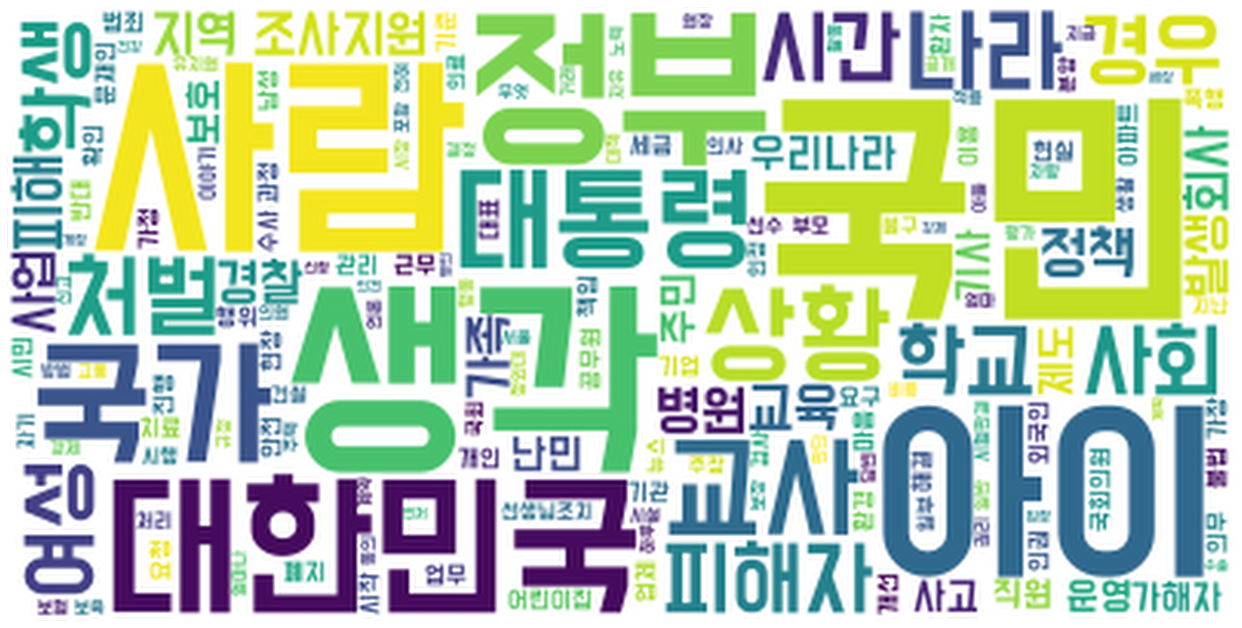

In [45]:
plt.figure(figsize=(22,22))
plt.imshow(cloud,interpolation='lanczos')
plt.axis('off')
plt.show()

In [550]:
#2017년도 TFIDF wordcloud

In [551]:
cloud = WordCloud(font_path='C:/Users/Gabriela Lee/Downloads/NanumFontSetup_TTF_GOTHIC/NanumGothic.ttf',background_color="white", max_words=50).generate_from_frequencies(df_tfidf_sum)

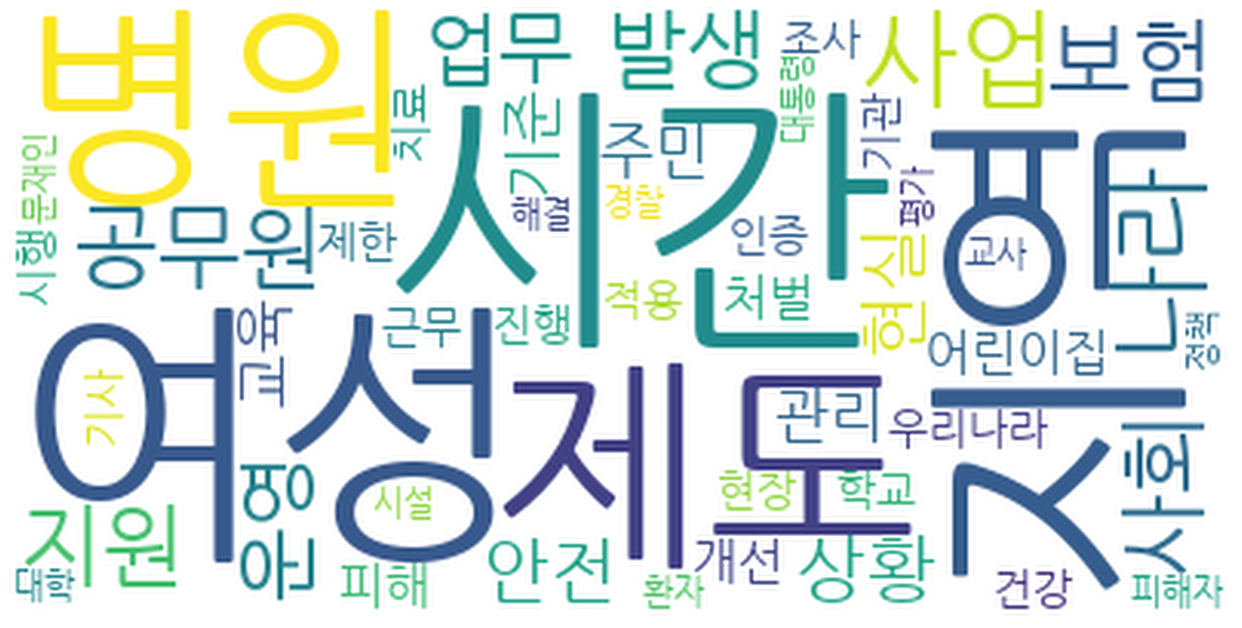

In [552]:
plt.figure(figsize=(22,22))
plt.imshow(cloud,interpolation='lanczos')
plt.axis('off')
plt.show()